In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kadapa']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
995,995,14.83,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,9.13,1.21,0.27,...,4.21,11.56,1.95,13.28,0.024045,0.019653,0.190103,0.071967,-0.034734,Cotton
996,996,14.82,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.86,0.38,0.46,...,2.57,11.58,1.49,13.40,0.023805,0.019665,0.187414,0.072196,-0.034840,Cotton
997,997,14.84,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.75,0.39,0.72,...,1.88,27.66,2.47,8.27,0.023919,0.019525,0.189729,0.074439,-0.035884,Cotton
998,998,14.84,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,9.18,1.08,0.25,...,4.56,10.54,1.75,12.32,0.023919,0.019525,0.189729,0.074439,-0.035884,Cotton
999,999,14.82,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.91,0.40,0.46,...,2.36,12.82,1.49,13.09,0.023805,0.019665,0.187414,0.072196,-0.034840,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'NDVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,7.976264,0.612711,0.424806,15.205171,150.066059,1755.362187,399.334852,28.152916,0.770205,1.361025,13.087995,1.412779,13.341868,0.040734
std,0.935555,1.841537,0.228146,12.461093,111.832730,943.677935,248.130562,54.203837,0.657903,1.055433,11.421245,0.768919,8.564551,0.041860
min,4.610000,0.020000,0.020000,0.670000,18.000000,149.000000,30.000000,0.730000,0.100000,0.030000,0.730000,0.310000,1.550000,0.015762
25%,7.800000,0.100000,0.250000,5.680000,87.500000,873.000000,198.000000,3.560000,0.400000,0.455000,4.730000,0.775000,7.260000,0.019665
50%,8.250000,0.280000,0.370000,12.170000,125.000000,1826.000000,351.000000,10.930000,0.580000,1.200000,9.280000,1.320000,11.930000,0.021517
75%,8.515000,0.685000,0.570000,20.770000,182.000000,2429.000000,556.000000,30.355000,0.945000,1.995000,17.515000,1.840000,17.325000,0.045539
max,9.890000,27.500000,1.500000,86.820000,1317.000000,4813.000000,1293.000000,664.030000,6.050000,7.890000,70.830000,4.520000,68.090000,0.296419


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Red', 'Red Sandy', 'Sandy', 'red'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['red', 'Red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy', 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 315, 'Black Soil': 117, 'Sandy Soil': 5, 'Red Sandy Soil': 2}

<BarContainer object of 4 artists>

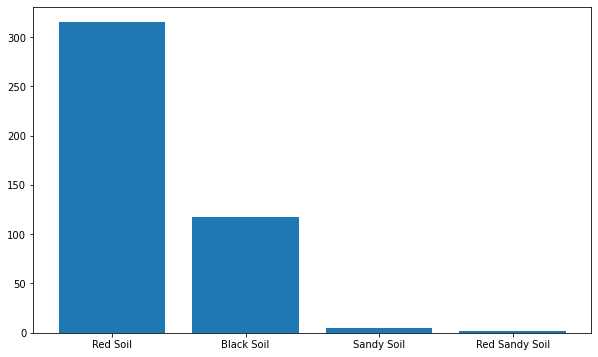

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Sunflower', 'Maize', 'Paddy', 'Chilly', 'Mirchi',
       'Bajra', 'Jowar', 'Turmaric', 'Groundnut', 'Redgram', 'Tomato',
       'Light Black', 'Mango', 'Cowpea', 'Horsegram'], dtype=object)

In [14]:
df['Crop'].value_counts()

Groundnut      109
Cotton         108
Paddy           91
Horsegram       30
Sunflower       21
Tomato          19
Mango           19
Bajra           10
Maize            9
Jowar            8
Cowpea           4
Redgram          4
Chilly           3
Turmaric         2
Mirchi           1
Light Black      1
Name: Crop, dtype: int64

GroundNut         109
Cotton            108
Paddy              91
HorseGram          30
Maize + Millet     27
Tomato             19
Mango              19
Name: Crop, dtype: int64


<BarContainer object of 7 artists>

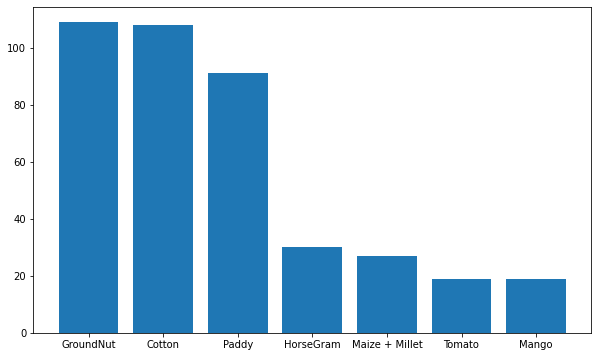

In [15]:
df['Crop'] = df['Crop'].replace('Groundnut', 'GroundNut')
df['Crop'] = df['Crop'].replace('Horsegram', 'HorseGram')
df['Crop'] = df['Crop'].replace(['Jowar', 'Bajra'], 'Millet')
df['Crop'] = df['Crop'].replace(['Maize', 'Millet'], 'Maize + Millet')
df = df[(df['Crop'] != 'Mirchi') & (df['Crop'] != 'Light Black') & (df['Crop'] != 'Turmaric') & (df['Crop'] != 'Chilly') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Cowpea') & (df['Crop'] != 'Sunflower')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
pH,1.000000,0.126279,0.311989,0.056340,0.318405,0.651854,0.492305,0.220955,0.036212,0.562369,0.106465,0.318358,-0.023696,-0.125465
EC,0.126279,1.000000,0.112204,0.049513,0.086802,0.271572,0.171602,0.821256,0.047020,0.321125,0.123224,0.148860,0.060861,-0.107087
OC,0.311989,0.112204,1.000000,0.488118,0.488085,0.506912,0.546237,0.267420,0.515331,0.555556,0.393396,0.578693,0.301026,-0.074059
P,0.056340,0.049513,0.488118,1.000000,0.282950,0.085531,0.201496,0.201763,0.468385,0.300051,0.411893,0.400969,0.087932,0.008065
K,0.318405,0.086802,0.488085,0.282950,1.000000,0.481794,0.489825,0.214062,0.193968,0.496315,0.147972,0.388344,0.382022,-0.155350
Ca,0.651854,0.271572,0.506912,0.085531,0.481794,1.000000,0.750767,0.377576,0.070252,0.602687,0.278682,0.539240,0.185591,-0.261833
Mg,0.492305,0.171602,0.546237,0.201496,0.489825,0.750767,1.000000,0.341885,0.132505,0.660918,0.353506,0.583810,0.202003,-0.179675
S,0.220955,0.821256,0.267420,0.201763,0.214062,0.377576,0.341885,1.000000,0.109219,0.535062,0.351740,0.391443,0.165540,-0.126016
Zn,0.036212,0.047020,0.515331,0.468385,0.193968,0.070252,0.132505,0.109219,1.000000,0.221510,0.262206,0.348889,0.166497,0.083859
B,0.562369,0.321125,0.555556,0.300051,0.496315,0.602687,0.660918,0.535062,0.221510,1.000000,0.536677,0.672579,0.340630,-0.262652


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Mn', 'ARVI', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC    OC     P      K     Mn      ARVI  Black Soil  \
995  9.13  1.21  0.27  5.47  242.0  13.28  0.019653           1   

     Red Sandy Soil  Red Soil  Sandy Soil  
995               0         0           0  
995    Cotton
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:7] = sc.fit_transform(X[:, 0:7])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6858638743455497


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.69 %
Standard Deviation: 4.24 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6387434554973822


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.98 %
Standard Deviation: 7.68 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7382198952879581


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.83 %
Standard Deviation: 3.73 %


In [38]:
# pickle.dump(clf3_3, open('Kadapa_model.pkl', 'wb'))
# pickle.dump(sc2, open('Kadapa_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7225130890052356


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.49 %
Standard Deviation: 6.30 %


# Multi-layer Perceptron Classifier

In [44]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [45]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [46]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7517482517482518
Testing Accuracy:  0.6387434554973822


In [47]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.18 %
Standard Deviation: 6.10 %


# Catboost

In [48]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.6346545	total: 148ms	remaining: 14.6s
1:	learn: 1.3670314	total: 152ms	remaining: 7.43s
2:	learn: 1.2666919	total: 155ms	remaining: 5.01s
3:	learn: 1.1710899	total: 158ms	remaining: 3.8s
4:	learn: 1.1016261	total: 162ms	remaining: 3.07s
5:	learn: 0.9940398	total: 165ms	remaining: 2.58s
6:	learn: 0.9504494	total: 168ms	remaining: 2.23s
7:	learn: 0.8958622	total: 172ms	remaining: 1.98s
8:	learn: 0.8861831	total: 175ms	remaining: 1.77s
9:	learn: 0.8801686	total: 178ms	remaining: 1.6s
10:	learn: 0.8675317	total: 181ms	remaining: 1.46s
11:	learn: 0.8520057	total: 184ms	remaining: 1.35s
12:	learn: 0.8316765	total: 187ms	remaining: 1.25s
13:	learn: 0.8270066	total: 191ms	remaining: 1.17s
14:	learn: 0.8140933	total: 194ms	remaining: 1.1s
15:	learn: 0.8018287	total: 197ms	remaining: 1.03s
16:	learn: 0.7725817	total: 200ms	remaining: 977ms
17:	learn: 0.7619958	total: 203ms	remaining: 925ms
18:	learn: 0.7408183	total: 206ms	remaining: 879ms
19:	learn: 0.7271261	total: 209ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.163475586
bestIteration = 99

Training on fold [1/5]

bestTest = 1.208792089
bestIteration = 99

Training on fold [2/5]

bestTest = 1.215482086
bestIteration = 99

Training on fold [3/5]

bestTest = 1.151596356
bestIteration = 99

Training on fold [4/5]

bestTest = 1.174800809
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9045421	test: 1.9092058	best: 1.9092058 (0)	total: 2.97ms	remaining: 2.96s
1:	learn: 1.8651172	test: 1.8735708	best: 1.8735708 (1)	total: 5.36ms	remaining: 2.68s
2:	learn: 1.8374911	test: 1.8501029	best: 1.8501029 (2)	total: 8.15ms	remaining: 2.71s
3:	learn: 1.8130093	test: 1.8306070	best: 1.8306070 (3)	total: 10.7ms	remaining: 2.65s
4:	learn: 1.7835113	test: 1.8029746	best: 1.8029746 (4)	total: 13.2ms	remaining: 2.63s
5:	learn: 1.7584980	test: 1.7796553	best: 1.7796553 (5)	total: 15.6ms	remaining: 2.59s
6:	learn: 1.7272403	test: 1.7549469	best: 1.7549469 (6)	total: 18.3ms	remaining: 2.59s
7:	learn: 1.7030871	test: 1.7331835	best: 1.7331835 (7)	total: 20.8ms	remaining: 2.58s
8:	learn: 1.6814626	test: 1.7137993	best: 1.7137993 (8)	total: 23.6ms	remaining: 2.6s
9:	learn: 1.6584146	test: 1.6906312	best: 1.6906312 (9)	total: 26.1ms	remaining: 2.59s
10:	learn: 1.6350710	test: 1.6702393	best: 1.6702393 (10)	total: 28.6ms	remaining: 2.57s
11:	learn: 1.6157984	test: 1.6525623	best:

134:	learn: 0.8629238	test: 0.9953406	best: 0.9953406 (134)	total: 356ms	remaining: 2.28s
135:	learn: 0.8610711	test: 0.9939141	best: 0.9939141 (135)	total: 359ms	remaining: 2.28s
136:	learn: 0.8593644	test: 0.9924219	best: 0.9924219 (136)	total: 361ms	remaining: 2.28s
137:	learn: 0.8566140	test: 0.9898854	best: 0.9898854 (137)	total: 364ms	remaining: 2.27s
138:	learn: 0.8542274	test: 0.9880648	best: 0.9880648 (138)	total: 367ms	remaining: 2.27s
139:	learn: 0.8521453	test: 0.9852227	best: 0.9852227 (139)	total: 369ms	remaining: 2.27s
140:	learn: 0.8508937	test: 0.9839943	best: 0.9839943 (140)	total: 371ms	remaining: 2.26s
141:	learn: 0.8477253	test: 0.9816904	best: 0.9816904 (141)	total: 374ms	remaining: 2.26s
142:	learn: 0.8450251	test: 0.9798226	best: 0.9798226 (142)	total: 376ms	remaining: 2.25s
143:	learn: 0.8422473	test: 0.9775051	best: 0.9775051 (143)	total: 379ms	remaining: 2.25s
144:	learn: 0.8407169	test: 0.9756649	best: 0.9756649 (144)	total: 381ms	remaining: 2.25s
145:	learn

266:	learn: 0.6651402	test: 0.8517866	best: 0.8517866 (266)	total: 709ms	remaining: 1.95s
267:	learn: 0.6637871	test: 0.8519152	best: 0.8517866 (266)	total: 712ms	remaining: 1.94s
268:	learn: 0.6630032	test: 0.8518635	best: 0.8517866 (266)	total: 714ms	remaining: 1.94s
269:	learn: 0.6617749	test: 0.8510805	best: 0.8510805 (269)	total: 717ms	remaining: 1.94s
270:	learn: 0.6605066	test: 0.8503934	best: 0.8503934 (270)	total: 719ms	remaining: 1.94s
271:	learn: 0.6599353	test: 0.8506783	best: 0.8503934 (270)	total: 722ms	remaining: 1.93s
272:	learn: 0.6586865	test: 0.8494766	best: 0.8494766 (272)	total: 725ms	remaining: 1.93s
273:	learn: 0.6572196	test: 0.8480622	best: 0.8480622 (273)	total: 727ms	remaining: 1.93s
274:	learn: 0.6556490	test: 0.8463291	best: 0.8463291 (274)	total: 730ms	remaining: 1.92s
275:	learn: 0.6544302	test: 0.8451779	best: 0.8451779 (275)	total: 732ms	remaining: 1.92s
276:	learn: 0.6535348	test: 0.8447988	best: 0.8447988 (276)	total: 734ms	remaining: 1.92s
277:	learn

407:	learn: 0.5440863	test: 0.7814877	best: 0.7814877 (407)	total: 1.06s	remaining: 1.54s
408:	learn: 0.5431232	test: 0.7813170	best: 0.7813170 (408)	total: 1.06s	remaining: 1.54s
409:	learn: 0.5423164	test: 0.7814658	best: 0.7813170 (408)	total: 1.07s	remaining: 1.54s
410:	learn: 0.5417412	test: 0.7813109	best: 0.7813109 (410)	total: 1.07s	remaining: 1.53s
411:	learn: 0.5412888	test: 0.7811486	best: 0.7811486 (411)	total: 1.07s	remaining: 1.53s
412:	learn: 0.5395464	test: 0.7794552	best: 0.7794552 (412)	total: 1.07s	remaining: 1.53s
413:	learn: 0.5386428	test: 0.7790698	best: 0.7790698 (413)	total: 1.08s	remaining: 1.52s
414:	learn: 0.5378940	test: 0.7783961	best: 0.7783961 (414)	total: 1.08s	remaining: 1.52s
415:	learn: 0.5374049	test: 0.7780760	best: 0.7780760 (415)	total: 1.08s	remaining: 1.52s
416:	learn: 0.5363945	test: 0.7775289	best: 0.7775289 (416)	total: 1.08s	remaining: 1.52s
417:	learn: 0.5359195	test: 0.7771896	best: 0.7771896 (417)	total: 1.09s	remaining: 1.51s
418:	learn

543:	learn: 0.4643758	test: 0.7414874	best: 0.7414524 (542)	total: 1.42s	remaining: 1.19s
544:	learn: 0.4636636	test: 0.7408383	best: 0.7408383 (544)	total: 1.42s	remaining: 1.18s
545:	learn: 0.4632495	test: 0.7408819	best: 0.7408383 (544)	total: 1.42s	remaining: 1.18s
546:	learn: 0.4625842	test: 0.7408410	best: 0.7408383 (544)	total: 1.42s	remaining: 1.18s
547:	learn: 0.4620676	test: 0.7401489	best: 0.7401489 (547)	total: 1.43s	remaining: 1.18s
548:	learn: 0.4610322	test: 0.7392217	best: 0.7392217 (548)	total: 1.43s	remaining: 1.17s
549:	learn: 0.4598841	test: 0.7384960	best: 0.7384960 (549)	total: 1.43s	remaining: 1.17s
550:	learn: 0.4589574	test: 0.7375746	best: 0.7375746 (550)	total: 1.43s	remaining: 1.17s
551:	learn: 0.4581238	test: 0.7374362	best: 0.7374362 (551)	total: 1.44s	remaining: 1.16s
552:	learn: 0.4575934	test: 0.7369257	best: 0.7369257 (552)	total: 1.44s	remaining: 1.16s
553:	learn: 0.4571971	test: 0.7368646	best: 0.7368646 (553)	total: 1.44s	remaining: 1.16s
554:	learn

690:	learn: 0.3958550	test: 0.7112155	best: 0.7112155 (690)	total: 1.77s	remaining: 791ms
691:	learn: 0.3956306	test: 0.7110142	best: 0.7110142 (691)	total: 1.77s	remaining: 789ms
692:	learn: 0.3951287	test: 0.7105392	best: 0.7105392 (692)	total: 1.77s	remaining: 786ms
693:	learn: 0.3946787	test: 0.7104965	best: 0.7104965 (693)	total: 1.78s	remaining: 784ms
694:	learn: 0.3942761	test: 0.7103947	best: 0.7103947 (694)	total: 1.78s	remaining: 781ms
695:	learn: 0.3939856	test: 0.7105062	best: 0.7103947 (694)	total: 1.78s	remaining: 779ms
696:	learn: 0.3936039	test: 0.7101518	best: 0.7101518 (696)	total: 1.78s	remaining: 776ms
697:	learn: 0.3930835	test: 0.7101570	best: 0.7101518 (696)	total: 1.79s	remaining: 774ms
698:	learn: 0.3927409	test: 0.7100315	best: 0.7100315 (698)	total: 1.79s	remaining: 771ms
699:	learn: 0.3921358	test: 0.7100977	best: 0.7100315 (698)	total: 1.79s	remaining: 768ms
700:	learn: 0.3918235	test: 0.7099135	best: 0.7099135 (700)	total: 1.8s	remaining: 766ms
701:	learn:

839:	learn: 0.3447235	test: 0.6867402	best: 0.6867402 (839)	total: 2.12s	remaining: 404ms
840:	learn: 0.3443457	test: 0.6867278	best: 0.6867278 (840)	total: 2.13s	remaining: 402ms
841:	learn: 0.3442585	test: 0.6866044	best: 0.6866044 (841)	total: 2.13s	remaining: 400ms
842:	learn: 0.3439814	test: 0.6866138	best: 0.6866044 (841)	total: 2.13s	remaining: 397ms
843:	learn: 0.3435706	test: 0.6862475	best: 0.6862475 (843)	total: 2.13s	remaining: 394ms
844:	learn: 0.3432847	test: 0.6866537	best: 0.6862475 (843)	total: 2.14s	remaining: 392ms
845:	learn: 0.3429842	test: 0.6863522	best: 0.6862475 (843)	total: 2.14s	remaining: 389ms
846:	learn: 0.3426439	test: 0.6861417	best: 0.6861417 (846)	total: 2.14s	remaining: 387ms
847:	learn: 0.3424522	test: 0.6860037	best: 0.6860037 (847)	total: 2.14s	remaining: 384ms
848:	learn: 0.3420711	test: 0.6858854	best: 0.6858854 (848)	total: 2.15s	remaining: 382ms
849:	learn: 0.3418573	test: 0.6860701	best: 0.6858854 (848)	total: 2.15s	remaining: 379ms
850:	learn

986:	learn: 0.3042592	test: 0.6721117	best: 0.6720105 (985)	total: 2.48s	remaining: 32.6ms
987:	learn: 0.3040557	test: 0.6720838	best: 0.6720105 (985)	total: 2.48s	remaining: 30.1ms
988:	learn: 0.3037958	test: 0.6719084	best: 0.6719084 (988)	total: 2.48s	remaining: 27.6ms
989:	learn: 0.3036909	test: 0.6720087	best: 0.6719084 (988)	total: 2.48s	remaining: 25.1ms
990:	learn: 0.3035321	test: 0.6720037	best: 0.6719084 (988)	total: 2.49s	remaining: 22.6ms
991:	learn: 0.3033437	test: 0.6717625	best: 0.6717625 (991)	total: 2.49s	remaining: 20.1ms
992:	learn: 0.3031153	test: 0.6718485	best: 0.6717625 (991)	total: 2.49s	remaining: 17.6ms
993:	learn: 0.3029372	test: 0.6718981	best: 0.6717625 (991)	total: 2.49s	remaining: 15.1ms
994:	learn: 0.3028620	test: 0.6718212	best: 0.6717625 (991)	total: 2.5s	remaining: 12.5ms
995:	learn: 0.3026926	test: 0.6717156	best: 0.6717156 (995)	total: 2.5s	remaining: 10ms
996:	learn: 0.3024155	test: 0.6714682	best: 0.6714682 (996)	total: 2.5s	remaining: 7.53ms
997:

126:	learn: 0.5291195	test: 0.7963724	best: 0.7963724 (126)	total: 314ms	remaining: 2.15s
127:	learn: 0.5285864	test: 0.7964071	best: 0.7963724 (126)	total: 319ms	remaining: 2.17s
128:	learn: 0.5259176	test: 0.7936027	best: 0.7936027 (128)	total: 322ms	remaining: 2.17s
129:	learn: 0.5246681	test: 0.7942498	best: 0.7936027 (128)	total: 324ms	remaining: 2.17s
130:	learn: 0.5230221	test: 0.7935797	best: 0.7935797 (130)	total: 326ms	remaining: 2.16s
131:	learn: 0.5219396	test: 0.7929150	best: 0.7929150 (131)	total: 329ms	remaining: 2.16s
132:	learn: 0.5194491	test: 0.7920248	best: 0.7920248 (132)	total: 331ms	remaining: 2.16s
133:	learn: 0.5179841	test: 0.7907711	best: 0.7907711 (133)	total: 334ms	remaining: 2.16s
134:	learn: 0.5156389	test: 0.7910975	best: 0.7907711 (133)	total: 336ms	remaining: 2.15s
135:	learn: 0.5140344	test: 0.7901875	best: 0.7901875 (135)	total: 340ms	remaining: 2.16s
136:	learn: 0.5101357	test: 0.7896493	best: 0.7896493 (136)	total: 342ms	remaining: 2.16s
137:	learn

261:	learn: 0.3299092	test: 0.7192685	best: 0.7182481 (253)	total: 670ms	remaining: 1.89s
262:	learn: 0.3290573	test: 0.7201089	best: 0.7182481 (253)	total: 674ms	remaining: 1.89s
263:	learn: 0.3275990	test: 0.7183254	best: 0.7182481 (253)	total: 677ms	remaining: 1.89s
264:	learn: 0.3262781	test: 0.7183975	best: 0.7182481 (253)	total: 680ms	remaining: 1.89s
265:	learn: 0.3251737	test: 0.7174712	best: 0.7174712 (265)	total: 683ms	remaining: 1.88s
266:	learn: 0.3243798	test: 0.7177068	best: 0.7174712 (265)	total: 686ms	remaining: 1.88s
267:	learn: 0.3238661	test: 0.7167666	best: 0.7167666 (267)	total: 689ms	remaining: 1.88s
268:	learn: 0.3225548	test: 0.7161246	best: 0.7161246 (268)	total: 692ms	remaining: 1.88s
269:	learn: 0.3220074	test: 0.7152080	best: 0.7152080 (269)	total: 697ms	remaining: 1.88s
270:	learn: 0.3211945	test: 0.7150855	best: 0.7150855 (270)	total: 699ms	remaining: 1.88s
271:	learn: 0.3200835	test: 0.7166206	best: 0.7150855 (270)	total: 702ms	remaining: 1.88s
272:	learn

394:	learn: 0.2317860	test: 0.6944563	best: 0.6930532 (357)	total: 1.02s	remaining: 1.57s
395:	learn: 0.2313652	test: 0.6946685	best: 0.6930532 (357)	total: 1.03s	remaining: 1.56s
396:	learn: 0.2309782	test: 0.6950405	best: 0.6930532 (357)	total: 1.03s	remaining: 1.56s
397:	learn: 0.2304696	test: 0.6948599	best: 0.6930532 (357)	total: 1.03s	remaining: 1.56s
398:	learn: 0.2298946	test: 0.6937028	best: 0.6930532 (357)	total: 1.03s	remaining: 1.55s
399:	learn: 0.2297155	test: 0.6933525	best: 0.6930532 (357)	total: 1.03s	remaining: 1.55s
400:	learn: 0.2292037	test: 0.6933611	best: 0.6930532 (357)	total: 1.04s	remaining: 1.55s
401:	learn: 0.2284245	test: 0.6936675	best: 0.6930532 (357)	total: 1.04s	remaining: 1.55s
402:	learn: 0.2282340	test: 0.6936409	best: 0.6930532 (357)	total: 1.04s	remaining: 1.54s
403:	learn: 0.2278781	test: 0.6937405	best: 0.6930532 (357)	total: 1.04s	remaining: 1.54s
404:	learn: 0.2270984	test: 0.6940566	best: 0.6930532 (357)	total: 1.05s	remaining: 1.54s
405:	learn

518:	learn: 0.1785983	test: 0.6687550	best: 0.6687550 (518)	total: 1.38s	remaining: 1.27s
519:	learn: 0.1782480	test: 0.6692947	best: 0.6687550 (518)	total: 1.38s	remaining: 1.27s
520:	learn: 0.1780626	test: 0.6692421	best: 0.6687550 (518)	total: 1.38s	remaining: 1.27s
521:	learn: 0.1777938	test: 0.6691519	best: 0.6687550 (518)	total: 1.38s	remaining: 1.27s
522:	learn: 0.1775032	test: 0.6695173	best: 0.6687550 (518)	total: 1.39s	remaining: 1.26s
523:	learn: 0.1766983	test: 0.6684506	best: 0.6684506 (523)	total: 1.39s	remaining: 1.26s
524:	learn: 0.1762153	test: 0.6681202	best: 0.6681202 (524)	total: 1.39s	remaining: 1.26s
525:	learn: 0.1759154	test: 0.6684264	best: 0.6681202 (524)	total: 1.39s	remaining: 1.25s
526:	learn: 0.1753958	test: 0.6679087	best: 0.6679087 (526)	total: 1.4s	remaining: 1.25s
527:	learn: 0.1751020	test: 0.6690260	best: 0.6679087 (526)	total: 1.4s	remaining: 1.25s
528:	learn: 0.1750111	test: 0.6692378	best: 0.6679087 (526)	total: 1.4s	remaining: 1.25s
529:	learn: 0

657:	learn: 0.1384100	test: 0.6604652	best: 0.6604652 (657)	total: 1.73s	remaining: 898ms
658:	learn: 0.1381744	test: 0.6608620	best: 0.6604652 (657)	total: 1.73s	remaining: 895ms
659:	learn: 0.1380272	test: 0.6605702	best: 0.6604652 (657)	total: 1.73s	remaining: 893ms
660:	learn: 0.1378801	test: 0.6601929	best: 0.6601929 (660)	total: 1.74s	remaining: 890ms
661:	learn: 0.1374339	test: 0.6600715	best: 0.6600715 (661)	total: 1.74s	remaining: 887ms
662:	learn: 0.1371959	test: 0.6600183	best: 0.6600183 (662)	total: 1.74s	remaining: 884ms
663:	learn: 0.1370415	test: 0.6599931	best: 0.6599931 (663)	total: 1.74s	remaining: 882ms
664:	learn: 0.1367810	test: 0.6605249	best: 0.6599931 (663)	total: 1.75s	remaining: 879ms
665:	learn: 0.1366565	test: 0.6602643	best: 0.6599931 (663)	total: 1.75s	remaining: 876ms
666:	learn: 0.1363497	test: 0.6600657	best: 0.6599931 (663)	total: 1.75s	remaining: 874ms
667:	learn: 0.1362484	test: 0.6603372	best: 0.6599931 (663)	total: 1.75s	remaining: 871ms
668:	learn

789:	learn: 0.1118789	test: 0.6552238	best: 0.6544455 (785)	total: 2.08s	remaining: 552ms
790:	learn: 0.1118356	test: 0.6550656	best: 0.6544455 (785)	total: 2.08s	remaining: 550ms
791:	learn: 0.1115913	test: 0.6555710	best: 0.6544455 (785)	total: 2.08s	remaining: 547ms
792:	learn: 0.1113700	test: 0.6552847	best: 0.6544455 (785)	total: 2.09s	remaining: 545ms
793:	learn: 0.1112878	test: 0.6545439	best: 0.6544455 (785)	total: 2.09s	remaining: 542ms
794:	learn: 0.1111795	test: 0.6546566	best: 0.6544455 (785)	total: 2.09s	remaining: 539ms
795:	learn: 0.1109220	test: 0.6544033	best: 0.6544033 (795)	total: 2.09s	remaining: 537ms
796:	learn: 0.1107118	test: 0.6549282	best: 0.6544033 (795)	total: 2.1s	remaining: 534ms
797:	learn: 0.1105477	test: 0.6552960	best: 0.6544033 (795)	total: 2.1s	remaining: 531ms
798:	learn: 0.1103999	test: 0.6550529	best: 0.6544033 (795)	total: 2.1s	remaining: 529ms
799:	learn: 0.1102476	test: 0.6549673	best: 0.6544033 (795)	total: 2.1s	remaining: 526ms
800:	learn: 0.

939:	learn: 0.0897672	test: 0.6568620	best: 0.6538614 (820)	total: 2.43s	remaining: 155ms
940:	learn: 0.0895914	test: 0.6575803	best: 0.6538614 (820)	total: 2.44s	remaining: 153ms
941:	learn: 0.0895452	test: 0.6575114	best: 0.6538614 (820)	total: 2.44s	remaining: 150ms
942:	learn: 0.0894825	test: 0.6576597	best: 0.6538614 (820)	total: 2.44s	remaining: 148ms
943:	learn: 0.0894012	test: 0.6578740	best: 0.6538614 (820)	total: 2.44s	remaining: 145ms
944:	learn: 0.0893707	test: 0.6579238	best: 0.6538614 (820)	total: 2.45s	remaining: 142ms
945:	learn: 0.0893451	test: 0.6579828	best: 0.6538614 (820)	total: 2.45s	remaining: 140ms
946:	learn: 0.0891447	test: 0.6576257	best: 0.6538614 (820)	total: 2.45s	remaining: 137ms
947:	learn: 0.0890925	test: 0.6572035	best: 0.6538614 (820)	total: 2.46s	remaining: 135ms
948:	learn: 0.0890140	test: 0.6569736	best: 0.6538614 (820)	total: 2.46s	remaining: 132ms
949:	learn: 0.0889224	test: 0.6570596	best: 0.6538614 (820)	total: 2.46s	remaining: 129ms
950:	learn

47:	learn: 1.1397123	test: 1.2482931	best: 1.2482931 (47)	total: 407ms	remaining: 8.07s
48:	learn: 1.1337037	test: 1.2445352	best: 1.2445352 (48)	total: 418ms	remaining: 8.12s
49:	learn: 1.1243702	test: 1.2375825	best: 1.2375825 (49)	total: 426ms	remaining: 8.1s
50:	learn: 1.1145167	test: 1.2272046	best: 1.2272046 (50)	total: 436ms	remaining: 8.12s
51:	learn: 1.1059002	test: 1.2193959	best: 1.2193959 (51)	total: 445ms	remaining: 8.11s
52:	learn: 1.0973891	test: 1.2120354	best: 1.2120354 (52)	total: 453ms	remaining: 8.1s
53:	learn: 1.0896561	test: 1.2041747	best: 1.2041747 (53)	total: 462ms	remaining: 8.09s
54:	learn: 1.0828459	test: 1.1988843	best: 1.1988843 (54)	total: 470ms	remaining: 8.07s
55:	learn: 1.0756543	test: 1.1930880	best: 1.1930880 (55)	total: 478ms	remaining: 8.06s
56:	learn: 1.0684181	test: 1.1873902	best: 1.1873902 (56)	total: 486ms	remaining: 8.04s
57:	learn: 1.0625800	test: 1.1830465	best: 1.1830465 (57)	total: 494ms	remaining: 8.03s
58:	learn: 1.0555339	test: 1.17638

160:	learn: 0.6912259	test: 0.8927484	best: 0.8927484 (160)	total: 1.39s	remaining: 7.22s
161:	learn: 0.6886054	test: 0.8906674	best: 0.8906674 (161)	total: 1.39s	remaining: 7.21s
162:	learn: 0.6861496	test: 0.8897239	best: 0.8897239 (162)	total: 1.4s	remaining: 7.2s
163:	learn: 0.6842897	test: 0.8886757	best: 0.8886757 (163)	total: 1.41s	remaining: 7.2s
164:	learn: 0.6825413	test: 0.8874722	best: 0.8874722 (164)	total: 1.42s	remaining: 7.19s
165:	learn: 0.6802246	test: 0.8859619	best: 0.8859619 (165)	total: 1.43s	remaining: 7.18s
166:	learn: 0.6785545	test: 0.8850661	best: 0.8850661 (166)	total: 1.44s	remaining: 7.17s
167:	learn: 0.6764928	test: 0.8828328	best: 0.8828328 (167)	total: 1.45s	remaining: 7.16s
168:	learn: 0.6748839	test: 0.8818968	best: 0.8818968 (168)	total: 1.45s	remaining: 7.15s
169:	learn: 0.6732170	test: 0.8804121	best: 0.8804121 (169)	total: 1.46s	remaining: 7.14s
170:	learn: 0.6712079	test: 0.8788200	best: 0.8788200 (170)	total: 1.47s	remaining: 7.13s
171:	learn: 0

272:	learn: 0.5049245	test: 0.7841461	best: 0.7841461 (272)	total: 2.33s	remaining: 6.2s
273:	learn: 0.5035400	test: 0.7833092	best: 0.7833092 (273)	total: 2.34s	remaining: 6.2s
274:	learn: 0.5022855	test: 0.7825590	best: 0.7825590 (274)	total: 2.35s	remaining: 6.19s
275:	learn: 0.5016694	test: 0.7818289	best: 0.7818289 (275)	total: 2.36s	remaining: 6.18s
276:	learn: 0.5005292	test: 0.7810631	best: 0.7810631 (276)	total: 2.37s	remaining: 6.17s
277:	learn: 0.4992109	test: 0.7808233	best: 0.7808233 (277)	total: 2.37s	remaining: 6.17s
278:	learn: 0.4982357	test: 0.7800902	best: 0.7800902 (278)	total: 2.38s	remaining: 6.16s
279:	learn: 0.4973212	test: 0.7797346	best: 0.7797346 (279)	total: 2.39s	remaining: 6.15s
280:	learn: 0.4959285	test: 0.7794179	best: 0.7794179 (280)	total: 2.4s	remaining: 6.14s
281:	learn: 0.4947635	test: 0.7789278	best: 0.7789278 (281)	total: 2.41s	remaining: 6.14s
282:	learn: 0.4937204	test: 0.7784604	best: 0.7784604 (282)	total: 2.42s	remaining: 6.13s
283:	learn: 0

384:	learn: 0.3975096	test: 0.7260470	best: 0.7258716 (383)	total: 3.27s	remaining: 5.22s
385:	learn: 0.3966253	test: 0.7256710	best: 0.7256710 (385)	total: 3.28s	remaining: 5.21s
386:	learn: 0.3955647	test: 0.7245515	best: 0.7245515 (386)	total: 3.28s	remaining: 5.2s
387:	learn: 0.3950883	test: 0.7240563	best: 0.7240563 (387)	total: 3.29s	remaining: 5.2s
388:	learn: 0.3940670	test: 0.7239001	best: 0.7239001 (388)	total: 3.3s	remaining: 5.19s
389:	learn: 0.3931806	test: 0.7235577	best: 0.7235577 (389)	total: 3.31s	remaining: 5.18s
390:	learn: 0.3923647	test: 0.7231333	best: 0.7231333 (390)	total: 3.32s	remaining: 5.17s
391:	learn: 0.3916904	test: 0.7231492	best: 0.7231333 (390)	total: 3.33s	remaining: 5.16s
392:	learn: 0.3906847	test: 0.7231682	best: 0.7231333 (390)	total: 3.34s	remaining: 5.15s
393:	learn: 0.3899748	test: 0.7227617	best: 0.7227617 (393)	total: 3.35s	remaining: 5.15s
394:	learn: 0.3893435	test: 0.7222818	best: 0.7222818 (394)	total: 3.35s	remaining: 5.14s
395:	learn: 0

494:	learn: 0.3261233	test: 0.6920648	best: 0.6920648 (494)	total: 4.2s	remaining: 4.29s
495:	learn: 0.3256725	test: 0.6918555	best: 0.6918555 (495)	total: 4.21s	remaining: 4.28s
496:	learn: 0.3250782	test: 0.6917978	best: 0.6917978 (496)	total: 4.22s	remaining: 4.27s
497:	learn: 0.3243721	test: 0.6918362	best: 0.6917978 (496)	total: 4.23s	remaining: 4.26s
498:	learn: 0.3239735	test: 0.6916939	best: 0.6916939 (498)	total: 4.24s	remaining: 4.25s
499:	learn: 0.3235552	test: 0.6918138	best: 0.6916939 (498)	total: 4.24s	remaining: 4.24s
500:	learn: 0.3228165	test: 0.6911921	best: 0.6911921 (500)	total: 4.25s	remaining: 4.24s
501:	learn: 0.3226323	test: 0.6912127	best: 0.6911921 (500)	total: 4.26s	remaining: 4.23s
502:	learn: 0.3221923	test: 0.6908786	best: 0.6908786 (502)	total: 4.27s	remaining: 4.22s
503:	learn: 0.3215889	test: 0.6912080	best: 0.6908786 (502)	total: 4.28s	remaining: 4.21s
504:	learn: 0.3208852	test: 0.6904530	best: 0.6904530 (504)	total: 4.29s	remaining: 4.2s
505:	learn: 

607:	learn: 0.2758613	test: 0.6685003	best: 0.6681756 (604)	total: 5.15s	remaining: 3.32s
608:	learn: 0.2753563	test: 0.6683549	best: 0.6681756 (604)	total: 5.16s	remaining: 3.31s
609:	learn: 0.2749005	test: 0.6680484	best: 0.6680484 (609)	total: 5.17s	remaining: 3.3s
610:	learn: 0.2745710	test: 0.6676995	best: 0.6676995 (610)	total: 5.18s	remaining: 3.3s
611:	learn: 0.2740342	test: 0.6675279	best: 0.6675279 (611)	total: 5.19s	remaining: 3.29s
612:	learn: 0.2736036	test: 0.6677766	best: 0.6675279 (611)	total: 5.2s	remaining: 3.28s
613:	learn: 0.2733853	test: 0.6676889	best: 0.6675279 (611)	total: 5.21s	remaining: 3.27s
614:	learn: 0.2729372	test: 0.6675322	best: 0.6675279 (611)	total: 5.21s	remaining: 3.26s
615:	learn: 0.2725013	test: 0.6677516	best: 0.6675279 (611)	total: 5.22s	remaining: 3.25s
616:	learn: 0.2720797	test: 0.6672640	best: 0.6672640 (616)	total: 5.23s	remaining: 3.25s
617:	learn: 0.2717407	test: 0.6668193	best: 0.6668193 (617)	total: 5.24s	remaining: 3.24s
618:	learn: 0

719:	learn: 0.2361216	test: 0.6533512	best: 0.6533512 (719)	total: 6.1s	remaining: 2.37s
720:	learn: 0.2359205	test: 0.6531538	best: 0.6531538 (720)	total: 6.11s	remaining: 2.36s
721:	learn: 0.2356603	test: 0.6532438	best: 0.6531538 (720)	total: 6.12s	remaining: 2.35s
722:	learn: 0.2352617	test: 0.6531390	best: 0.6531390 (722)	total: 6.13s	remaining: 2.35s
723:	learn: 0.2348918	test: 0.6525644	best: 0.6525644 (723)	total: 6.13s	remaining: 2.34s
724:	learn: 0.2344473	test: 0.6522787	best: 0.6522787 (724)	total: 6.14s	remaining: 2.33s
725:	learn: 0.2341461	test: 0.6520551	best: 0.6520551 (725)	total: 6.15s	remaining: 2.32s
726:	learn: 0.2337510	test: 0.6517765	best: 0.6517765 (726)	total: 6.16s	remaining: 2.31s
727:	learn: 0.2334118	test: 0.6512198	best: 0.6512198 (727)	total: 6.17s	remaining: 2.3s
728:	learn: 0.2331359	test: 0.6509925	best: 0.6509925 (728)	total: 6.18s	remaining: 2.29s
729:	learn: 0.2329854	test: 0.6510353	best: 0.6509925 (728)	total: 6.18s	remaining: 2.29s
730:	learn: 

830:	learn: 0.2053376	test: 0.6410069	best: 0.6408948 (827)	total: 7.03s	remaining: 1.43s
831:	learn: 0.2050245	test: 0.6411547	best: 0.6408948 (827)	total: 7.04s	remaining: 1.42s
832:	learn: 0.2047486	test: 0.6412821	best: 0.6408948 (827)	total: 7.05s	remaining: 1.41s
833:	learn: 0.2045498	test: 0.6412955	best: 0.6408948 (827)	total: 7.06s	remaining: 1.41s
834:	learn: 0.2041511	test: 0.6415026	best: 0.6408948 (827)	total: 7.07s	remaining: 1.4s
835:	learn: 0.2039205	test: 0.6415092	best: 0.6408948 (827)	total: 7.08s	remaining: 1.39s
836:	learn: 0.2037135	test: 0.6413872	best: 0.6408948 (827)	total: 7.08s	remaining: 1.38s
837:	learn: 0.2035453	test: 0.6413518	best: 0.6408948 (827)	total: 7.09s	remaining: 1.37s
838:	learn: 0.2033621	test: 0.6412069	best: 0.6408948 (827)	total: 7.1s	remaining: 1.36s
839:	learn: 0.2031689	test: 0.6411472	best: 0.6408948 (827)	total: 7.11s	remaining: 1.35s
840:	learn: 0.2028750	test: 0.6411409	best: 0.6408948 (827)	total: 7.12s	remaining: 1.34s
841:	learn: 

940:	learn: 0.1807957	test: 0.6315501	best: 0.6315501 (940)	total: 7.96s	remaining: 499ms
941:	learn: 0.1805326	test: 0.6315014	best: 0.6315014 (941)	total: 7.96s	remaining: 490ms
942:	learn: 0.1804119	test: 0.6312492	best: 0.6312492 (942)	total: 7.97s	remaining: 482ms
943:	learn: 0.1801272	test: 0.6315006	best: 0.6312492 (942)	total: 7.98s	remaining: 474ms
944:	learn: 0.1799815	test: 0.6313999	best: 0.6312492 (942)	total: 7.99s	remaining: 465ms
945:	learn: 0.1797187	test: 0.6313648	best: 0.6312492 (942)	total: 8s	remaining: 457ms
946:	learn: 0.1794463	test: 0.6310933	best: 0.6310933 (946)	total: 8.01s	remaining: 448ms
947:	learn: 0.1792263	test: 0.6311056	best: 0.6310933 (946)	total: 8.02s	remaining: 440ms
948:	learn: 0.1790220	test: 0.6310711	best: 0.6310711 (948)	total: 8.03s	remaining: 431ms
949:	learn: 0.1788011	test: 0.6310052	best: 0.6310052 (949)	total: 8.03s	remaining: 423ms
950:	learn: 0.1785711	test: 0.6309702	best: 0.6309702 (950)	total: 8.04s	remaining: 414ms
951:	learn: 0

50:	learn: 0.6642987	test: 0.8705126	best: 0.8705126 (50)	total: 441ms	remaining: 8.2s
51:	learn: 0.6592109	test: 0.8669320	best: 0.8669320 (51)	total: 450ms	remaining: 8.2s
52:	learn: 0.6536548	test: 0.8621372	best: 0.8621372 (52)	total: 458ms	remaining: 8.19s
53:	learn: 0.6487245	test: 0.8583077	best: 0.8583077 (53)	total: 467ms	remaining: 8.19s
54:	learn: 0.6409983	test: 0.8555520	best: 0.8555520 (54)	total: 475ms	remaining: 8.17s
55:	learn: 0.6358462	test: 0.8516708	best: 0.8516708 (55)	total: 485ms	remaining: 8.17s
56:	learn: 0.6310005	test: 0.8493476	best: 0.8493476 (56)	total: 493ms	remaining: 8.15s
57:	learn: 0.6243724	test: 0.8437182	best: 0.8437182 (57)	total: 502ms	remaining: 8.15s
58:	learn: 0.6181856	test: 0.8402534	best: 0.8402534 (58)	total: 512ms	remaining: 8.16s
59:	learn: 0.6106313	test: 0.8338843	best: 0.8338843 (59)	total: 520ms	remaining: 8.15s
60:	learn: 0.6038244	test: 0.8291018	best: 0.8291018 (60)	total: 529ms	remaining: 8.14s
61:	learn: 0.5982054	test: 0.82528

162:	learn: 0.3044483	test: 0.6808091	best: 0.6808091 (162)	total: 1.41s	remaining: 7.23s
163:	learn: 0.3032783	test: 0.6804223	best: 0.6804223 (163)	total: 1.42s	remaining: 7.22s
164:	learn: 0.3025808	test: 0.6793066	best: 0.6793066 (164)	total: 1.43s	remaining: 7.21s
165:	learn: 0.3005567	test: 0.6788261	best: 0.6788261 (165)	total: 1.43s	remaining: 7.21s
166:	learn: 0.2993322	test: 0.6779309	best: 0.6779309 (166)	total: 1.44s	remaining: 7.2s
167:	learn: 0.2973834	test: 0.6764993	best: 0.6764993 (167)	total: 1.45s	remaining: 7.19s
168:	learn: 0.2961342	test: 0.6759649	best: 0.6759649 (168)	total: 1.46s	remaining: 7.18s
169:	learn: 0.2950034	test: 0.6756111	best: 0.6756111 (169)	total: 1.47s	remaining: 7.17s
170:	learn: 0.2931555	test: 0.6748849	best: 0.6748849 (170)	total: 1.48s	remaining: 7.16s
171:	learn: 0.2919902	test: 0.6736556	best: 0.6736556 (171)	total: 1.49s	remaining: 7.15s
172:	learn: 0.2907830	test: 0.6721734	best: 0.6721734 (172)	total: 1.49s	remaining: 7.14s
173:	learn:

275:	learn: 0.1858958	test: 0.6283176	best: 0.6278097 (274)	total: 2.36s	remaining: 6.18s
276:	learn: 0.1848820	test: 0.6274119	best: 0.6274119 (276)	total: 2.37s	remaining: 6.17s
277:	learn: 0.1839890	test: 0.6267753	best: 0.6267753 (277)	total: 2.37s	remaining: 6.16s
278:	learn: 0.1836757	test: 0.6263955	best: 0.6263955 (278)	total: 2.38s	remaining: 6.16s
279:	learn: 0.1833846	test: 0.6264905	best: 0.6263955 (278)	total: 2.39s	remaining: 6.15s
280:	learn: 0.1824148	test: 0.6271832	best: 0.6263955 (278)	total: 2.4s	remaining: 6.14s
281:	learn: 0.1817258	test: 0.6277892	best: 0.6263955 (278)	total: 2.41s	remaining: 6.13s
282:	learn: 0.1809689	test: 0.6270995	best: 0.6263955 (278)	total: 2.42s	remaining: 6.12s
283:	learn: 0.1798638	test: 0.6279812	best: 0.6263955 (278)	total: 2.42s	remaining: 6.12s
284:	learn: 0.1792619	test: 0.6275122	best: 0.6263955 (278)	total: 2.43s	remaining: 6.11s
285:	learn: 0.1786619	test: 0.6268498	best: 0.6263955 (278)	total: 2.44s	remaining: 6.1s
286:	learn: 

385:	learn: 0.1273188	test: 0.6058691	best: 0.6057382 (384)	total: 3.28s	remaining: 5.21s
386:	learn: 0.1269726	test: 0.6056688	best: 0.6056688 (386)	total: 3.29s	remaining: 5.2s
387:	learn: 0.1265596	test: 0.6053101	best: 0.6053101 (387)	total: 3.29s	remaining: 5.2s
388:	learn: 0.1263123	test: 0.6049717	best: 0.6049717 (388)	total: 3.3s	remaining: 5.19s
389:	learn: 0.1258552	test: 0.6047369	best: 0.6047369 (389)	total: 3.31s	remaining: 5.18s
390:	learn: 0.1252440	test: 0.6046970	best: 0.6046970 (390)	total: 3.32s	remaining: 5.17s
391:	learn: 0.1249801	test: 0.6048756	best: 0.6046970 (390)	total: 3.33s	remaining: 5.17s
392:	learn: 0.1244440	test: 0.6051012	best: 0.6046970 (390)	total: 3.34s	remaining: 5.16s
393:	learn: 0.1240906	test: 0.6050824	best: 0.6046970 (390)	total: 3.35s	remaining: 5.15s
394:	learn: 0.1237240	test: 0.6052569	best: 0.6046970 (390)	total: 3.36s	remaining: 5.14s
395:	learn: 0.1233653	test: 0.6054740	best: 0.6046970 (390)	total: 3.36s	remaining: 5.13s
396:	learn: 0

496:	learn: 0.0936773	test: 0.5989061	best: 0.5989061 (496)	total: 4.21s	remaining: 4.26s
497:	learn: 0.0935377	test: 0.5987842	best: 0.5987842 (497)	total: 4.22s	remaining: 4.25s
498:	learn: 0.0933286	test: 0.5988013	best: 0.5987842 (497)	total: 4.23s	remaining: 4.25s
499:	learn: 0.0929798	test: 0.5991846	best: 0.5987842 (497)	total: 4.24s	remaining: 4.24s
500:	learn: 0.0927672	test: 0.5992507	best: 0.5987842 (497)	total: 4.25s	remaining: 4.23s
501:	learn: 0.0926794	test: 0.5990635	best: 0.5987842 (497)	total: 4.26s	remaining: 4.22s
502:	learn: 0.0925703	test: 0.5993728	best: 0.5987842 (497)	total: 4.26s	remaining: 4.21s
503:	learn: 0.0922304	test: 0.5992274	best: 0.5987842 (497)	total: 4.27s	remaining: 4.21s
504:	learn: 0.0919625	test: 0.5991751	best: 0.5987842 (497)	total: 4.28s	remaining: 4.2s
505:	learn: 0.0918552	test: 0.5990479	best: 0.5987842 (497)	total: 4.29s	remaining: 4.19s
506:	learn: 0.0916068	test: 0.5991713	best: 0.5987842 (497)	total: 4.3s	remaining: 4.18s
507:	learn: 

605:	learn: 0.0742539	test: 0.5978572	best: 0.5970506 (591)	total: 5.13s	remaining: 3.34s
606:	learn: 0.0741225	test: 0.5975685	best: 0.5970506 (591)	total: 5.14s	remaining: 3.33s
607:	learn: 0.0740127	test: 0.5981006	best: 0.5970506 (591)	total: 5.15s	remaining: 3.32s
608:	learn: 0.0737834	test: 0.5979844	best: 0.5970506 (591)	total: 5.16s	remaining: 3.31s
609:	learn: 0.0736539	test: 0.5976706	best: 0.5970506 (591)	total: 5.17s	remaining: 3.3s
610:	learn: 0.0734664	test: 0.5977785	best: 0.5970506 (591)	total: 5.18s	remaining: 3.29s
611:	learn: 0.0733084	test: 0.5975736	best: 0.5970506 (591)	total: 5.18s	remaining: 3.29s
612:	learn: 0.0731434	test: 0.5976660	best: 0.5970506 (591)	total: 5.19s	remaining: 3.28s
613:	learn: 0.0730736	test: 0.5972996	best: 0.5970506 (591)	total: 5.2s	remaining: 3.27s
614:	learn: 0.0729296	test: 0.5974216	best: 0.5970506 (591)	total: 5.21s	remaining: 3.26s
615:	learn: 0.0727703	test: 0.5981713	best: 0.5970506 (591)	total: 5.22s	remaining: 3.25s
616:	learn: 

716:	learn: 0.0602198	test: 0.6009459	best: 0.5966573 (653)	total: 6.07s	remaining: 2.4s
717:	learn: 0.0601070	test: 0.6011928	best: 0.5966573 (653)	total: 6.08s	remaining: 2.39s
718:	learn: 0.0600067	test: 0.6013759	best: 0.5966573 (653)	total: 6.09s	remaining: 2.38s
719:	learn: 0.0598819	test: 0.6015291	best: 0.5966573 (653)	total: 6.1s	remaining: 2.37s
720:	learn: 0.0597808	test: 0.6017405	best: 0.5966573 (653)	total: 6.11s	remaining: 2.36s
721:	learn: 0.0596493	test: 0.6016833	best: 0.5966573 (653)	total: 6.11s	remaining: 2.35s
722:	learn: 0.0595138	test: 0.6015365	best: 0.5966573 (653)	total: 6.12s	remaining: 2.35s
723:	learn: 0.0593971	test: 0.6015763	best: 0.5966573 (653)	total: 6.13s	remaining: 2.34s
724:	learn: 0.0593001	test: 0.6013271	best: 0.5966573 (653)	total: 6.14s	remaining: 2.33s
725:	learn: 0.0591823	test: 0.6011822	best: 0.5966573 (653)	total: 6.15s	remaining: 2.32s
726:	learn: 0.0590292	test: 0.6008135	best: 0.5966573 (653)	total: 6.15s	remaining: 2.31s
727:	learn: 

826:	learn: 0.0504149	test: 0.6022864	best: 0.5966573 (653)	total: 7.02s	remaining: 1.47s
827:	learn: 0.0503254	test: 0.6023245	best: 0.5966573 (653)	total: 7.03s	remaining: 1.46s
828:	learn: 0.0502615	test: 0.6025490	best: 0.5966573 (653)	total: 7.04s	remaining: 1.45s
829:	learn: 0.0502267	test: 0.6024764	best: 0.5966573 (653)	total: 7.04s	remaining: 1.44s
830:	learn: 0.0501315	test: 0.6025379	best: 0.5966573 (653)	total: 7.05s	remaining: 1.43s
831:	learn: 0.0500596	test: 0.6026526	best: 0.5966573 (653)	total: 7.06s	remaining: 1.43s
832:	learn: 0.0499764	test: 0.6023739	best: 0.5966573 (653)	total: 7.07s	remaining: 1.42s
833:	learn: 0.0499259	test: 0.6024929	best: 0.5966573 (653)	total: 7.08s	remaining: 1.41s
834:	learn: 0.0498377	test: 0.6027665	best: 0.5966573 (653)	total: 7.09s	remaining: 1.4s
835:	learn: 0.0497602	test: 0.6028330	best: 0.5966573 (653)	total: 7.1s	remaining: 1.39s
836:	learn: 0.0497278	test: 0.6030218	best: 0.5966573 (653)	total: 7.1s	remaining: 1.38s
837:	learn: 0

938:	learn: 0.0431453	test: 0.6058076	best: 0.5966573 (653)	total: 7.99s	remaining: 519ms
939:	learn: 0.0430675	test: 0.6063626	best: 0.5966573 (653)	total: 7.99s	remaining: 510ms
940:	learn: 0.0429917	test: 0.6061199	best: 0.5966573 (653)	total: 8s	remaining: 502ms
941:	learn: 0.0429155	test: 0.6062349	best: 0.5966573 (653)	total: 8.01s	remaining: 493ms
942:	learn: 0.0428802	test: 0.6060843	best: 0.5966573 (653)	total: 8.02s	remaining: 485ms
943:	learn: 0.0428480	test: 0.6059031	best: 0.5966573 (653)	total: 8.03s	remaining: 476ms
944:	learn: 0.0428036	test: 0.6058306	best: 0.5966573 (653)	total: 8.04s	remaining: 468ms
945:	learn: 0.0427230	test: 0.6059042	best: 0.5966573 (653)	total: 8.04s	remaining: 459ms
946:	learn: 0.0426670	test: 0.6058702	best: 0.5966573 (653)	total: 8.05s	remaining: 451ms
947:	learn: 0.0425918	test: 0.6060399	best: 0.5966573 (653)	total: 8.08s	remaining: 443ms
948:	learn: 0.0425262	test: 0.6065465	best: 0.5966573 (653)	total: 8.09s	remaining: 435ms
949:	learn: 0

30:	learn: 1.3702012	test: 1.5028827	best: 1.5028827 (30)	total: 5.23s	remaining: 2m 43s
31:	learn: 1.3589254	test: 1.4949644	best: 1.4949644 (31)	total: 5.4s	remaining: 2m 43s
32:	learn: 1.3445714	test: 1.4843518	best: 1.4843518 (32)	total: 5.57s	remaining: 2m 43s
33:	learn: 1.3321987	test: 1.4756975	best: 1.4756975 (33)	total: 5.73s	remaining: 2m 42s
34:	learn: 1.3199093	test: 1.4667748	best: 1.4667748 (34)	total: 5.9s	remaining: 2m 42s
35:	learn: 1.3082490	test: 1.4579464	best: 1.4579464 (35)	total: 6.06s	remaining: 2m 42s
36:	learn: 1.2977514	test: 1.4506590	best: 1.4506590 (36)	total: 6.23s	remaining: 2m 42s
37:	learn: 1.2865330	test: 1.4427857	best: 1.4427857 (37)	total: 6.4s	remaining: 2m 41s
38:	learn: 1.2756183	test: 1.4351147	best: 1.4351147 (38)	total: 6.56s	remaining: 2m 41s
39:	learn: 1.2627496	test: 1.4252211	best: 1.4252211 (39)	total: 6.72s	remaining: 2m 41s
40:	learn: 1.2523008	test: 1.4174289	best: 1.4174289 (40)	total: 6.88s	remaining: 2m 41s
41:	learn: 1.2417752	tes

122:	learn: 0.7280606	test: 1.0208002	best: 1.0208002 (122)	total: 20.6s	remaining: 2m 26s
123:	learn: 0.7242405	test: 1.0186401	best: 1.0186401 (123)	total: 20.7s	remaining: 2m 26s
124:	learn: 0.7197264	test: 1.0143672	best: 1.0143672 (124)	total: 20.9s	remaining: 2m 26s
125:	learn: 0.7160132	test: 1.0118528	best: 1.0118528 (125)	total: 21.1s	remaining: 2m 26s
126:	learn: 0.7124640	test: 1.0091583	best: 1.0091583 (126)	total: 21.2s	remaining: 2m 25s
127:	learn: 0.7088765	test: 1.0065951	best: 1.0065951 (127)	total: 21.4s	remaining: 2m 25s
128:	learn: 0.7056068	test: 1.0041824	best: 1.0041824 (128)	total: 21.6s	remaining: 2m 25s
129:	learn: 0.7020687	test: 1.0019947	best: 1.0019947 (129)	total: 21.7s	remaining: 2m 25s
130:	learn: 0.6989076	test: 1.0000521	best: 1.0000521 (130)	total: 21.9s	remaining: 2m 25s
131:	learn: 0.6949276	test: 0.9969857	best: 0.9969857 (131)	total: 22.1s	remaining: 2m 25s
132:	learn: 0.6917483	test: 0.9947084	best: 0.9947084 (132)	total: 22.2s	remaining: 2m 25s

214:	learn: 0.4790704	test: 0.8473321	best: 0.8473321 (214)	total: 35.9s	remaining: 2m 11s
215:	learn: 0.4774400	test: 0.8462836	best: 0.8462836 (215)	total: 36.1s	remaining: 2m 11s
216:	learn: 0.4754666	test: 0.8451457	best: 0.8451457 (216)	total: 36.3s	remaining: 2m 10s
217:	learn: 0.4734558	test: 0.8438382	best: 0.8438382 (217)	total: 36.4s	remaining: 2m 10s
218:	learn: 0.4715204	test: 0.8421980	best: 0.8421980 (218)	total: 36.6s	remaining: 2m 10s
219:	learn: 0.4695511	test: 0.8412191	best: 0.8412191 (219)	total: 36.8s	remaining: 2m 10s
220:	learn: 0.4677324	test: 0.8393717	best: 0.8393717 (220)	total: 36.9s	remaining: 2m 10s
221:	learn: 0.4658605	test: 0.8383818	best: 0.8383818 (221)	total: 37.1s	remaining: 2m 10s
222:	learn: 0.4640150	test: 0.8378541	best: 0.8378541 (222)	total: 37.3s	remaining: 2m 9s
223:	learn: 0.4621216	test: 0.8363860	best: 0.8363860 (223)	total: 37.4s	remaining: 2m 9s
224:	learn: 0.4604346	test: 0.8359433	best: 0.8359433 (224)	total: 37.6s	remaining: 2m 9s
22

306:	learn: 0.3392794	test: 0.7630195	best: 0.7630195 (306)	total: 51.1s	remaining: 1m 55s
307:	learn: 0.3381734	test: 0.7625543	best: 0.7625543 (307)	total: 51.3s	remaining: 1m 55s
308:	learn: 0.3369741	test: 0.7616463	best: 0.7616463 (308)	total: 51.4s	remaining: 1m 55s
309:	learn: 0.3357915	test: 0.7611295	best: 0.7611295 (309)	total: 51.6s	remaining: 1m 54s
310:	learn: 0.3346397	test: 0.7607346	best: 0.7607346 (310)	total: 51.8s	remaining: 1m 54s
311:	learn: 0.3333278	test: 0.7608468	best: 0.7607346 (310)	total: 51.9s	remaining: 1m 54s
312:	learn: 0.3320789	test: 0.7601009	best: 0.7601009 (312)	total: 52.1s	remaining: 1m 54s
313:	learn: 0.3309630	test: 0.7591906	best: 0.7591906 (313)	total: 52.3s	remaining: 1m 54s
314:	learn: 0.3298997	test: 0.7582198	best: 0.7582198 (314)	total: 52.4s	remaining: 1m 53s
315:	learn: 0.3286958	test: 0.7578996	best: 0.7578996 (315)	total: 52.6s	remaining: 1m 53s
316:	learn: 0.3277870	test: 0.7569750	best: 0.7569750 (316)	total: 52.8s	remaining: 1m 53s

398:	learn: 0.2546218	test: 0.7162145	best: 0.7162145 (398)	total: 1m 6s	remaining: 1m 39s
399:	learn: 0.2537889	test: 0.7155868	best: 0.7155868 (399)	total: 1m 6s	remaining: 1m 39s
400:	learn: 0.2530574	test: 0.7149827	best: 0.7149827 (400)	total: 1m 6s	remaining: 1m 39s
401:	learn: 0.2523898	test: 0.7147864	best: 0.7147864 (401)	total: 1m 6s	remaining: 1m 39s
402:	learn: 0.2517173	test: 0.7140815	best: 0.7140815 (402)	total: 1m 6s	remaining: 1m 39s
403:	learn: 0.2510990	test: 0.7135824	best: 0.7135824 (403)	total: 1m 7s	remaining: 1m 39s
404:	learn: 0.2504289	test: 0.7132359	best: 0.7132359 (404)	total: 1m 7s	remaining: 1m 38s
405:	learn: 0.2495896	test: 0.7124724	best: 0.7124724 (405)	total: 1m 7s	remaining: 1m 38s
406:	learn: 0.2489305	test: 0.7124536	best: 0.7124536 (406)	total: 1m 7s	remaining: 1m 38s
407:	learn: 0.2480650	test: 0.7120449	best: 0.7120449 (407)	total: 1m 7s	remaining: 1m 38s
408:	learn: 0.2474113	test: 0.7119271	best: 0.7119271 (408)	total: 1m 7s	remaining: 1m 38s

488:	learn: 0.2014519	test: 0.6849622	best: 0.6849622 (488)	total: 1m 21s	remaining: 1m 24s
489:	learn: 0.2010261	test: 0.6846559	best: 0.6846559 (489)	total: 1m 21s	remaining: 1m 24s
490:	learn: 0.2005801	test: 0.6844360	best: 0.6844360 (490)	total: 1m 21s	remaining: 1m 24s
491:	learn: 0.2000967	test: 0.6842976	best: 0.6842976 (491)	total: 1m 21s	remaining: 1m 24s
492:	learn: 0.1995899	test: 0.6836632	best: 0.6836632 (492)	total: 1m 21s	remaining: 1m 24s
493:	learn: 0.1992063	test: 0.6834740	best: 0.6834740 (493)	total: 1m 21s	remaining: 1m 23s
494:	learn: 0.1987226	test: 0.6831919	best: 0.6831919 (494)	total: 1m 22s	remaining: 1m 23s
495:	learn: 0.1983161	test: 0.6831484	best: 0.6831484 (495)	total: 1m 22s	remaining: 1m 23s
496:	learn: 0.1978917	test: 0.6826874	best: 0.6826874 (496)	total: 1m 22s	remaining: 1m 23s
497:	learn: 0.1974289	test: 0.6827361	best: 0.6826874 (496)	total: 1m 22s	remaining: 1m 23s
498:	learn: 0.1969747	test: 0.6821640	best: 0.6821640 (498)	total: 1m 22s	remain

578:	learn: 0.1652911	test: 0.6645823	best: 0.6645823 (578)	total: 1m 35s	remaining: 1m 9s
579:	learn: 0.1649514	test: 0.6643619	best: 0.6643619 (579)	total: 1m 36s	remaining: 1m 9s
580:	learn: 0.1645901	test: 0.6640459	best: 0.6640459 (580)	total: 1m 36s	remaining: 1m 9s
581:	learn: 0.1642265	test: 0.6636440	best: 0.6636440 (581)	total: 1m 36s	remaining: 1m 9s
582:	learn: 0.1639364	test: 0.6635296	best: 0.6635296 (582)	total: 1m 36s	remaining: 1m 9s
583:	learn: 0.1636295	test: 0.6634416	best: 0.6634416 (583)	total: 1m 36s	remaining: 1m 8s
584:	learn: 0.1632803	test: 0.6632757	best: 0.6632757 (584)	total: 1m 37s	remaining: 1m 8s
585:	learn: 0.1629778	test: 0.6630729	best: 0.6630729 (585)	total: 1m 37s	remaining: 1m 8s
586:	learn: 0.1626146	test: 0.6629327	best: 0.6629327 (586)	total: 1m 37s	remaining: 1m 8s
587:	learn: 0.1622522	test: 0.6624028	best: 0.6624028 (587)	total: 1m 37s	remaining: 1m 8s
588:	learn: 0.1619346	test: 0.6625241	best: 0.6624028 (587)	total: 1m 37s	remaining: 1m 8s

670:	learn: 0.1382409	test: 0.6477242	best: 0.6477242 (670)	total: 1m 50s	remaining: 54.3s
671:	learn: 0.1380376	test: 0.6475930	best: 0.6475930 (671)	total: 1m 50s	remaining: 54.2s
672:	learn: 0.1377755	test: 0.6475907	best: 0.6475907 (672)	total: 1m 51s	remaining: 54s
673:	learn: 0.1375320	test: 0.6475241	best: 0.6475241 (673)	total: 1m 51s	remaining: 53.8s
674:	learn: 0.1372780	test: 0.6476285	best: 0.6475241 (673)	total: 1m 51s	remaining: 53.6s
675:	learn: 0.1370548	test: 0.6476464	best: 0.6475241 (673)	total: 1m 51s	remaining: 53.5s
676:	learn: 0.1368388	test: 0.6476758	best: 0.6475241 (673)	total: 1m 51s	remaining: 53.3s
677:	learn: 0.1366157	test: 0.6475668	best: 0.6475241 (673)	total: 1m 51s	remaining: 53.1s
678:	learn: 0.1363766	test: 0.6473813	best: 0.6473813 (678)	total: 1m 51s	remaining: 52.9s
679:	learn: 0.1361360	test: 0.6471584	best: 0.6471584 (679)	total: 1m 52s	remaining: 52.8s
680:	learn: 0.1359032	test: 0.6468733	best: 0.6468733 (680)	total: 1m 52s	remaining: 52.6s
6

761:	learn: 0.1188578	test: 0.6361779	best: 0.6361779 (761)	total: 2m 4s	remaining: 38.9s
762:	learn: 0.1186919	test: 0.6361008	best: 0.6361008 (762)	total: 2m 4s	remaining: 38.8s
763:	learn: 0.1184953	test: 0.6360792	best: 0.6360792 (763)	total: 2m 4s	remaining: 38.6s
764:	learn: 0.1183000	test: 0.6360633	best: 0.6360633 (764)	total: 2m 5s	remaining: 38.4s
765:	learn: 0.1181019	test: 0.6357206	best: 0.6357206 (765)	total: 2m 5s	remaining: 38.3s
766:	learn: 0.1178776	test: 0.6354190	best: 0.6354190 (766)	total: 2m 5s	remaining: 38.1s
767:	learn: 0.1177126	test: 0.6353392	best: 0.6353392 (767)	total: 2m 5s	remaining: 37.9s
768:	learn: 0.1175671	test: 0.6353115	best: 0.6353115 (768)	total: 2m 5s	remaining: 37.8s
769:	learn: 0.1173560	test: 0.6351884	best: 0.6351884 (769)	total: 2m 5s	remaining: 37.6s
770:	learn: 0.1171742	test: 0.6350945	best: 0.6350945 (770)	total: 2m 6s	remaining: 37.4s
771:	learn: 0.1169454	test: 0.6350777	best: 0.6350777 (771)	total: 2m 6s	remaining: 37.3s
772:	learn

853:	learn: 0.1032366	test: 0.6257181	best: 0.6257181 (853)	total: 2m 18s	remaining: 23.8s
854:	learn: 0.1031169	test: 0.6257988	best: 0.6257181 (853)	total: 2m 19s	remaining: 23.6s
855:	learn: 0.1029824	test: 0.6257235	best: 0.6257181 (853)	total: 2m 19s	remaining: 23.4s
856:	learn: 0.1028293	test: 0.6255850	best: 0.6255850 (856)	total: 2m 19s	remaining: 23.3s
857:	learn: 0.1026951	test: 0.6253430	best: 0.6253430 (857)	total: 2m 19s	remaining: 23.1s
858:	learn: 0.1025676	test: 0.6253677	best: 0.6253430 (857)	total: 2m 19s	remaining: 22.9s
859:	learn: 0.1024168	test: 0.6253854	best: 0.6253430 (857)	total: 2m 19s	remaining: 22.8s
860:	learn: 0.1022846	test: 0.6253098	best: 0.6253098 (860)	total: 2m 20s	remaining: 22.6s
861:	learn: 0.1021439	test: 0.6251337	best: 0.6251337 (861)	total: 2m 20s	remaining: 22.4s
862:	learn: 0.1020031	test: 0.6251014	best: 0.6251014 (862)	total: 2m 20s	remaining: 22.3s
863:	learn: 0.1018670	test: 0.6250176	best: 0.6250176 (863)	total: 2m 20s	remaining: 22.1s

945:	learn: 0.0910862	test: 0.6199273	best: 0.6199273 (945)	total: 2m 33s	remaining: 8.74s
946:	learn: 0.0909476	test: 0.6197077	best: 0.6197077 (946)	total: 2m 33s	remaining: 8.58s
947:	learn: 0.0908120	test: 0.6196765	best: 0.6196765 (947)	total: 2m 33s	remaining: 8.41s
948:	learn: 0.0906892	test: 0.6195632	best: 0.6195632 (948)	total: 2m 33s	remaining: 8.25s
949:	learn: 0.0905660	test: 0.6196964	best: 0.6195632 (948)	total: 2m 33s	remaining: 8.09s
950:	learn: 0.0904353	test: 0.6195695	best: 0.6195632 (948)	total: 2m 33s	remaining: 7.93s
951:	learn: 0.0903359	test: 0.6195491	best: 0.6195491 (951)	total: 2m 34s	remaining: 7.77s
952:	learn: 0.0902139	test: 0.6194932	best: 0.6194932 (952)	total: 2m 34s	remaining: 7.61s
953:	learn: 0.0900862	test: 0.6196381	best: 0.6194932 (952)	total: 2m 34s	remaining: 7.44s
954:	learn: 0.0899742	test: 0.6194865	best: 0.6194865 (954)	total: 2m 34s	remaining: 7.28s
955:	learn: 0.0898474	test: 0.6194243	best: 0.6194243 (955)	total: 2m 34s	remaining: 7.12s

35:	learn: 0.7491606	test: 1.0525056	best: 1.0525056 (35)	total: 5.69s	remaining: 2m 32s
36:	learn: 0.7376207	test: 1.0424526	best: 1.0424526 (36)	total: 5.84s	remaining: 2m 32s
37:	learn: 0.7243968	test: 1.0312386	best: 1.0312386 (37)	total: 6s	remaining: 2m 31s
38:	learn: 0.7122094	test: 1.0242978	best: 1.0242978 (38)	total: 6.16s	remaining: 2m 31s
39:	learn: 0.6979150	test: 1.0157309	best: 1.0157309 (39)	total: 6.3s	remaining: 2m 31s
40:	learn: 0.6883063	test: 1.0095316	best: 1.0095316 (40)	total: 6.46s	remaining: 2m 31s
41:	learn: 0.6773385	test: 1.0008364	best: 1.0008364 (41)	total: 6.61s	remaining: 2m 30s
42:	learn: 0.6674945	test: 0.9952628	best: 0.9952628 (42)	total: 6.79s	remaining: 2m 31s
43:	learn: 0.6577890	test: 0.9879397	best: 0.9879397 (43)	total: 6.94s	remaining: 2m 30s
44:	learn: 0.6467102	test: 0.9792017	best: 0.9792017 (44)	total: 7.09s	remaining: 2m 30s
45:	learn: 0.6362177	test: 0.9713478	best: 0.9713478 (45)	total: 7.24s	remaining: 2m 30s
46:	learn: 0.6272791	test

128:	learn: 0.2387665	test: 0.7214070	best: 0.7214070 (128)	total: 19.9s	remaining: 2m 14s
129:	learn: 0.2365944	test: 0.7206511	best: 0.7206511 (129)	total: 20.1s	remaining: 2m 14s
130:	learn: 0.2347164	test: 0.7197647	best: 0.7197647 (130)	total: 20.3s	remaining: 2m 14s
131:	learn: 0.2328999	test: 0.7187674	best: 0.7187674 (131)	total: 20.4s	remaining: 2m 14s
132:	learn: 0.2307947	test: 0.7180853	best: 0.7180853 (132)	total: 20.6s	remaining: 2m 14s
133:	learn: 0.2289026	test: 0.7165222	best: 0.7165222 (133)	total: 20.7s	remaining: 2m 13s
134:	learn: 0.2272218	test: 0.7151079	best: 0.7151079 (134)	total: 20.9s	remaining: 2m 13s
135:	learn: 0.2255169	test: 0.7144879	best: 0.7144879 (135)	total: 21s	remaining: 2m 13s
136:	learn: 0.2237193	test: 0.7139553	best: 0.7139553 (136)	total: 21.2s	remaining: 2m 13s
137:	learn: 0.2216735	test: 0.7132737	best: 0.7132737 (137)	total: 21.3s	remaining: 2m 13s
138:	learn: 0.2198144	test: 0.7114259	best: 0.7114259 (138)	total: 21.5s	remaining: 2m 13s
1

219:	learn: 0.1266547	test: 0.6501798	best: 0.6501798 (219)	total: 34s	remaining: 2m
220:	learn: 0.1261235	test: 0.6493620	best: 0.6493620 (220)	total: 34s	remaining: 1m 59s
221:	learn: 0.1254230	test: 0.6485280	best: 0.6485280 (221)	total: 34.2s	remaining: 1m 59s
222:	learn: 0.1245538	test: 0.6483786	best: 0.6483786 (222)	total: 34.3s	remaining: 1m 59s
223:	learn: 0.1238862	test: 0.6479373	best: 0.6479373 (223)	total: 34.5s	remaining: 1m 59s
224:	learn: 0.1232653	test: 0.6472756	best: 0.6472756 (224)	total: 34.6s	remaining: 1m 59s
225:	learn: 0.1227093	test: 0.6471826	best: 0.6471826 (225)	total: 34.7s	remaining: 1m 58s
226:	learn: 0.1219959	test: 0.6463934	best: 0.6463934 (226)	total: 34.8s	remaining: 1m 58s
227:	learn: 0.1212706	test: 0.6464946	best: 0.6463934 (226)	total: 35s	remaining: 1m 58s
228:	learn: 0.1205495	test: 0.6459263	best: 0.6459263 (228)	total: 35.2s	remaining: 1m 58s
229:	learn: 0.1198298	test: 0.6454408	best: 0.6454408 (229)	total: 35.3s	remaining: 1m 58s
230:	lear

311:	learn: 0.0819061	test: 0.6234971	best: 0.6231261 (305)	total: 48s	remaining: 1m 45s
312:	learn: 0.0815834	test: 0.6236144	best: 0.6231261 (305)	total: 48.1s	remaining: 1m 45s
313:	learn: 0.0811948	test: 0.6235801	best: 0.6231261 (305)	total: 48.3s	remaining: 1m 45s
314:	learn: 0.0808475	test: 0.6231899	best: 0.6231261 (305)	total: 48.5s	remaining: 1m 45s
315:	learn: 0.0805339	test: 0.6230910	best: 0.6230910 (315)	total: 48.6s	remaining: 1m 45s
316:	learn: 0.0802133	test: 0.6232076	best: 0.6230910 (315)	total: 48.8s	remaining: 1m 45s
317:	learn: 0.0799025	test: 0.6230021	best: 0.6230021 (317)	total: 48.9s	remaining: 1m 44s
318:	learn: 0.0796078	test: 0.6232645	best: 0.6230021 (317)	total: 49.1s	remaining: 1m 44s
319:	learn: 0.0793246	test: 0.6227296	best: 0.6227296 (319)	total: 49.2s	remaining: 1m 44s
320:	learn: 0.0789465	test: 0.6227216	best: 0.6227216 (320)	total: 49.4s	remaining: 1m 44s
321:	learn: 0.0786878	test: 0.6223566	best: 0.6223566 (321)	total: 49.5s	remaining: 1m 44s
3

403:	learn: 0.0592360	test: 0.6150832	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 31s
404:	learn: 0.0590797	test: 0.6148771	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 31s
405:	learn: 0.0589011	test: 0.6146790	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 31s
406:	learn: 0.0587310	test: 0.6145426	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 31s
407:	learn: 0.0585594	test: 0.6146418	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 31s
408:	learn: 0.0584064	test: 0.6147835	best: 0.6144058 (385)	total: 1m 2s	remaining: 1m 30s
409:	learn: 0.0582521	test: 0.6147088	best: 0.6144058 (385)	total: 1m 3s	remaining: 1m 30s
410:	learn: 0.0580838	test: 0.6143893	best: 0.6143893 (410)	total: 1m 3s	remaining: 1m 30s
411:	learn: 0.0579355	test: 0.6145075	best: 0.6143893 (410)	total: 1m 3s	remaining: 1m 30s
412:	learn: 0.0577949	test: 0.6144800	best: 0.6143893 (410)	total: 1m 3s	remaining: 1m 30s
413:	learn: 0.0576224	test: 0.6143616	best: 0.6143616 (413)	total: 1m 3s	remaining: 1m 30s

494:	learn: 0.0464013	test: 0.6090185	best: 0.6090185 (494)	total: 1m 16s	remaining: 1m 17s
495:	learn: 0.0462829	test: 0.6088864	best: 0.6088864 (495)	total: 1m 16s	remaining: 1m 17s
496:	learn: 0.0461989	test: 0.6086541	best: 0.6086541 (496)	total: 1m 16s	remaining: 1m 17s
497:	learn: 0.0460875	test: 0.6082711	best: 0.6082711 (497)	total: 1m 16s	remaining: 1m 17s
498:	learn: 0.0459751	test: 0.6080665	best: 0.6080665 (498)	total: 1m 16s	remaining: 1m 17s
499:	learn: 0.0458670	test: 0.6079486	best: 0.6079486 (499)	total: 1m 16s	remaining: 1m 16s
500:	learn: 0.0457359	test: 0.6078220	best: 0.6078220 (500)	total: 1m 17s	remaining: 1m 16s
501:	learn: 0.0456050	test: 0.6078795	best: 0.6078220 (500)	total: 1m 17s	remaining: 1m 16s
502:	learn: 0.0454894	test: 0.6077530	best: 0.6077530 (502)	total: 1m 17s	remaining: 1m 16s
503:	learn: 0.0453705	test: 0.6079242	best: 0.6077530 (502)	total: 1m 17s	remaining: 1m 16s
504:	learn: 0.0452498	test: 0.6078742	best: 0.6077530 (502)	total: 1m 17s	remain

585:	learn: 0.0377662	test: 0.6021460	best: 0.6017829 (576)	total: 1m 29s	remaining: 1m 3s
586:	learn: 0.0376885	test: 0.6020385	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 3s
587:	learn: 0.0376227	test: 0.6020630	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 3s
588:	learn: 0.0375461	test: 0.6022560	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 3s
589:	learn: 0.0374754	test: 0.6022124	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 2s
590:	learn: 0.0374142	test: 0.6024048	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 2s
591:	learn: 0.0373059	test: 0.6023048	best: 0.6017829 (576)	total: 1m 30s	remaining: 1m 2s
592:	learn: 0.0372330	test: 0.6025260	best: 0.6017829 (576)	total: 1m 31s	remaining: 1m 2s
593:	learn: 0.0371358	test: 0.6023544	best: 0.6017829 (576)	total: 1m 31s	remaining: 1m 2s
594:	learn: 0.0370580	test: 0.6022780	best: 0.6017829 (576)	total: 1m 31s	remaining: 1m 2s
595:	learn: 0.0369882	test: 0.6021436	best: 0.6017829 (576)	total: 1m 31s	remaining: 1m 2s

677:	learn: 0.0316683	test: 0.6007355	best: 0.6002374 (665)	total: 1m 44s	remaining: 49.6s
678:	learn: 0.0316261	test: 0.6007335	best: 0.6002374 (665)	total: 1m 44s	remaining: 49.4s
679:	learn: 0.0315632	test: 0.6007668	best: 0.6002374 (665)	total: 1m 44s	remaining: 49.3s
680:	learn: 0.0315076	test: 0.6009337	best: 0.6002374 (665)	total: 1m 44s	remaining: 49.1s
681:	learn: 0.0314507	test: 0.6010845	best: 0.6002374 (665)	total: 1m 45s	remaining: 49s
682:	learn: 0.0313988	test: 0.6010399	best: 0.6002374 (665)	total: 1m 45s	remaining: 48.8s
683:	learn: 0.0313505	test: 0.6011481	best: 0.6002374 (665)	total: 1m 45s	remaining: 48.7s
684:	learn: 0.0312922	test: 0.6011124	best: 0.6002374 (665)	total: 1m 45s	remaining: 48.5s
685:	learn: 0.0312315	test: 0.6010215	best: 0.6002374 (665)	total: 1m 45s	remaining: 48.3s
686:	learn: 0.0311763	test: 0.6010776	best: 0.6002374 (665)	total: 1m 45s	remaining: 48.2s
687:	learn: 0.0311045	test: 0.6009971	best: 0.6002374 (665)	total: 1m 45s	remaining: 48s
688

769:	learn: 0.0271291	test: 0.5993772	best: 0.5986533 (739)	total: 1m 58s	remaining: 35.4s
770:	learn: 0.0270770	test: 0.5993659	best: 0.5986533 (739)	total: 1m 58s	remaining: 35.3s
771:	learn: 0.0270360	test: 0.5992903	best: 0.5986533 (739)	total: 1m 58s	remaining: 35.1s
772:	learn: 0.0269979	test: 0.5991610	best: 0.5986533 (739)	total: 1m 59s	remaining: 35s
773:	learn: 0.0269642	test: 0.5991049	best: 0.5986533 (739)	total: 1m 59s	remaining: 34.8s
774:	learn: 0.0269226	test: 0.5993251	best: 0.5986533 (739)	total: 1m 59s	remaining: 34.7s
775:	learn: 0.0268734	test: 0.5994933	best: 0.5986533 (739)	total: 1m 59s	remaining: 34.5s
776:	learn: 0.0268355	test: 0.5995837	best: 0.5986533 (739)	total: 1m 59s	remaining: 34.4s
777:	learn: 0.0267981	test: 0.5995361	best: 0.5986533 (739)	total: 1m 59s	remaining: 34.2s
778:	learn: 0.0267604	test: 0.5995920	best: 0.5986533 (739)	total: 2m	remaining: 34.1s
779:	learn: 0.0267171	test: 0.5995442	best: 0.5986533 (739)	total: 2m	remaining: 33.9s
780:	lear

861:	learn: 0.0237691	test: 0.5980030	best: 0.5978471 (858)	total: 2m 13s	remaining: 21.3s
862:	learn: 0.0237371	test: 0.5979231	best: 0.5978471 (858)	total: 2m 13s	remaining: 21.2s
863:	learn: 0.0237031	test: 0.5977787	best: 0.5977787 (863)	total: 2m 13s	remaining: 21s
864:	learn: 0.0236700	test: 0.5978355	best: 0.5977787 (863)	total: 2m 13s	remaining: 20.8s
865:	learn: 0.0236388	test: 0.5978439	best: 0.5977787 (863)	total: 2m 13s	remaining: 20.7s
866:	learn: 0.0236095	test: 0.5978084	best: 0.5977787 (863)	total: 2m 13s	remaining: 20.5s
867:	learn: 0.0235716	test: 0.5978162	best: 0.5977787 (863)	total: 2m 14s	remaining: 20.4s
868:	learn: 0.0235408	test: 0.5977880	best: 0.5977787 (863)	total: 2m 14s	remaining: 20.2s
869:	learn: 0.0235093	test: 0.5977931	best: 0.5977787 (863)	total: 2m 14s	remaining: 20.1s
870:	learn: 0.0234789	test: 0.5976253	best: 0.5976253 (870)	total: 2m 14s	remaining: 19.9s
871:	learn: 0.0234498	test: 0.5977215	best: 0.5976253 (870)	total: 2m 14s	remaining: 19.8s
8

953:	learn: 0.0210639	test: 0.5983426	best: 0.5970210 (887)	total: 2m 27s	remaining: 7.11s
954:	learn: 0.0210415	test: 0.5985078	best: 0.5970210 (887)	total: 2m 27s	remaining: 6.95s
955:	learn: 0.0210214	test: 0.5985050	best: 0.5970210 (887)	total: 2m 27s	remaining: 6.8s
956:	learn: 0.0209917	test: 0.5986644	best: 0.5970210 (887)	total: 2m 27s	remaining: 6.64s
957:	learn: 0.0209673	test: 0.5986548	best: 0.5970210 (887)	total: 2m 28s	remaining: 6.49s
958:	learn: 0.0209464	test: 0.5986073	best: 0.5970210 (887)	total: 2m 28s	remaining: 6.34s
959:	learn: 0.0209172	test: 0.5987102	best: 0.5970210 (887)	total: 2m 28s	remaining: 6.18s
960:	learn: 0.0208982	test: 0.5987513	best: 0.5970210 (887)	total: 2m 28s	remaining: 6.03s
961:	learn: 0.0208748	test: 0.5987451	best: 0.5970210 (887)	total: 2m 28s	remaining: 5.87s
962:	learn: 0.0208534	test: 0.5986539	best: 0.5970210 (887)	total: 2m 28s	remaining: 5.72s
963:	learn: 0.0208290	test: 0.5986285	best: 0.5970210 (887)	total: 2m 28s	remaining: 5.56s


47:	learn: 0.6933540	test: 0.9250954	best: 0.9250954 (47)	total: 376ms	remaining: 7.45s
48:	learn: 0.6874931	test: 0.9215902	best: 0.9215902 (48)	total: 383ms	remaining: 7.44s
49:	learn: 0.6786358	test: 0.9152459	best: 0.9152459 (49)	total: 391ms	remaining: 7.43s
50:	learn: 0.6724091	test: 0.9114130	best: 0.9114130 (50)	total: 401ms	remaining: 7.46s
51:	learn: 0.6666857	test: 0.9078759	best: 0.9078759 (51)	total: 409ms	remaining: 7.45s
52:	learn: 0.6607401	test: 0.9047047	best: 0.9047047 (52)	total: 416ms	remaining: 7.44s
53:	learn: 0.6541843	test: 0.8990266	best: 0.8990266 (53)	total: 424ms	remaining: 7.43s
54:	learn: 0.6472057	test: 0.8953617	best: 0.8953617 (54)	total: 432ms	remaining: 7.42s
55:	learn: 0.6414802	test: 0.8902699	best: 0.8902699 (55)	total: 440ms	remaining: 7.41s
56:	learn: 0.6335304	test: 0.8858553	best: 0.8858553 (56)	total: 447ms	remaining: 7.4s
57:	learn: 0.6256104	test: 0.8812124	best: 0.8812124 (57)	total: 455ms	remaining: 7.39s
58:	learn: 0.6199974	test: 0.8785

146:	learn: 0.3184334	test: 0.7442569	best: 0.7442569 (146)	total: 1.14s	remaining: 6.64s
147:	learn: 0.3172795	test: 0.7443340	best: 0.7442569 (146)	total: 1.15s	remaining: 6.63s
148:	learn: 0.3152651	test: 0.7434732	best: 0.7434732 (148)	total: 1.16s	remaining: 6.62s
149:	learn: 0.3138334	test: 0.7436727	best: 0.7434732 (148)	total: 1.17s	remaining: 6.62s
150:	learn: 0.3122696	test: 0.7432924	best: 0.7432924 (150)	total: 1.18s	remaining: 6.61s
151:	learn: 0.3106940	test: 0.7431947	best: 0.7431947 (151)	total: 1.18s	remaining: 6.61s
152:	learn: 0.3095748	test: 0.7426430	best: 0.7426430 (152)	total: 1.19s	remaining: 6.6s
153:	learn: 0.3082708	test: 0.7423844	best: 0.7423844 (153)	total: 1.2s	remaining: 6.59s
154:	learn: 0.3068699	test: 0.7423703	best: 0.7423703 (154)	total: 1.21s	remaining: 6.58s
155:	learn: 0.3046064	test: 0.7420481	best: 0.7420481 (155)	total: 1.21s	remaining: 6.57s
156:	learn: 0.3034914	test: 0.7417043	best: 0.7417043 (156)	total: 1.22s	remaining: 6.56s
157:	learn: 

242:	learn: 0.1977863	test: 0.6980051	best: 0.6980051 (242)	total: 1.89s	remaining: 5.88s
243:	learn: 0.1968427	test: 0.6985762	best: 0.6980051 (242)	total: 1.9s	remaining: 5.88s
244:	learn: 0.1960960	test: 0.6984239	best: 0.6980051 (242)	total: 1.9s	remaining: 5.87s
245:	learn: 0.1953351	test: 0.6987295	best: 0.6980051 (242)	total: 1.91s	remaining: 5.86s
246:	learn: 0.1947914	test: 0.6990412	best: 0.6980051 (242)	total: 1.92s	remaining: 5.86s
247:	learn: 0.1935161	test: 0.6979355	best: 0.6979355 (247)	total: 1.93s	remaining: 5.85s
248:	learn: 0.1927933	test: 0.6977653	best: 0.6977653 (248)	total: 1.94s	remaining: 5.84s
249:	learn: 0.1918538	test: 0.6977022	best: 0.6977022 (249)	total: 1.94s	remaining: 5.83s
250:	learn: 0.1911929	test: 0.6975301	best: 0.6975301 (250)	total: 1.95s	remaining: 5.82s
251:	learn: 0.1906131	test: 0.6966930	best: 0.6966930 (251)	total: 1.96s	remaining: 5.82s
252:	learn: 0.1897510	test: 0.6966439	best: 0.6966439 (252)	total: 1.97s	remaining: 5.81s
253:	learn: 

344:	learn: 0.1338196	test: 0.6888219	best: 0.6873192 (339)	total: 2.67s	remaining: 5.08s
345:	learn: 0.1331577	test: 0.6889950	best: 0.6873192 (339)	total: 2.68s	remaining: 5.07s
346:	learn: 0.1326109	test: 0.6891804	best: 0.6873192 (339)	total: 2.69s	remaining: 5.06s
347:	learn: 0.1322771	test: 0.6894255	best: 0.6873192 (339)	total: 2.7s	remaining: 5.06s
348:	learn: 0.1316953	test: 0.6886058	best: 0.6873192 (339)	total: 2.71s	remaining: 5.05s
349:	learn: 0.1313604	test: 0.6883574	best: 0.6873192 (339)	total: 2.71s	remaining: 5.04s
350:	learn: 0.1307677	test: 0.6882998	best: 0.6873192 (339)	total: 2.72s	remaining: 5.04s
351:	learn: 0.1304612	test: 0.6876655	best: 0.6873192 (339)	total: 2.73s	remaining: 5.03s
352:	learn: 0.1299805	test: 0.6872168	best: 0.6872168 (352)	total: 2.74s	remaining: 5.02s
353:	learn: 0.1295432	test: 0.6871114	best: 0.6871114 (353)	total: 2.75s	remaining: 5.01s
354:	learn: 0.1291004	test: 0.6869933	best: 0.6869933 (354)	total: 2.75s	remaining: 5s
355:	learn: 0.

441:	learn: 0.0997422	test: 0.6838389	best: 0.6819417 (424)	total: 3.42s	remaining: 4.32s
442:	learn: 0.0995801	test: 0.6837031	best: 0.6819417 (424)	total: 3.43s	remaining: 4.32s
443:	learn: 0.0993246	test: 0.6835786	best: 0.6819417 (424)	total: 3.44s	remaining: 4.31s
444:	learn: 0.0990129	test: 0.6839198	best: 0.6819417 (424)	total: 3.45s	remaining: 4.3s
445:	learn: 0.0987620	test: 0.6840279	best: 0.6819417 (424)	total: 3.46s	remaining: 4.29s
446:	learn: 0.0986407	test: 0.6839782	best: 0.6819417 (424)	total: 3.46s	remaining: 4.29s
447:	learn: 0.0984804	test: 0.6841364	best: 0.6819417 (424)	total: 3.47s	remaining: 4.28s
448:	learn: 0.0982731	test: 0.6843661	best: 0.6819417 (424)	total: 3.48s	remaining: 4.27s
449:	learn: 0.0981138	test: 0.6846962	best: 0.6819417 (424)	total: 3.49s	remaining: 4.26s
450:	learn: 0.0977481	test: 0.6847144	best: 0.6819417 (424)	total: 3.5s	remaining: 4.25s
451:	learn: 0.0974592	test: 0.6848748	best: 0.6819417 (424)	total: 3.5s	remaining: 4.25s
452:	learn: 0

542:	learn: 0.0780115	test: 0.6855693	best: 0.6819417 (424)	total: 4.2s	remaining: 3.54s
543:	learn: 0.0778457	test: 0.6855008	best: 0.6819417 (424)	total: 4.21s	remaining: 3.53s
544:	learn: 0.0776918	test: 0.6854687	best: 0.6819417 (424)	total: 4.22s	remaining: 3.52s
545:	learn: 0.0774620	test: 0.6853525	best: 0.6819417 (424)	total: 4.23s	remaining: 3.52s
546:	learn: 0.0772672	test: 0.6856018	best: 0.6819417 (424)	total: 4.24s	remaining: 3.51s
547:	learn: 0.0770811	test: 0.6855747	best: 0.6819417 (424)	total: 4.24s	remaining: 3.5s
548:	learn: 0.0769227	test: 0.6857232	best: 0.6819417 (424)	total: 4.25s	remaining: 3.49s
549:	learn: 0.0767214	test: 0.6855886	best: 0.6819417 (424)	total: 4.26s	remaining: 3.48s
550:	learn: 0.0764896	test: 0.6852866	best: 0.6819417 (424)	total: 4.27s	remaining: 3.48s
551:	learn: 0.0763584	test: 0.6853103	best: 0.6819417 (424)	total: 4.28s	remaining: 3.47s
552:	learn: 0.0761792	test: 0.6850298	best: 0.6819417 (424)	total: 4.28s	remaining: 3.46s
553:	learn: 

641:	learn: 0.0632463	test: 0.6850051	best: 0.6819417 (424)	total: 4.96s	remaining: 2.77s
642:	learn: 0.0631412	test: 0.6852161	best: 0.6819417 (424)	total: 4.97s	remaining: 2.76s
643:	learn: 0.0630310	test: 0.6854471	best: 0.6819417 (424)	total: 4.98s	remaining: 2.75s
644:	learn: 0.0628405	test: 0.6854774	best: 0.6819417 (424)	total: 4.99s	remaining: 2.75s
645:	learn: 0.0627773	test: 0.6854061	best: 0.6819417 (424)	total: 5s	remaining: 2.74s
646:	learn: 0.0626307	test: 0.6858470	best: 0.6819417 (424)	total: 5s	remaining: 2.73s
647:	learn: 0.0625463	test: 0.6860805	best: 0.6819417 (424)	total: 5.01s	remaining: 2.72s
648:	learn: 0.0624288	test: 0.6861381	best: 0.6819417 (424)	total: 5.02s	remaining: 2.71s
649:	learn: 0.0622685	test: 0.6860781	best: 0.6819417 (424)	total: 5.03s	remaining: 2.71s
650:	learn: 0.0621822	test: 0.6861951	best: 0.6819417 (424)	total: 5.03s	remaining: 2.7s
651:	learn: 0.0620698	test: 0.6860730	best: 0.6819417 (424)	total: 5.04s	remaining: 2.69s
652:	learn: 0.062

741:	learn: 0.0528266	test: 0.6898221	best: 0.6819417 (424)	total: 5.75s	remaining: 2s
742:	learn: 0.0526823	test: 0.6903156	best: 0.6819417 (424)	total: 5.75s	remaining: 1.99s
743:	learn: 0.0525607	test: 0.6904726	best: 0.6819417 (424)	total: 5.76s	remaining: 1.98s
744:	learn: 0.0525042	test: 0.6906582	best: 0.6819417 (424)	total: 5.77s	remaining: 1.98s
745:	learn: 0.0524195	test: 0.6906948	best: 0.6819417 (424)	total: 5.78s	remaining: 1.97s
746:	learn: 0.0523414	test: 0.6911062	best: 0.6819417 (424)	total: 5.79s	remaining: 1.96s
747:	learn: 0.0522508	test: 0.6908163	best: 0.6819417 (424)	total: 5.79s	remaining: 1.95s
748:	learn: 0.0521887	test: 0.6909949	best: 0.6819417 (424)	total: 5.8s	remaining: 1.94s
749:	learn: 0.0520591	test: 0.6910748	best: 0.6819417 (424)	total: 5.81s	remaining: 1.94s
750:	learn: 0.0519583	test: 0.6912219	best: 0.6819417 (424)	total: 5.82s	remaining: 1.93s
751:	learn: 0.0518781	test: 0.6912069	best: 0.6819417 (424)	total: 5.82s	remaining: 1.92s
752:	learn: 0.

836:	learn: 0.0452860	test: 0.6944896	best: 0.6819417 (424)	total: 6.49s	remaining: 1.26s
837:	learn: 0.0452223	test: 0.6942106	best: 0.6819417 (424)	total: 6.5s	remaining: 1.26s
838:	learn: 0.0451225	test: 0.6943385	best: 0.6819417 (424)	total: 6.51s	remaining: 1.25s
839:	learn: 0.0450613	test: 0.6941839	best: 0.6819417 (424)	total: 6.52s	remaining: 1.24s
840:	learn: 0.0450129	test: 0.6942940	best: 0.6819417 (424)	total: 6.53s	remaining: 1.23s
841:	learn: 0.0449293	test: 0.6947453	best: 0.6819417 (424)	total: 6.54s	remaining: 1.23s
842:	learn: 0.0448706	test: 0.6951364	best: 0.6819417 (424)	total: 6.54s	remaining: 1.22s
843:	learn: 0.0447966	test: 0.6952027	best: 0.6819417 (424)	total: 6.55s	remaining: 1.21s
844:	learn: 0.0447465	test: 0.6951030	best: 0.6819417 (424)	total: 6.56s	remaining: 1.2s
845:	learn: 0.0446636	test: 0.6950729	best: 0.6819417 (424)	total: 6.57s	remaining: 1.2s
846:	learn: 0.0445950	test: 0.6947682	best: 0.6819417 (424)	total: 6.58s	remaining: 1.19s
847:	learn: 0

937:	learn: 0.0393044	test: 0.7013111	best: 0.6819417 (424)	total: 7.27s	remaining: 481ms
938:	learn: 0.0392554	test: 0.7013927	best: 0.6819417 (424)	total: 7.28s	remaining: 473ms
939:	learn: 0.0391835	test: 0.7010973	best: 0.6819417 (424)	total: 7.29s	remaining: 465ms
940:	learn: 0.0391159	test: 0.7010196	best: 0.6819417 (424)	total: 7.3s	remaining: 458ms
941:	learn: 0.0390546	test: 0.7012378	best: 0.6819417 (424)	total: 7.31s	remaining: 450ms
942:	learn: 0.0389986	test: 0.7014163	best: 0.6819417 (424)	total: 7.31s	remaining: 442ms
943:	learn: 0.0389117	test: 0.7013237	best: 0.6819417 (424)	total: 7.32s	remaining: 434ms
944:	learn: 0.0388474	test: 0.7013568	best: 0.6819417 (424)	total: 7.33s	remaining: 427ms
945:	learn: 0.0388102	test: 0.7017165	best: 0.6819417 (424)	total: 7.34s	remaining: 419ms
946:	learn: 0.0387408	test: 0.7016608	best: 0.6819417 (424)	total: 7.34s	remaining: 411ms
947:	learn: 0.0386611	test: 0.7019145	best: 0.6819417 (424)	total: 7.35s	remaining: 403ms
948:	learn:

33:	learn: 0.8235092	test: 1.0240122	best: 1.0240122 (33)	total: 264ms	remaining: 7.49s
34:	learn: 0.8132853	test: 1.0173411	best: 1.0173411 (34)	total: 272ms	remaining: 7.5s
35:	learn: 0.8018548	test: 1.0105353	best: 1.0105353 (35)	total: 280ms	remaining: 7.49s
36:	learn: 0.7892085	test: 0.9993676	best: 0.9993676 (36)	total: 289ms	remaining: 7.52s
37:	learn: 0.7799806	test: 0.9931524	best: 0.9931524 (37)	total: 296ms	remaining: 7.5s
38:	learn: 0.7653827	test: 0.9822508	best: 0.9822508 (38)	total: 304ms	remaining: 7.48s
39:	learn: 0.7570436	test: 0.9774098	best: 0.9774098 (39)	total: 311ms	remaining: 7.47s
40:	learn: 0.7472335	test: 0.9744789	best: 0.9744789 (40)	total: 319ms	remaining: 7.46s
41:	learn: 0.7378962	test: 0.9696036	best: 0.9696036 (41)	total: 326ms	remaining: 7.45s
42:	learn: 0.7292006	test: 0.9636679	best: 0.9636679 (42)	total: 334ms	remaining: 7.43s
43:	learn: 0.7195811	test: 0.9557199	best: 0.9557199 (43)	total: 342ms	remaining: 7.42s
44:	learn: 0.7114954	test: 0.95168

133:	learn: 0.3537436	test: 0.7713256	best: 0.7713256 (133)	total: 1.03s	remaining: 6.69s
134:	learn: 0.3514645	test: 0.7694577	best: 0.7694577 (134)	total: 1.04s	remaining: 6.68s
135:	learn: 0.3493650	test: 0.7692481	best: 0.7692481 (135)	total: 1.05s	remaining: 6.68s
136:	learn: 0.3479222	test: 0.7687479	best: 0.7687479 (136)	total: 1.06s	remaining: 6.68s
137:	learn: 0.3452313	test: 0.7693033	best: 0.7687479 (136)	total: 1.07s	remaining: 6.67s
138:	learn: 0.3429342	test: 0.7678841	best: 0.7678841 (138)	total: 1.08s	remaining: 6.67s
139:	learn: 0.3412463	test: 0.7669504	best: 0.7669504 (139)	total: 1.08s	remaining: 6.66s
140:	learn: 0.3398445	test: 0.7667941	best: 0.7667941 (140)	total: 1.09s	remaining: 6.65s
141:	learn: 0.3371914	test: 0.7665422	best: 0.7665422 (141)	total: 1.1s	remaining: 6.64s
142:	learn: 0.3356557	test: 0.7662173	best: 0.7662173 (142)	total: 1.11s	remaining: 6.63s
143:	learn: 0.3344497	test: 0.7658345	best: 0.7658345 (143)	total: 1.11s	remaining: 6.63s
144:	learn:

232:	learn: 0.2061835	test: 0.7213398	best: 0.7212914 (229)	total: 1.8s	remaining: 5.94s
233:	learn: 0.2058555	test: 0.7209954	best: 0.7209954 (233)	total: 1.81s	remaining: 5.93s
234:	learn: 0.2049239	test: 0.7205152	best: 0.7205152 (234)	total: 1.82s	remaining: 5.92s
235:	learn: 0.2041527	test: 0.7208737	best: 0.7205152 (234)	total: 1.83s	remaining: 5.92s
236:	learn: 0.2035098	test: 0.7194903	best: 0.7194903 (236)	total: 1.83s	remaining: 5.91s
237:	learn: 0.2026252	test: 0.7195964	best: 0.7194903 (236)	total: 1.84s	remaining: 5.9s
238:	learn: 0.2020576	test: 0.7195443	best: 0.7194903 (236)	total: 1.85s	remaining: 5.89s
239:	learn: 0.2011318	test: 0.7185793	best: 0.7185793 (239)	total: 1.86s	remaining: 5.89s
240:	learn: 0.2003298	test: 0.7191653	best: 0.7185793 (239)	total: 1.87s	remaining: 5.88s
241:	learn: 0.1996128	test: 0.7193817	best: 0.7185793 (239)	total: 1.87s	remaining: 5.87s
242:	learn: 0.1989210	test: 0.7187897	best: 0.7185793 (239)	total: 1.88s	remaining: 5.86s
243:	learn: 

331:	learn: 0.1373296	test: 0.6965746	best: 0.6965746 (331)	total: 2.56s	remaining: 5.16s
332:	learn: 0.1367775	test: 0.6963928	best: 0.6963928 (332)	total: 2.57s	remaining: 5.15s
333:	learn: 0.1364109	test: 0.6962706	best: 0.6962706 (333)	total: 2.58s	remaining: 5.14s
334:	learn: 0.1357906	test: 0.6962306	best: 0.6962306 (334)	total: 2.59s	remaining: 5.14s
335:	learn: 0.1353737	test: 0.6964739	best: 0.6962306 (334)	total: 2.6s	remaining: 5.13s
336:	learn: 0.1350626	test: 0.6963005	best: 0.6962306 (334)	total: 2.6s	remaining: 5.12s
337:	learn: 0.1346571	test: 0.6961607	best: 0.6961607 (337)	total: 2.61s	remaining: 5.12s
338:	learn: 0.1342985	test: 0.6959723	best: 0.6959723 (338)	total: 2.62s	remaining: 5.11s
339:	learn: 0.1340517	test: 0.6957149	best: 0.6957149 (339)	total: 2.63s	remaining: 5.1s
340:	learn: 0.1337780	test: 0.6956244	best: 0.6956244 (340)	total: 2.63s	remaining: 5.09s
341:	learn: 0.1332812	test: 0.6954934	best: 0.6954934 (341)	total: 2.64s	remaining: 5.08s
342:	learn: 0

433:	learn: 0.1010597	test: 0.6931237	best: 0.6918074 (424)	total: 3.35s	remaining: 4.37s
434:	learn: 0.1007189	test: 0.6932607	best: 0.6918074 (424)	total: 3.35s	remaining: 4.36s
435:	learn: 0.1002887	test: 0.6932469	best: 0.6918074 (424)	total: 3.36s	remaining: 4.35s
436:	learn: 0.1000721	test: 0.6931243	best: 0.6918074 (424)	total: 3.37s	remaining: 4.34s
437:	learn: 0.0998943	test: 0.6931786	best: 0.6918074 (424)	total: 3.38s	remaining: 4.34s
438:	learn: 0.0995684	test: 0.6935950	best: 0.6918074 (424)	total: 3.39s	remaining: 4.33s
439:	learn: 0.0993466	test: 0.6933087	best: 0.6918074 (424)	total: 3.4s	remaining: 4.32s
440:	learn: 0.0990341	test: 0.6932841	best: 0.6918074 (424)	total: 3.4s	remaining: 4.32s
441:	learn: 0.0988284	test: 0.6931322	best: 0.6918074 (424)	total: 3.41s	remaining: 4.31s
442:	learn: 0.0985999	test: 0.6928223	best: 0.6918074 (424)	total: 3.42s	remaining: 4.3s
443:	learn: 0.0982966	test: 0.6928735	best: 0.6918074 (424)	total: 3.43s	remaining: 4.29s
444:	learn: 0

533:	learn: 0.0781176	test: 0.6960202	best: 0.6917353 (462)	total: 4.12s	remaining: 3.59s
534:	learn: 0.0779054	test: 0.6960005	best: 0.6917353 (462)	total: 4.13s	remaining: 3.59s
535:	learn: 0.0777178	test: 0.6961786	best: 0.6917353 (462)	total: 4.13s	remaining: 3.58s
536:	learn: 0.0775535	test: 0.6959078	best: 0.6917353 (462)	total: 4.14s	remaining: 3.57s
537:	learn: 0.0773665	test: 0.6962235	best: 0.6917353 (462)	total: 4.15s	remaining: 3.57s
538:	learn: 0.0772486	test: 0.6966772	best: 0.6917353 (462)	total: 4.16s	remaining: 3.56s
539:	learn: 0.0770987	test: 0.6970877	best: 0.6917353 (462)	total: 4.17s	remaining: 3.55s
540:	learn: 0.0768824	test: 0.6978387	best: 0.6917353 (462)	total: 4.17s	remaining: 3.54s
541:	learn: 0.0767685	test: 0.6979817	best: 0.6917353 (462)	total: 4.18s	remaining: 3.53s
542:	learn: 0.0766068	test: 0.6976661	best: 0.6917353 (462)	total: 4.19s	remaining: 3.53s
543:	learn: 0.0765145	test: 0.6977890	best: 0.6917353 (462)	total: 4.2s	remaining: 3.52s
544:	learn:

633:	learn: 0.0628870	test: 0.7015955	best: 0.6917353 (462)	total: 4.89s	remaining: 2.82s
634:	learn: 0.0627687	test: 0.7015204	best: 0.6917353 (462)	total: 4.9s	remaining: 2.81s
635:	learn: 0.0626715	test: 0.7016585	best: 0.6917353 (462)	total: 4.9s	remaining: 2.81s
636:	learn: 0.0625114	test: 0.7015251	best: 0.6917353 (462)	total: 4.91s	remaining: 2.8s
637:	learn: 0.0624160	test: 0.7013641	best: 0.6917353 (462)	total: 4.92s	remaining: 2.79s
638:	learn: 0.0622794	test: 0.7015792	best: 0.6917353 (462)	total: 4.93s	remaining: 2.78s
639:	learn: 0.0620939	test: 0.7015792	best: 0.6917353 (462)	total: 4.93s	remaining: 2.77s
640:	learn: 0.0619659	test: 0.7019016	best: 0.6917353 (462)	total: 4.94s	remaining: 2.77s
641:	learn: 0.0618695	test: 0.7020836	best: 0.6917353 (462)	total: 4.95s	remaining: 2.76s
642:	learn: 0.0617828	test: 0.7020152	best: 0.6917353 (462)	total: 4.96s	remaining: 2.75s
643:	learn: 0.0616367	test: 0.7022398	best: 0.6917353 (462)	total: 4.96s	remaining: 2.74s
644:	learn: 0

731:	learn: 0.0518272	test: 0.7085013	best: 0.6917353 (462)	total: 5.64s	remaining: 2.06s
732:	learn: 0.0517159	test: 0.7084180	best: 0.6917353 (462)	total: 5.65s	remaining: 2.06s
733:	learn: 0.0516652	test: 0.7083110	best: 0.6917353 (462)	total: 5.65s	remaining: 2.05s
734:	learn: 0.0515344	test: 0.7081310	best: 0.6917353 (462)	total: 5.66s	remaining: 2.04s
735:	learn: 0.0514946	test: 0.7083476	best: 0.6917353 (462)	total: 5.67s	remaining: 2.03s
736:	learn: 0.0514273	test: 0.7082762	best: 0.6917353 (462)	total: 5.68s	remaining: 2.03s
737:	learn: 0.0513454	test: 0.7085270	best: 0.6917353 (462)	total: 5.69s	remaining: 2.02s
738:	learn: 0.0512339	test: 0.7084324	best: 0.6917353 (462)	total: 5.7s	remaining: 2.01s
739:	learn: 0.0511118	test: 0.7083506	best: 0.6917353 (462)	total: 5.7s	remaining: 2s
740:	learn: 0.0510301	test: 0.7082302	best: 0.6917353 (462)	total: 5.71s	remaining: 2s
741:	learn: 0.0509585	test: 0.7084214	best: 0.6917353 (462)	total: 5.72s	remaining: 1.99s
742:	learn: 0.0508

828:	learn: 0.0441872	test: 0.7138292	best: 0.6917353 (462)	total: 6.39s	remaining: 1.32s
829:	learn: 0.0441256	test: 0.7139097	best: 0.6917353 (462)	total: 6.39s	remaining: 1.31s
830:	learn: 0.0440236	test: 0.7141575	best: 0.6917353 (462)	total: 6.4s	remaining: 1.3s
831:	learn: 0.0439724	test: 0.7140591	best: 0.6917353 (462)	total: 6.41s	remaining: 1.29s
832:	learn: 0.0439260	test: 0.7141098	best: 0.6917353 (462)	total: 6.42s	remaining: 1.29s
833:	learn: 0.0438675	test: 0.7143894	best: 0.6917353 (462)	total: 6.43s	remaining: 1.28s
834:	learn: 0.0437849	test: 0.7143416	best: 0.6917353 (462)	total: 6.43s	remaining: 1.27s
835:	learn: 0.0437236	test: 0.7142728	best: 0.6917353 (462)	total: 6.44s	remaining: 1.26s
836:	learn: 0.0436692	test: 0.7144362	best: 0.6917353 (462)	total: 6.45s	remaining: 1.25s
837:	learn: 0.0435943	test: 0.7145561	best: 0.6917353 (462)	total: 6.46s	remaining: 1.25s
838:	learn: 0.0435164	test: 0.7144149	best: 0.6917353 (462)	total: 6.46s	remaining: 1.24s
839:	learn: 

928:	learn: 0.0382650	test: 0.7187639	best: 0.6917353 (462)	total: 7.17s	remaining: 548ms
929:	learn: 0.0382270	test: 0.7187491	best: 0.6917353 (462)	total: 7.18s	remaining: 540ms
930:	learn: 0.0381812	test: 0.7188903	best: 0.6917353 (462)	total: 7.19s	remaining: 533ms
931:	learn: 0.0381252	test: 0.7189667	best: 0.6917353 (462)	total: 7.2s	remaining: 525ms
932:	learn: 0.0380774	test: 0.7191788	best: 0.6917353 (462)	total: 7.2s	remaining: 517ms
933:	learn: 0.0380198	test: 0.7191125	best: 0.6917353 (462)	total: 7.21s	remaining: 510ms
934:	learn: 0.0379591	test: 0.7194137	best: 0.6917353 (462)	total: 7.22s	remaining: 502ms
935:	learn: 0.0379261	test: 0.7194650	best: 0.6917353 (462)	total: 7.23s	remaining: 494ms
936:	learn: 0.0378832	test: 0.7195825	best: 0.6917353 (462)	total: 7.24s	remaining: 487ms
937:	learn: 0.0378437	test: 0.7196291	best: 0.6917353 (462)	total: 7.24s	remaining: 479ms
938:	learn: 0.0377903	test: 0.7197861	best: 0.6917353 (462)	total: 7.25s	remaining: 471ms
939:	learn: 

24:	learn: 0.9589398	test: 1.1229721	best: 1.1229721 (24)	total: 204ms	remaining: 7.95s
25:	learn: 0.9441934	test: 1.1114252	best: 1.1114252 (25)	total: 214ms	remaining: 8.02s
26:	learn: 0.9308707	test: 1.1014490	best: 1.1014490 (26)	total: 222ms	remaining: 8s
27:	learn: 0.9160732	test: 1.0903431	best: 1.0903431 (27)	total: 232ms	remaining: 8.06s
28:	learn: 0.9035045	test: 1.0808698	best: 1.0808698 (28)	total: 241ms	remaining: 8.07s
29:	learn: 0.8892172	test: 1.0672864	best: 1.0672864 (29)	total: 250ms	remaining: 8.09s
30:	learn: 0.8773047	test: 1.0565027	best: 1.0565027 (30)	total: 259ms	remaining: 8.09s
31:	learn: 0.8671312	test: 1.0504246	best: 1.0504246 (31)	total: 267ms	remaining: 8.08s
32:	learn: 0.8558489	test: 1.0418581	best: 1.0418581 (32)	total: 276ms	remaining: 8.08s
33:	learn: 0.8450520	test: 1.0343853	best: 1.0343853 (33)	total: 284ms	remaining: 8.07s
34:	learn: 0.8318070	test: 1.0220369	best: 1.0220369 (34)	total: 292ms	remaining: 8.06s
35:	learn: 0.8200534	test: 1.013010

136:	learn: 0.3541309	test: 0.7490284	best: 0.7490284 (136)	total: 1.17s	remaining: 7.36s
137:	learn: 0.3521719	test: 0.7469689	best: 0.7469689 (137)	total: 1.18s	remaining: 7.37s
138:	learn: 0.3499941	test: 0.7466906	best: 0.7466906 (138)	total: 1.19s	remaining: 7.37s
139:	learn: 0.3485117	test: 0.7452058	best: 0.7452058 (139)	total: 1.2s	remaining: 7.37s
140:	learn: 0.3458781	test: 0.7445840	best: 0.7445840 (140)	total: 1.21s	remaining: 7.36s
141:	learn: 0.3433416	test: 0.7447476	best: 0.7445840 (140)	total: 1.22s	remaining: 7.35s
142:	learn: 0.3418663	test: 0.7452251	best: 0.7445840 (140)	total: 1.23s	remaining: 7.35s
143:	learn: 0.3403892	test: 0.7453055	best: 0.7445840 (140)	total: 1.23s	remaining: 7.34s
144:	learn: 0.3376436	test: 0.7455894	best: 0.7445840 (140)	total: 1.24s	remaining: 7.33s
145:	learn: 0.3354916	test: 0.7440330	best: 0.7440330 (145)	total: 1.25s	remaining: 7.32s
146:	learn: 0.3341282	test: 0.7438939	best: 0.7438939 (146)	total: 1.26s	remaining: 7.31s
147:	learn:

248:	learn: 0.2004787	test: 0.7011656	best: 0.7011656 (248)	total: 2.13s	remaining: 6.42s
249:	learn: 0.1998526	test: 0.7017733	best: 0.7011656 (248)	total: 2.14s	remaining: 6.41s
250:	learn: 0.1992371	test: 0.7022168	best: 0.7011656 (248)	total: 2.15s	remaining: 6.4s
251:	learn: 0.1980080	test: 0.7016658	best: 0.7011656 (248)	total: 2.15s	remaining: 6.4s
252:	learn: 0.1971060	test: 0.7017115	best: 0.7011656 (248)	total: 2.16s	remaining: 6.39s
253:	learn: 0.1963873	test: 0.7009777	best: 0.7009777 (253)	total: 2.17s	remaining: 6.38s
254:	learn: 0.1954207	test: 0.7010301	best: 0.7009777 (253)	total: 2.18s	remaining: 6.37s
255:	learn: 0.1946357	test: 0.7010431	best: 0.7009777 (253)	total: 2.19s	remaining: 6.36s
256:	learn: 0.1936751	test: 0.7003301	best: 0.7003301 (256)	total: 2.2s	remaining: 6.35s
257:	learn: 0.1928269	test: 0.7000271	best: 0.7000271 (257)	total: 2.21s	remaining: 6.34s
258:	learn: 0.1920177	test: 0.7004702	best: 0.7000271 (257)	total: 2.21s	remaining: 6.33s
259:	learn: 0

342:	learn: 0.1405207	test: 0.6942121	best: 0.6914707 (317)	total: 2.93s	remaining: 5.61s
343:	learn: 0.1399744	test: 0.6935387	best: 0.6914707 (317)	total: 2.94s	remaining: 5.61s
344:	learn: 0.1393246	test: 0.6936359	best: 0.6914707 (317)	total: 2.95s	remaining: 5.61s
345:	learn: 0.1389154	test: 0.6933737	best: 0.6914707 (317)	total: 2.96s	remaining: 5.6s
346:	learn: 0.1385272	test: 0.6936800	best: 0.6914707 (317)	total: 2.97s	remaining: 5.59s
347:	learn: 0.1382838	test: 0.6936797	best: 0.6914707 (317)	total: 2.98s	remaining: 5.58s
348:	learn: 0.1378227	test: 0.6935253	best: 0.6914707 (317)	total: 2.99s	remaining: 5.58s
349:	learn: 0.1372968	test: 0.6931055	best: 0.6914707 (317)	total: 3s	remaining: 5.57s
350:	learn: 0.1366996	test: 0.6927836	best: 0.6914707 (317)	total: 3s	remaining: 5.56s
351:	learn: 0.1361020	test: 0.6932584	best: 0.6914707 (317)	total: 3.01s	remaining: 5.55s
352:	learn: 0.1356438	test: 0.6934090	best: 0.6914707 (317)	total: 3.02s	remaining: 5.54s
353:	learn: 0.135

455:	learn: 0.1008360	test: 0.6922543	best: 0.6914707 (317)	total: 3.9s	remaining: 4.66s
456:	learn: 0.1006028	test: 0.6924681	best: 0.6914707 (317)	total: 3.91s	remaining: 4.65s
457:	learn: 0.1001922	test: 0.6931138	best: 0.6914707 (317)	total: 3.92s	remaining: 4.64s
458:	learn: 0.1000181	test: 0.6931356	best: 0.6914707 (317)	total: 3.93s	remaining: 4.63s
459:	learn: 0.0998481	test: 0.6931053	best: 0.6914707 (317)	total: 3.94s	remaining: 4.62s
460:	learn: 0.0996133	test: 0.6928610	best: 0.6914707 (317)	total: 3.95s	remaining: 4.62s
461:	learn: 0.0993647	test: 0.6929837	best: 0.6914707 (317)	total: 3.96s	remaining: 4.61s
462:	learn: 0.0991227	test: 0.6935200	best: 0.6914707 (317)	total: 3.96s	remaining: 4.6s
463:	learn: 0.0988922	test: 0.6937621	best: 0.6914707 (317)	total: 3.97s	remaining: 4.59s
464:	learn: 0.0986512	test: 0.6935551	best: 0.6914707 (317)	total: 3.98s	remaining: 4.58s
465:	learn: 0.0983353	test: 0.6931462	best: 0.6914707 (317)	total: 3.99s	remaining: 4.57s
466:	learn: 

548:	learn: 0.0801208	test: 0.6950682	best: 0.6890296 (489)	total: 4.64s	remaining: 3.81s
549:	learn: 0.0799449	test: 0.6949765	best: 0.6890296 (489)	total: 4.65s	remaining: 3.8s
550:	learn: 0.0796674	test: 0.6946094	best: 0.6890296 (489)	total: 4.66s	remaining: 3.79s
551:	learn: 0.0794754	test: 0.6945317	best: 0.6890296 (489)	total: 4.66s	remaining: 3.78s
552:	learn: 0.0792713	test: 0.6944968	best: 0.6890296 (489)	total: 4.67s	remaining: 3.77s
553:	learn: 0.0790357	test: 0.6948963	best: 0.6890296 (489)	total: 4.68s	remaining: 3.77s
554:	learn: 0.0788594	test: 0.6949393	best: 0.6890296 (489)	total: 4.69s	remaining: 3.76s
555:	learn: 0.0788066	test: 0.6950208	best: 0.6890296 (489)	total: 4.7s	remaining: 3.75s
556:	learn: 0.0786552	test: 0.6949511	best: 0.6890296 (489)	total: 4.7s	remaining: 3.74s
557:	learn: 0.0784345	test: 0.6951709	best: 0.6890296 (489)	total: 4.71s	remaining: 3.73s
558:	learn: 0.0783283	test: 0.6953153	best: 0.6890296 (489)	total: 4.72s	remaining: 3.72s
559:	learn: 0

645:	learn: 0.0654601	test: 0.6990939	best: 0.6890296 (489)	total: 5.38s	remaining: 2.95s
646:	learn: 0.0653151	test: 0.6990535	best: 0.6890296 (489)	total: 5.39s	remaining: 2.94s
647:	learn: 0.0651707	test: 0.6990076	best: 0.6890296 (489)	total: 5.4s	remaining: 2.93s
648:	learn: 0.0649817	test: 0.6988224	best: 0.6890296 (489)	total: 5.41s	remaining: 2.92s
649:	learn: 0.0648301	test: 0.6987985	best: 0.6890296 (489)	total: 5.42s	remaining: 2.92s
650:	learn: 0.0646492	test: 0.6985843	best: 0.6890296 (489)	total: 5.42s	remaining: 2.91s
651:	learn: 0.0645082	test: 0.6986947	best: 0.6890296 (489)	total: 5.43s	remaining: 2.9s
652:	learn: 0.0643908	test: 0.6989721	best: 0.6890296 (489)	total: 5.44s	remaining: 2.89s
653:	learn: 0.0642846	test: 0.6989013	best: 0.6890296 (489)	total: 5.45s	remaining: 2.88s
654:	learn: 0.0641460	test: 0.6985812	best: 0.6890296 (489)	total: 5.45s	remaining: 2.87s
655:	learn: 0.0640378	test: 0.6985543	best: 0.6890296 (489)	total: 5.46s	remaining: 2.86s
656:	learn: 

747:	learn: 0.0543317	test: 0.7045038	best: 0.6890296 (489)	total: 6.16s	remaining: 2.08s
748:	learn: 0.0542572	test: 0.7044321	best: 0.6890296 (489)	total: 6.17s	remaining: 2.07s
749:	learn: 0.0541401	test: 0.7050749	best: 0.6890296 (489)	total: 6.18s	remaining: 2.06s
750:	learn: 0.0540561	test: 0.7054281	best: 0.6890296 (489)	total: 6.18s	remaining: 2.05s
751:	learn: 0.0540231	test: 0.7051193	best: 0.6890296 (489)	total: 6.19s	remaining: 2.04s
752:	learn: 0.0539854	test: 0.7053335	best: 0.6890296 (489)	total: 6.2s	remaining: 2.03s
753:	learn: 0.0538982	test: 0.7052115	best: 0.6890296 (489)	total: 6.21s	remaining: 2.02s
754:	learn: 0.0538099	test: 0.7053241	best: 0.6890296 (489)	total: 6.22s	remaining: 2.02s
755:	learn: 0.0537533	test: 0.7053523	best: 0.6890296 (489)	total: 6.22s	remaining: 2.01s
756:	learn: 0.0536886	test: 0.7053492	best: 0.6890296 (489)	total: 6.23s	remaining: 2s
757:	learn: 0.0536179	test: 0.7052486	best: 0.6890296 (489)	total: 6.24s	remaining: 1.99s
758:	learn: 0.

847:	learn: 0.0466391	test: 0.7119528	best: 0.6890296 (489)	total: 6.93s	remaining: 1.24s
848:	learn: 0.0465742	test: 0.7115535	best: 0.6890296 (489)	total: 6.94s	remaining: 1.23s
849:	learn: 0.0465277	test: 0.7113561	best: 0.6890296 (489)	total: 6.95s	remaining: 1.23s
850:	learn: 0.0464554	test: 0.7112428	best: 0.6890296 (489)	total: 6.96s	remaining: 1.22s
851:	learn: 0.0464156	test: 0.7111402	best: 0.6890296 (489)	total: 6.96s	remaining: 1.21s
852:	learn: 0.0463391	test: 0.7109253	best: 0.6890296 (489)	total: 6.97s	remaining: 1.2s
853:	learn: 0.0462712	test: 0.7109765	best: 0.6890296 (489)	total: 6.98s	remaining: 1.19s
854:	learn: 0.0461685	test: 0.7108744	best: 0.6890296 (489)	total: 6.99s	remaining: 1.19s
855:	learn: 0.0461060	test: 0.7107412	best: 0.6890296 (489)	total: 7s	remaining: 1.18s
856:	learn: 0.0460743	test: 0.7106792	best: 0.6890296 (489)	total: 7.01s	remaining: 1.17s
857:	learn: 0.0459948	test: 0.7107043	best: 0.6890296 (489)	total: 7.01s	remaining: 1.16s
858:	learn: 0.

942:	learn: 0.0408261	test: 0.7164468	best: 0.6890296 (489)	total: 7.68s	remaining: 464ms
943:	learn: 0.0407740	test: 0.7164450	best: 0.6890296 (489)	total: 7.69s	remaining: 456ms
944:	learn: 0.0407221	test: 0.7166576	best: 0.6890296 (489)	total: 7.69s	remaining: 448ms
945:	learn: 0.0406775	test: 0.7165100	best: 0.6890296 (489)	total: 7.7s	remaining: 440ms
946:	learn: 0.0406194	test: 0.7167196	best: 0.6890296 (489)	total: 7.71s	remaining: 432ms
947:	learn: 0.0405267	test: 0.7168905	best: 0.6890296 (489)	total: 7.72s	remaining: 423ms
948:	learn: 0.0404753	test: 0.7168475	best: 0.6890296 (489)	total: 7.73s	remaining: 415ms
949:	learn: 0.0404226	test: 0.7168289	best: 0.6890296 (489)	total: 7.73s	remaining: 407ms
950:	learn: 0.0403880	test: 0.7171610	best: 0.6890296 (489)	total: 7.74s	remaining: 399ms
951:	learn: 0.0403239	test: 0.7172681	best: 0.6890296 (489)	total: 7.75s	remaining: 391ms
952:	learn: 0.0402822	test: 0.7172527	best: 0.6890296 (489)	total: 7.76s	remaining: 383ms
953:	learn:

67:	learn: 0.5568142	total: 580ms	remaining: 7.95s
68:	learn: 0.5515750	total: 588ms	remaining: 7.93s
69:	learn: 0.5474466	total: 596ms	remaining: 7.92s
70:	learn: 0.5436331	total: 606ms	remaining: 7.92s
71:	learn: 0.5395873	total: 614ms	remaining: 7.92s
72:	learn: 0.5356787	total: 622ms	remaining: 7.9s
73:	learn: 0.5319892	total: 630ms	remaining: 7.88s
74:	learn: 0.5267991	total: 638ms	remaining: 7.87s
75:	learn: 0.5225370	total: 646ms	remaining: 7.86s
76:	learn: 0.5187010	total: 655ms	remaining: 7.85s
77:	learn: 0.5149556	total: 662ms	remaining: 7.83s
78:	learn: 0.5114767	total: 670ms	remaining: 7.81s
79:	learn: 0.5060858	total: 678ms	remaining: 7.79s
80:	learn: 0.5018329	total: 685ms	remaining: 7.78s
81:	learn: 0.4986612	total: 693ms	remaining: 7.76s
82:	learn: 0.4945252	total: 701ms	remaining: 7.75s
83:	learn: 0.4906575	total: 709ms	remaining: 7.73s
84:	learn: 0.4862999	total: 716ms	remaining: 7.71s
85:	learn: 0.4825087	total: 724ms	remaining: 7.7s
86:	learn: 0.4794440	total: 732ms

233:	learn: 0.2158089	total: 1.9s	remaining: 6.22s
234:	learn: 0.2152083	total: 1.91s	remaining: 6.21s
235:	learn: 0.2144472	total: 1.92s	remaining: 6.2s
236:	learn: 0.2135263	total: 1.93s	remaining: 6.2s
237:	learn: 0.2123740	total: 1.93s	remaining: 6.19s
238:	learn: 0.2114278	total: 1.94s	remaining: 6.18s
239:	learn: 0.2106454	total: 1.95s	remaining: 6.17s
240:	learn: 0.2096215	total: 1.96s	remaining: 6.17s
241:	learn: 0.2085372	total: 1.97s	remaining: 6.16s
242:	learn: 0.2081159	total: 1.97s	remaining: 6.15s
243:	learn: 0.2076278	total: 1.98s	remaining: 6.14s
244:	learn: 0.2070758	total: 1.99s	remaining: 6.13s
245:	learn: 0.2062326	total: 2s	remaining: 6.12s
246:	learn: 0.2052639	total: 2s	remaining: 6.11s
247:	learn: 0.2043109	total: 2.01s	remaining: 6.1s
248:	learn: 0.2032789	total: 2.02s	remaining: 6.09s
249:	learn: 0.2023401	total: 2.03s	remaining: 6.08s
250:	learn: 0.2017225	total: 2.04s	remaining: 6.07s
251:	learn: 0.2012012	total: 2.04s	remaining: 6.06s
252:	learn: 0.2005189	

400:	learn: 0.1231812	total: 3.23s	remaining: 4.83s
401:	learn: 0.1226993	total: 3.24s	remaining: 4.82s
402:	learn: 0.1224835	total: 3.25s	remaining: 4.82s
403:	learn: 0.1221673	total: 3.26s	remaining: 4.81s
404:	learn: 0.1218807	total: 3.27s	remaining: 4.8s
405:	learn: 0.1215137	total: 3.28s	remaining: 4.79s
406:	learn: 0.1212771	total: 3.28s	remaining: 4.79s
407:	learn: 0.1208908	total: 3.29s	remaining: 4.78s
408:	learn: 0.1202697	total: 3.3s	remaining: 4.77s
409:	learn: 0.1199602	total: 3.31s	remaining: 4.76s
410:	learn: 0.1196399	total: 3.32s	remaining: 4.75s
411:	learn: 0.1192410	total: 3.33s	remaining: 4.75s
412:	learn: 0.1189878	total: 3.33s	remaining: 4.74s
413:	learn: 0.1186337	total: 3.34s	remaining: 4.73s
414:	learn: 0.1183119	total: 3.35s	remaining: 4.72s
415:	learn: 0.1176096	total: 3.36s	remaining: 4.71s
416:	learn: 0.1174227	total: 3.37s	remaining: 4.71s
417:	learn: 0.1171612	total: 3.38s	remaining: 4.7s
418:	learn: 0.1168292	total: 3.38s	remaining: 4.69s
419:	learn: 0.1

561:	learn: 0.0822391	total: 4.62s	remaining: 3.6s
562:	learn: 0.0820752	total: 4.63s	remaining: 3.59s
563:	learn: 0.0818591	total: 4.63s	remaining: 3.58s
564:	learn: 0.0815176	total: 4.64s	remaining: 3.58s
565:	learn: 0.0813194	total: 4.65s	remaining: 3.57s
566:	learn: 0.0811247	total: 4.66s	remaining: 3.56s
567:	learn: 0.0808607	total: 4.67s	remaining: 3.55s
568:	learn: 0.0806864	total: 4.68s	remaining: 3.54s
569:	learn: 0.0806205	total: 4.68s	remaining: 3.53s
570:	learn: 0.0804202	total: 4.69s	remaining: 3.52s
571:	learn: 0.0802656	total: 4.7s	remaining: 3.52s
572:	learn: 0.0800654	total: 4.71s	remaining: 3.51s
573:	learn: 0.0799485	total: 4.71s	remaining: 3.5s
574:	learn: 0.0797206	total: 4.72s	remaining: 3.49s
575:	learn: 0.0795396	total: 4.73s	remaining: 3.48s
576:	learn: 0.0794088	total: 4.74s	remaining: 3.47s
577:	learn: 0.0791860	total: 4.75s	remaining: 3.46s
578:	learn: 0.0789901	total: 4.75s	remaining: 3.46s
579:	learn: 0.0789043	total: 4.76s	remaining: 3.45s
580:	learn: 0.0

725:	learn: 0.0594120	total: 5.92s	remaining: 2.24s
726:	learn: 0.0593451	total: 5.93s	remaining: 2.23s
727:	learn: 0.0592645	total: 5.94s	remaining: 2.22s
728:	learn: 0.0591841	total: 5.95s	remaining: 2.21s
729:	learn: 0.0590948	total: 5.96s	remaining: 2.2s
730:	learn: 0.0589603	total: 5.97s	remaining: 2.19s
731:	learn: 0.0588383	total: 5.97s	remaining: 2.19s
732:	learn: 0.0587346	total: 5.98s	remaining: 2.18s
733:	learn: 0.0586686	total: 5.99s	remaining: 2.17s
734:	learn: 0.0585268	total: 6s	remaining: 2.16s
735:	learn: 0.0583989	total: 6.01s	remaining: 2.15s
736:	learn: 0.0582063	total: 6.01s	remaining: 2.15s
737:	learn: 0.0581334	total: 6.02s	remaining: 2.14s
738:	learn: 0.0580096	total: 6.03s	remaining: 2.13s
739:	learn: 0.0579192	total: 6.04s	remaining: 2.12s
740:	learn: 0.0577829	total: 6.04s	remaining: 2.11s
741:	learn: 0.0577315	total: 6.05s	remaining: 2.1s
742:	learn: 0.0575946	total: 6.06s	remaining: 2.1s
743:	learn: 0.0574870	total: 6.07s	remaining: 2.09s
744:	learn: 0.0573

888:	learn: 0.0458967	total: 7.25s	remaining: 906ms
889:	learn: 0.0458559	total: 7.26s	remaining: 897ms
890:	learn: 0.0457823	total: 7.27s	remaining: 889ms
891:	learn: 0.0456725	total: 7.28s	remaining: 881ms
892:	learn: 0.0455825	total: 7.29s	remaining: 873ms
893:	learn: 0.0455340	total: 7.29s	remaining: 865ms
894:	learn: 0.0454791	total: 7.3s	remaining: 857ms
895:	learn: 0.0453934	total: 7.31s	remaining: 849ms
896:	learn: 0.0453267	total: 7.32s	remaining: 840ms
897:	learn: 0.0452552	total: 7.33s	remaining: 832ms
898:	learn: 0.0451897	total: 7.33s	remaining: 824ms
899:	learn: 0.0451434	total: 7.34s	remaining: 816ms
900:	learn: 0.0450592	total: 7.35s	remaining: 808ms
901:	learn: 0.0450049	total: 7.36s	remaining: 799ms
902:	learn: 0.0449216	total: 7.37s	remaining: 791ms
903:	learn: 0.0448880	total: 7.37s	remaining: 783ms
904:	learn: 0.0448482	total: 7.38s	remaining: 775ms
905:	learn: 0.0447798	total: 7.39s	remaining: 767ms
906:	learn: 0.0447295	total: 7.4s	remaining: 758ms
907:	learn: 0.

47:	learn: 0.6596140	total: 393ms	remaining: 7.8s
48:	learn: 0.6533277	total: 402ms	remaining: 7.79s
49:	learn: 0.6471681	total: 410ms	remaining: 7.79s
50:	learn: 0.6427465	total: 419ms	remaining: 7.8s
51:	learn: 0.6361392	total: 427ms	remaining: 7.79s
52:	learn: 0.6307858	total: 435ms	remaining: 7.78s
53:	learn: 0.6261872	total: 444ms	remaining: 7.78s
54:	learn: 0.6203752	total: 452ms	remaining: 7.77s
55:	learn: 0.6146043	total: 460ms	remaining: 7.76s
56:	learn: 0.6109859	total: 468ms	remaining: 7.74s
57:	learn: 0.6059210	total: 476ms	remaining: 7.73s
58:	learn: 0.6002500	total: 483ms	remaining: 7.71s
59:	learn: 0.5948887	total: 492ms	remaining: 7.7s
60:	learn: 0.5876303	total: 499ms	remaining: 7.68s
61:	learn: 0.5824320	total: 507ms	remaining: 7.67s
62:	learn: 0.5777450	total: 514ms	remaining: 7.65s
63:	learn: 0.5727545	total: 522ms	remaining: 7.64s
64:	learn: 0.5686414	total: 530ms	remaining: 7.62s
65:	learn: 0.5649581	total: 537ms	remaining: 7.6s
66:	learn: 0.5606150	total: 545ms	r

210:	learn: 0.2382994	total: 1.69s	remaining: 6.32s
211:	learn: 0.2373347	total: 1.7s	remaining: 6.31s
212:	learn: 0.2362799	total: 1.71s	remaining: 6.3s
213:	learn: 0.2350911	total: 1.72s	remaining: 6.3s
214:	learn: 0.2334951	total: 1.72s	remaining: 6.29s
215:	learn: 0.2325667	total: 1.73s	remaining: 6.29s
216:	learn: 0.2321376	total: 1.74s	remaining: 6.28s
217:	learn: 0.2309274	total: 1.75s	remaining: 6.27s
218:	learn: 0.2299342	total: 1.75s	remaining: 6.26s
219:	learn: 0.2290253	total: 1.76s	remaining: 6.25s
220:	learn: 0.2278788	total: 1.77s	remaining: 6.24s
221:	learn: 0.2263269	total: 1.78s	remaining: 6.23s
222:	learn: 0.2254263	total: 1.79s	remaining: 6.22s
223:	learn: 0.2243378	total: 1.79s	remaining: 6.21s
224:	learn: 0.2231319	total: 1.8s	remaining: 6.21s
225:	learn: 0.2215818	total: 1.81s	remaining: 6.2s
226:	learn: 0.2210056	total: 1.82s	remaining: 6.19s
227:	learn: 0.2201451	total: 1.82s	remaining: 6.18s
228:	learn: 0.2191244	total: 1.83s	remaining: 6.17s
229:	learn: 0.218

376:	learn: 0.1300451	total: 3.02s	remaining: 4.99s
377:	learn: 0.1293779	total: 3.03s	remaining: 4.99s
378:	learn: 0.1288636	total: 3.04s	remaining: 4.98s
379:	learn: 0.1284312	total: 3.05s	remaining: 4.97s
380:	learn: 0.1280625	total: 3.06s	remaining: 4.97s
381:	learn: 0.1276435	total: 3.06s	remaining: 4.96s
382:	learn: 0.1274078	total: 3.07s	remaining: 4.95s
383:	learn: 0.1270885	total: 3.08s	remaining: 4.94s
384:	learn: 0.1267565	total: 3.09s	remaining: 4.93s
385:	learn: 0.1263273	total: 3.1s	remaining: 4.92s
386:	learn: 0.1260394	total: 3.1s	remaining: 4.92s
387:	learn: 0.1256763	total: 3.11s	remaining: 4.91s
388:	learn: 0.1252156	total: 3.12s	remaining: 4.9s
389:	learn: 0.1248524	total: 3.13s	remaining: 4.89s
390:	learn: 0.1245928	total: 3.13s	remaining: 4.88s
391:	learn: 0.1240766	total: 3.14s	remaining: 4.87s
392:	learn: 0.1235650	total: 3.15s	remaining: 4.87s
393:	learn: 0.1233446	total: 3.16s	remaining: 4.86s
394:	learn: 0.1229638	total: 3.17s	remaining: 4.85s
395:	learn: 0.1

542:	learn: 0.0832689	total: 4.35s	remaining: 3.66s
543:	learn: 0.0830404	total: 4.36s	remaining: 3.65s
544:	learn: 0.0828272	total: 4.37s	remaining: 3.65s
545:	learn: 0.0826525	total: 4.38s	remaining: 3.64s
546:	learn: 0.0824743	total: 4.38s	remaining: 3.63s
547:	learn: 0.0823204	total: 4.39s	remaining: 3.62s
548:	learn: 0.0821486	total: 4.4s	remaining: 3.61s
549:	learn: 0.0819739	total: 4.41s	remaining: 3.61s
550:	learn: 0.0816947	total: 4.42s	remaining: 3.6s
551:	learn: 0.0815419	total: 4.42s	remaining: 3.59s
552:	learn: 0.0812680	total: 4.43s	remaining: 3.58s
553:	learn: 0.0811132	total: 4.44s	remaining: 3.57s
554:	learn: 0.0808649	total: 4.45s	remaining: 3.56s
555:	learn: 0.0806929	total: 4.46s	remaining: 3.56s
556:	learn: 0.0804927	total: 4.46s	remaining: 3.55s
557:	learn: 0.0802439	total: 4.47s	remaining: 3.54s
558:	learn: 0.0800881	total: 4.48s	remaining: 3.53s
559:	learn: 0.0799058	total: 4.49s	remaining: 3.52s
560:	learn: 0.0797257	total: 4.49s	remaining: 3.52s
561:	learn: 0.

708:	learn: 0.0587764	total: 5.67s	remaining: 2.33s
709:	learn: 0.0586488	total: 5.68s	remaining: 2.32s
710:	learn: 0.0585401	total: 5.69s	remaining: 2.31s
711:	learn: 0.0584310	total: 5.7s	remaining: 2.3s
712:	learn: 0.0583316	total: 5.71s	remaining: 2.3s
713:	learn: 0.0582062	total: 5.71s	remaining: 2.29s
714:	learn: 0.0581056	total: 5.72s	remaining: 2.28s
715:	learn: 0.0579557	total: 5.73s	remaining: 2.27s
716:	learn: 0.0578997	total: 5.74s	remaining: 2.26s
717:	learn: 0.0578080	total: 5.74s	remaining: 2.26s
718:	learn: 0.0577275	total: 5.75s	remaining: 2.25s
719:	learn: 0.0576360	total: 5.76s	remaining: 2.24s
720:	learn: 0.0575333	total: 5.77s	remaining: 2.23s
721:	learn: 0.0574079	total: 5.78s	remaining: 2.22s
722:	learn: 0.0573217	total: 5.78s	remaining: 2.21s
723:	learn: 0.0571557	total: 5.79s	remaining: 2.21s
724:	learn: 0.0570871	total: 5.8s	remaining: 2.2s
725:	learn: 0.0569846	total: 5.81s	remaining: 2.19s
726:	learn: 0.0569509	total: 5.81s	remaining: 2.18s
727:	learn: 0.056

871:	learn: 0.0450465	total: 7s	remaining: 1.03s
872:	learn: 0.0449872	total: 7.01s	remaining: 1.02s
873:	learn: 0.0449266	total: 7.02s	remaining: 1.01s
874:	learn: 0.0448919	total: 7.03s	remaining: 1s
875:	learn: 0.0448390	total: 7.04s	remaining: 996ms
876:	learn: 0.0447444	total: 7.04s	remaining: 988ms
877:	learn: 0.0446454	total: 7.05s	remaining: 980ms
878:	learn: 0.0445884	total: 7.06s	remaining: 972ms
879:	learn: 0.0445138	total: 7.07s	remaining: 964ms
880:	learn: 0.0444344	total: 7.08s	remaining: 956ms
881:	learn: 0.0443900	total: 7.08s	remaining: 948ms
882:	learn: 0.0443377	total: 7.09s	remaining: 940ms
883:	learn: 0.0442680	total: 7.1s	remaining: 932ms
884:	learn: 0.0442197	total: 7.11s	remaining: 924ms
885:	learn: 0.0441372	total: 7.11s	remaining: 915ms
886:	learn: 0.0440882	total: 7.12s	remaining: 907ms
887:	learn: 0.0440025	total: 7.13s	remaining: 899ms
888:	learn: 0.0439367	total: 7.14s	remaining: 891ms
889:	learn: 0.0439119	total: 7.14s	remaining: 883ms
890:	learn: 0.04384

50:	learn: 0.6632706	total: 410ms	remaining: 7.63s
51:	learn: 0.6587325	total: 418ms	remaining: 7.63s
52:	learn: 0.6516687	total: 426ms	remaining: 7.61s
53:	learn: 0.6470366	total: 436ms	remaining: 7.63s
54:	learn: 0.6421329	total: 444ms	remaining: 7.63s
55:	learn: 0.6364034	total: 454ms	remaining: 7.65s
56:	learn: 0.6293225	total: 461ms	remaining: 7.63s
57:	learn: 0.6231801	total: 469ms	remaining: 7.63s
58:	learn: 0.6193347	total: 477ms	remaining: 7.61s
59:	learn: 0.6144236	total: 485ms	remaining: 7.6s
60:	learn: 0.6087690	total: 493ms	remaining: 7.58s
61:	learn: 0.6018181	total: 500ms	remaining: 7.57s
62:	learn: 0.5961787	total: 508ms	remaining: 7.56s
63:	learn: 0.5910195	total: 518ms	remaining: 7.57s
64:	learn: 0.5874757	total: 525ms	remaining: 7.56s
65:	learn: 0.5831789	total: 533ms	remaining: 7.54s
66:	learn: 0.5793710	total: 541ms	remaining: 7.53s
67:	learn: 0.5731927	total: 549ms	remaining: 7.52s
68:	learn: 0.5690356	total: 556ms	remaining: 7.51s
69:	learn: 0.5655161	total: 564m

214:	learn: 0.2386753	total: 1.74s	remaining: 6.34s
215:	learn: 0.2370661	total: 1.74s	remaining: 6.33s
216:	learn: 0.2360648	total: 1.75s	remaining: 6.33s
217:	learn: 0.2352926	total: 1.76s	remaining: 6.32s
218:	learn: 0.2347650	total: 1.77s	remaining: 6.31s
219:	learn: 0.2340933	total: 1.78s	remaining: 6.31s
220:	learn: 0.2333647	total: 1.79s	remaining: 6.3s
221:	learn: 0.2325094	total: 1.79s	remaining: 6.29s
222:	learn: 0.2310121	total: 1.8s	remaining: 6.28s
223:	learn: 0.2302370	total: 1.81s	remaining: 6.27s
224:	learn: 0.2297680	total: 1.82s	remaining: 6.26s
225:	learn: 0.2293402	total: 1.83s	remaining: 6.26s
226:	learn: 0.2283592	total: 1.83s	remaining: 6.25s
227:	learn: 0.2271351	total: 1.84s	remaining: 6.24s
228:	learn: 0.2259672	total: 1.85s	remaining: 6.23s
229:	learn: 0.2246991	total: 1.86s	remaining: 6.22s
230:	learn: 0.2230176	total: 1.86s	remaining: 6.21s
231:	learn: 0.2219604	total: 1.87s	remaining: 6.2s
232:	learn: 0.2208616	total: 1.88s	remaining: 6.19s
233:	learn: 0.2

381:	learn: 0.1276894	total: 3.07s	remaining: 4.96s
382:	learn: 0.1273787	total: 3.08s	remaining: 4.96s
383:	learn: 0.1270591	total: 3.08s	remaining: 4.95s
384:	learn: 0.1267146	total: 3.11s	remaining: 4.97s
385:	learn: 0.1264034	total: 3.12s	remaining: 4.96s
386:	learn: 0.1259418	total: 3.13s	remaining: 4.96s
387:	learn: 0.1254935	total: 3.14s	remaining: 4.95s
388:	learn: 0.1251762	total: 3.15s	remaining: 4.95s
389:	learn: 0.1245732	total: 3.16s	remaining: 4.94s
390:	learn: 0.1241636	total: 3.16s	remaining: 4.93s
391:	learn: 0.1237583	total: 3.17s	remaining: 4.92s
392:	learn: 0.1233981	total: 3.18s	remaining: 4.91s
393:	learn: 0.1231107	total: 3.19s	remaining: 4.9s
394:	learn: 0.1225597	total: 3.19s	remaining: 4.89s
395:	learn: 0.1223027	total: 3.2s	remaining: 4.89s
396:	learn: 0.1219232	total: 3.21s	remaining: 4.88s
397:	learn: 0.1216541	total: 3.22s	remaining: 4.87s
398:	learn: 0.1214694	total: 3.23s	remaining: 4.86s
399:	learn: 0.1212148	total: 3.23s	remaining: 4.85s
400:	learn: 0.

544:	learn: 0.0835546	total: 4.4s	remaining: 3.67s
545:	learn: 0.0833859	total: 4.41s	remaining: 3.66s
546:	learn: 0.0831744	total: 4.41s	remaining: 3.66s
547:	learn: 0.0829305	total: 4.42s	remaining: 3.65s
548:	learn: 0.0827004	total: 4.43s	remaining: 3.64s
549:	learn: 0.0824722	total: 4.44s	remaining: 3.63s
550:	learn: 0.0822106	total: 4.45s	remaining: 3.63s
551:	learn: 0.0819832	total: 4.46s	remaining: 3.62s
552:	learn: 0.0818097	total: 4.46s	remaining: 3.61s
553:	learn: 0.0817155	total: 4.47s	remaining: 3.6s
554:	learn: 0.0815387	total: 4.48s	remaining: 3.59s
555:	learn: 0.0814215	total: 4.49s	remaining: 3.58s
556:	learn: 0.0811625	total: 4.5s	remaining: 3.58s
557:	learn: 0.0810097	total: 4.5s	remaining: 3.57s
558:	learn: 0.0807573	total: 4.51s	remaining: 3.56s
559:	learn: 0.0806046	total: 4.52s	remaining: 3.55s
560:	learn: 0.0803881	total: 4.53s	remaining: 3.54s
561:	learn: 0.0802662	total: 4.53s	remaining: 3.53s
562:	learn: 0.0801068	total: 4.54s	remaining: 3.52s
563:	learn: 0.07

709:	learn: 0.0597672	total: 5.71s	remaining: 2.33s
710:	learn: 0.0596494	total: 5.72s	remaining: 2.33s
711:	learn: 0.0594980	total: 5.73s	remaining: 2.32s
712:	learn: 0.0593257	total: 5.74s	remaining: 2.31s
713:	learn: 0.0592189	total: 5.75s	remaining: 2.3s
714:	learn: 0.0590585	total: 5.76s	remaining: 2.29s
715:	learn: 0.0589354	total: 5.77s	remaining: 2.29s
716:	learn: 0.0587981	total: 5.77s	remaining: 2.28s
717:	learn: 0.0587270	total: 5.78s	remaining: 2.27s
718:	learn: 0.0585744	total: 5.79s	remaining: 2.26s
719:	learn: 0.0584985	total: 5.8s	remaining: 2.25s
720:	learn: 0.0584139	total: 5.81s	remaining: 2.25s
721:	learn: 0.0583197	total: 5.81s	remaining: 2.24s
722:	learn: 0.0581717	total: 5.82s	remaining: 2.23s
723:	learn: 0.0580697	total: 5.83s	remaining: 2.22s
724:	learn: 0.0579866	total: 5.84s	remaining: 2.21s
725:	learn: 0.0578782	total: 5.84s	remaining: 2.21s
726:	learn: 0.0577865	total: 5.85s	remaining: 2.2s
727:	learn: 0.0576809	total: 5.86s	remaining: 2.19s
728:	learn: 0.0

876:	learn: 0.0457678	total: 7.07s	remaining: 992ms
877:	learn: 0.0456912	total: 7.08s	remaining: 984ms
878:	learn: 0.0456423	total: 7.09s	remaining: 976ms
879:	learn: 0.0455781	total: 7.1s	remaining: 968ms
880:	learn: 0.0455161	total: 7.11s	remaining: 960ms
881:	learn: 0.0454596	total: 7.12s	remaining: 952ms
882:	learn: 0.0453900	total: 7.12s	remaining: 944ms
883:	learn: 0.0453177	total: 7.13s	remaining: 936ms
884:	learn: 0.0452398	total: 7.14s	remaining: 928ms
885:	learn: 0.0451644	total: 7.15s	remaining: 920ms
886:	learn: 0.0450174	total: 7.15s	remaining: 911ms
887:	learn: 0.0449822	total: 7.16s	remaining: 903ms
888:	learn: 0.0448904	total: 7.17s	remaining: 895ms
889:	learn: 0.0448422	total: 7.18s	remaining: 887ms
890:	learn: 0.0447946	total: 7.18s	remaining: 879ms
891:	learn: 0.0447287	total: 7.19s	remaining: 871ms
892:	learn: 0.0446730	total: 7.2s	remaining: 863ms
893:	learn: 0.0446027	total: 7.21s	remaining: 855ms
894:	learn: 0.0445324	total: 7.22s	remaining: 847ms
895:	learn: 0.

56:	learn: 0.6246629	total: 447ms	remaining: 7.39s
57:	learn: 0.6194312	total: 456ms	remaining: 7.4s
58:	learn: 0.6127639	total: 464ms	remaining: 7.4s
59:	learn: 0.6078758	total: 474ms	remaining: 7.42s
60:	learn: 0.6013530	total: 481ms	remaining: 7.41s
61:	learn: 0.5962921	total: 489ms	remaining: 7.41s
62:	learn: 0.5919585	total: 497ms	remaining: 7.4s
63:	learn: 0.5857459	total: 506ms	remaining: 7.39s
64:	learn: 0.5816911	total: 513ms	remaining: 7.38s
65:	learn: 0.5775651	total: 521ms	remaining: 7.38s
66:	learn: 0.5734458	total: 529ms	remaining: 7.37s
67:	learn: 0.5704136	total: 537ms	remaining: 7.36s
68:	learn: 0.5656058	total: 545ms	remaining: 7.35s
69:	learn: 0.5620001	total: 553ms	remaining: 7.34s
70:	learn: 0.5582801	total: 560ms	remaining: 7.33s
71:	learn: 0.5539163	total: 568ms	remaining: 7.32s
72:	learn: 0.5498823	total: 575ms	remaining: 7.31s
73:	learn: 0.5468531	total: 583ms	remaining: 7.29s
74:	learn: 0.5426398	total: 591ms	remaining: 7.29s
75:	learn: 0.5380663	total: 598ms	

221:	learn: 0.2351707	total: 1.76s	remaining: 6.18s
222:	learn: 0.2340217	total: 1.77s	remaining: 6.17s
223:	learn: 0.2330147	total: 1.78s	remaining: 6.17s
224:	learn: 0.2319547	total: 1.79s	remaining: 6.16s
225:	learn: 0.2314977	total: 1.8s	remaining: 6.16s
226:	learn: 0.2305675	total: 1.81s	remaining: 6.15s
227:	learn: 0.2299311	total: 1.81s	remaining: 6.14s
228:	learn: 0.2293259	total: 1.82s	remaining: 6.13s
229:	learn: 0.2275663	total: 1.83s	remaining: 6.13s
230:	learn: 0.2264458	total: 1.84s	remaining: 6.12s
231:	learn: 0.2258465	total: 1.85s	remaining: 6.12s
232:	learn: 0.2251323	total: 1.86s	remaining: 6.11s
233:	learn: 0.2243426	total: 1.86s	remaining: 6.1s
234:	learn: 0.2240596	total: 1.87s	remaining: 6.09s
235:	learn: 0.2233409	total: 1.88s	remaining: 6.08s
236:	learn: 0.2218077	total: 1.89s	remaining: 6.08s
237:	learn: 0.2208730	total: 1.9s	remaining: 6.07s
238:	learn: 0.2199178	total: 1.9s	remaining: 6.06s
239:	learn: 0.2191975	total: 1.91s	remaining: 6.05s
240:	learn: 0.21

386:	learn: 0.1325969	total: 3.08s	remaining: 4.88s
387:	learn: 0.1324955	total: 3.09s	remaining: 4.87s
388:	learn: 0.1319955	total: 3.1s	remaining: 4.86s
389:	learn: 0.1314969	total: 3.11s	remaining: 4.86s
390:	learn: 0.1312058	total: 3.11s	remaining: 4.85s
391:	learn: 0.1309096	total: 3.12s	remaining: 4.84s
392:	learn: 0.1307983	total: 3.13s	remaining: 4.83s
393:	learn: 0.1304891	total: 3.14s	remaining: 4.83s
394:	learn: 0.1301240	total: 3.15s	remaining: 4.82s
395:	learn: 0.1296410	total: 3.15s	remaining: 4.81s
396:	learn: 0.1293274	total: 3.16s	remaining: 4.8s
397:	learn: 0.1290275	total: 3.17s	remaining: 4.79s
398:	learn: 0.1287838	total: 3.18s	remaining: 4.78s
399:	learn: 0.1284607	total: 3.18s	remaining: 4.78s
400:	learn: 0.1282619	total: 3.19s	remaining: 4.77s
401:	learn: 0.1279443	total: 3.2s	remaining: 4.76s
402:	learn: 0.1275223	total: 3.21s	remaining: 4.75s
403:	learn: 0.1271774	total: 3.21s	remaining: 4.74s
404:	learn: 0.1268165	total: 3.22s	remaining: 4.73s
405:	learn: 0.1

555:	learn: 0.0877082	total: 4.43s	remaining: 3.54s
556:	learn: 0.0875585	total: 4.44s	remaining: 3.53s
557:	learn: 0.0875099	total: 4.45s	remaining: 3.52s
558:	learn: 0.0872841	total: 4.46s	remaining: 3.52s
559:	learn: 0.0871284	total: 4.46s	remaining: 3.51s
560:	learn: 0.0869128	total: 4.47s	remaining: 3.5s
561:	learn: 0.0866443	total: 4.48s	remaining: 3.49s
562:	learn: 0.0864010	total: 4.49s	remaining: 3.48s
563:	learn: 0.0861763	total: 4.5s	remaining: 3.48s
564:	learn: 0.0859812	total: 4.5s	remaining: 3.47s
565:	learn: 0.0857380	total: 4.51s	remaining: 3.46s
566:	learn: 0.0855054	total: 4.52s	remaining: 3.45s
567:	learn: 0.0853175	total: 4.53s	remaining: 3.44s
568:	learn: 0.0851934	total: 4.54s	remaining: 3.44s
569:	learn: 0.0850453	total: 4.54s	remaining: 3.43s
570:	learn: 0.0849495	total: 4.55s	remaining: 3.42s
571:	learn: 0.0846479	total: 4.56s	remaining: 3.41s
572:	learn: 0.0844227	total: 4.57s	remaining: 3.4s
573:	learn: 0.0842745	total: 4.57s	remaining: 3.39s
574:	learn: 0.08

722:	learn: 0.0627471	total: 5.76s	remaining: 2.21s
723:	learn: 0.0626210	total: 5.77s	remaining: 2.2s
724:	learn: 0.0625443	total: 5.78s	remaining: 2.19s
725:	learn: 0.0623994	total: 5.79s	remaining: 2.18s
726:	learn: 0.0623053	total: 5.8s	remaining: 2.18s
727:	learn: 0.0621866	total: 5.8s	remaining: 2.17s
728:	learn: 0.0620609	total: 5.81s	remaining: 2.16s
729:	learn: 0.0619666	total: 5.82s	remaining: 2.15s
730:	learn: 0.0618748	total: 5.83s	remaining: 2.15s
731:	learn: 0.0617545	total: 5.84s	remaining: 2.14s
732:	learn: 0.0616309	total: 5.84s	remaining: 2.13s
733:	learn: 0.0615551	total: 5.85s	remaining: 2.12s
734:	learn: 0.0614377	total: 5.86s	remaining: 2.11s
735:	learn: 0.0613296	total: 5.87s	remaining: 2.1s
736:	learn: 0.0612215	total: 5.88s	remaining: 2.1s
737:	learn: 0.0611167	total: 5.88s	remaining: 2.09s
738:	learn: 0.0609773	total: 5.89s	remaining: 2.08s
739:	learn: 0.0608749	total: 5.9s	remaining: 2.07s
740:	learn: 0.0607891	total: 5.91s	remaining: 2.06s
741:	learn: 0.0606

886:	learn: 0.0483752	total: 7.09s	remaining: 903ms
887:	learn: 0.0482748	total: 7.1s	remaining: 896ms
888:	learn: 0.0482092	total: 7.11s	remaining: 887ms
889:	learn: 0.0481414	total: 7.12s	remaining: 880ms
890:	learn: 0.0480632	total: 7.13s	remaining: 872ms
891:	learn: 0.0480224	total: 7.13s	remaining: 864ms
892:	learn: 0.0479410	total: 7.14s	remaining: 856ms
893:	learn: 0.0478985	total: 7.15s	remaining: 848ms
894:	learn: 0.0478327	total: 7.16s	remaining: 840ms
895:	learn: 0.0477480	total: 7.17s	remaining: 832ms
896:	learn: 0.0476878	total: 7.17s	remaining: 824ms
897:	learn: 0.0475807	total: 7.18s	remaining: 816ms
898:	learn: 0.0474950	total: 7.19s	remaining: 808ms
899:	learn: 0.0474489	total: 7.2s	remaining: 800ms
900:	learn: 0.0473966	total: 7.2s	remaining: 792ms
901:	learn: 0.0473414	total: 7.21s	remaining: 784ms
902:	learn: 0.0472384	total: 7.22s	remaining: 775ms
903:	learn: 0.0471749	total: 7.23s	remaining: 767ms
904:	learn: 0.0470922	total: 7.23s	remaining: 759ms
905:	learn: 0.0

47:	learn: 0.6823221	total: 384ms	remaining: 7.61s
48:	learn: 0.6753378	total: 392ms	remaining: 7.61s
49:	learn: 0.6675271	total: 400ms	remaining: 7.6s
50:	learn: 0.6617008	total: 410ms	remaining: 7.63s
51:	learn: 0.6552075	total: 418ms	remaining: 7.63s
52:	learn: 0.6509036	total: 427ms	remaining: 7.64s
53:	learn: 0.6451791	total: 435ms	remaining: 7.62s
54:	learn: 0.6375434	total: 443ms	remaining: 7.61s
55:	learn: 0.6305642	total: 451ms	remaining: 7.6s
56:	learn: 0.6261868	total: 459ms	remaining: 7.59s
57:	learn: 0.6202448	total: 466ms	remaining: 7.57s
58:	learn: 0.6147435	total: 474ms	remaining: 7.56s
59:	learn: 0.6089069	total: 482ms	remaining: 7.54s
60:	learn: 0.6031148	total: 489ms	remaining: 7.53s
61:	learn: 0.5974605	total: 497ms	remaining: 7.52s
62:	learn: 0.5930086	total: 505ms	remaining: 7.5s
63:	learn: 0.5879109	total: 513ms	remaining: 7.5s
64:	learn: 0.5833538	total: 520ms	remaining: 7.48s
65:	learn: 0.5794178	total: 528ms	remaining: 7.47s
66:	learn: 0.5743923	total: 535ms	r

208:	learn: 0.2387217	total: 1.67s	remaining: 6.33s
209:	learn: 0.2378327	total: 1.68s	remaining: 6.32s
210:	learn: 0.2365739	total: 1.69s	remaining: 6.31s
211:	learn: 0.2360749	total: 1.7s	remaining: 6.31s
212:	learn: 0.2350520	total: 1.71s	remaining: 6.3s
213:	learn: 0.2340573	total: 1.71s	remaining: 6.29s
214:	learn: 0.2327274	total: 1.72s	remaining: 6.29s
215:	learn: 0.2313002	total: 1.73s	remaining: 6.28s
216:	learn: 0.2301036	total: 1.74s	remaining: 6.27s
217:	learn: 0.2289677	total: 1.74s	remaining: 6.26s
218:	learn: 0.2282257	total: 1.75s	remaining: 6.25s
219:	learn: 0.2271163	total: 1.76s	remaining: 6.24s
220:	learn: 0.2262786	total: 1.77s	remaining: 6.23s
221:	learn: 0.2254231	total: 1.77s	remaining: 6.22s
222:	learn: 0.2239947	total: 1.78s	remaining: 6.21s
223:	learn: 0.2223257	total: 1.79s	remaining: 6.2s
224:	learn: 0.2213288	total: 1.8s	remaining: 6.2s
225:	learn: 0.2205209	total: 1.81s	remaining: 6.18s
226:	learn: 0.2196486	total: 1.81s	remaining: 6.18s
227:	learn: 0.218

375:	learn: 0.1302024	total: 3.02s	remaining: 5.01s
376:	learn: 0.1298363	total: 3.03s	remaining: 5s
377:	learn: 0.1294570	total: 3.04s	remaining: 5s
378:	learn: 0.1290320	total: 3.04s	remaining: 4.99s
379:	learn: 0.1285900	total: 3.05s	remaining: 4.98s
380:	learn: 0.1282558	total: 3.06s	remaining: 4.97s
381:	learn: 0.1278199	total: 3.07s	remaining: 4.97s
382:	learn: 0.1272768	total: 3.08s	remaining: 4.96s
383:	learn: 0.1267913	total: 3.08s	remaining: 4.95s
384:	learn: 0.1262329	total: 3.09s	remaining: 4.94s
385:	learn: 0.1257369	total: 3.1s	remaining: 4.93s
386:	learn: 0.1253390	total: 3.11s	remaining: 4.92s
387:	learn: 0.1249944	total: 3.12s	remaining: 4.92s
388:	learn: 0.1246560	total: 3.13s	remaining: 4.91s
389:	learn: 0.1241325	total: 3.13s	remaining: 4.9s
390:	learn: 0.1238887	total: 3.14s	remaining: 4.89s
391:	learn: 0.1236655	total: 3.15s	remaining: 4.89s
392:	learn: 0.1234051	total: 3.16s	remaining: 4.88s
393:	learn: 0.1231282	total: 3.17s	remaining: 4.87s
394:	learn: 0.122806

554:	learn: 0.0802398	total: 4.49s	remaining: 3.6s
555:	learn: 0.0800944	total: 4.5s	remaining: 3.59s
556:	learn: 0.0799259	total: 4.51s	remaining: 3.59s
557:	learn: 0.0797667	total: 4.52s	remaining: 3.58s
558:	learn: 0.0795948	total: 4.53s	remaining: 3.57s
559:	learn: 0.0794454	total: 4.54s	remaining: 3.56s
560:	learn: 0.0793302	total: 4.54s	remaining: 3.56s
561:	learn: 0.0791662	total: 4.55s	remaining: 3.55s
562:	learn: 0.0791200	total: 4.56s	remaining: 3.54s
563:	learn: 0.0789118	total: 4.57s	remaining: 3.53s
564:	learn: 0.0787942	total: 4.58s	remaining: 3.52s
565:	learn: 0.0785978	total: 4.58s	remaining: 3.52s
566:	learn: 0.0783653	total: 4.59s	remaining: 3.51s
567:	learn: 0.0781523	total: 4.6s	remaining: 3.5s
568:	learn: 0.0779936	total: 4.61s	remaining: 3.49s
569:	learn: 0.0778859	total: 4.62s	remaining: 3.48s
570:	learn: 0.0777377	total: 4.62s	remaining: 3.47s
571:	learn: 0.0775651	total: 4.63s	remaining: 3.46s
572:	learn: 0.0774551	total: 4.64s	remaining: 3.46s
573:	learn: 0.07

719:	learn: 0.0577800	total: 5.83s	remaining: 2.27s
720:	learn: 0.0576757	total: 5.84s	remaining: 2.26s
721:	learn: 0.0575797	total: 5.85s	remaining: 2.25s
722:	learn: 0.0574142	total: 5.86s	remaining: 2.25s
723:	learn: 0.0573034	total: 5.87s	remaining: 2.24s
724:	learn: 0.0572175	total: 5.88s	remaining: 2.23s
725:	learn: 0.0571134	total: 5.89s	remaining: 2.22s
726:	learn: 0.0569943	total: 5.9s	remaining: 2.21s
727:	learn: 0.0568813	total: 5.91s	remaining: 2.21s
728:	learn: 0.0567443	total: 5.91s	remaining: 2.2s
729:	learn: 0.0566674	total: 5.92s	remaining: 2.19s
730:	learn: 0.0565888	total: 5.93s	remaining: 2.18s
731:	learn: 0.0565396	total: 5.94s	remaining: 2.17s
732:	learn: 0.0564592	total: 5.95s	remaining: 2.17s
733:	learn: 0.0563649	total: 5.96s	remaining: 2.16s
734:	learn: 0.0562515	total: 5.97s	remaining: 2.15s
735:	learn: 0.0561511	total: 5.97s	remaining: 2.14s
736:	learn: 0.0560353	total: 5.98s	remaining: 2.13s
737:	learn: 0.0559314	total: 5.99s	remaining: 2.13s
738:	learn: 0.

880:	learn: 0.0444380	total: 7.14s	remaining: 965ms
881:	learn: 0.0444093	total: 7.15s	remaining: 957ms
882:	learn: 0.0443724	total: 7.16s	remaining: 949ms
883:	learn: 0.0443069	total: 7.17s	remaining: 941ms
884:	learn: 0.0442354	total: 7.18s	remaining: 933ms
885:	learn: 0.0441592	total: 7.19s	remaining: 925ms
886:	learn: 0.0440850	total: 7.2s	remaining: 917ms
887:	learn: 0.0439995	total: 7.2s	remaining: 909ms
888:	learn: 0.0439221	total: 7.21s	remaining: 900ms
889:	learn: 0.0438484	total: 7.22s	remaining: 892ms
890:	learn: 0.0437912	total: 7.23s	remaining: 884ms
891:	learn: 0.0437349	total: 7.23s	remaining: 876ms
892:	learn: 0.0436813	total: 7.24s	remaining: 868ms
893:	learn: 0.0436206	total: 7.25s	remaining: 860ms
894:	learn: 0.0435597	total: 7.26s	remaining: 851ms
895:	learn: 0.0435349	total: 7.26s	remaining: 843ms
896:	learn: 0.0435048	total: 7.27s	remaining: 835ms
897:	learn: 0.0434166	total: 7.28s	remaining: 827ms
898:	learn: 0.0433613	total: 7.29s	remaining: 819ms
899:	learn: 0.

59:	learn: 0.6144470	total: 484ms	remaining: 7.58s
60:	learn: 0.6085638	total: 492ms	remaining: 7.57s
61:	learn: 0.6034131	total: 500ms	remaining: 7.57s
62:	learn: 0.5983095	total: 510ms	remaining: 7.59s
63:	learn: 0.5944349	total: 518ms	remaining: 7.58s
64:	learn: 0.5885797	total: 527ms	remaining: 7.58s
65:	learn: 0.5845809	total: 534ms	remaining: 7.56s
66:	learn: 0.5782130	total: 543ms	remaining: 7.56s
67:	learn: 0.5741408	total: 551ms	remaining: 7.55s
68:	learn: 0.5698472	total: 559ms	remaining: 7.54s
69:	learn: 0.5640816	total: 567ms	remaining: 7.53s
70:	learn: 0.5600965	total: 574ms	remaining: 7.51s
71:	learn: 0.5552330	total: 582ms	remaining: 7.5s
72:	learn: 0.5505952	total: 590ms	remaining: 7.49s
73:	learn: 0.5451562	total: 598ms	remaining: 7.48s
74:	learn: 0.5409477	total: 606ms	remaining: 7.47s
75:	learn: 0.5363976	total: 613ms	remaining: 7.46s
76:	learn: 0.5317549	total: 621ms	remaining: 7.45s
77:	learn: 0.5280855	total: 629ms	remaining: 7.44s
78:	learn: 0.5247361	total: 638m

223:	learn: 0.2399394	total: 1.8s	remaining: 6.24s
224:	learn: 0.2392599	total: 1.81s	remaining: 6.23s
225:	learn: 0.2385501	total: 1.82s	remaining: 6.22s
226:	learn: 0.2370269	total: 1.83s	remaining: 6.22s
227:	learn: 0.2362053	total: 1.84s	remaining: 6.22s
228:	learn: 0.2351267	total: 1.84s	remaining: 6.21s
229:	learn: 0.2341802	total: 1.85s	remaining: 6.2s
230:	learn: 0.2332600	total: 1.86s	remaining: 6.19s
231:	learn: 0.2328203	total: 1.87s	remaining: 6.18s
232:	learn: 0.2319040	total: 1.88s	remaining: 6.17s
233:	learn: 0.2309503	total: 1.88s	remaining: 6.17s
234:	learn: 0.2306261	total: 1.89s	remaining: 6.16s
235:	learn: 0.2294551	total: 1.9s	remaining: 6.15s
236:	learn: 0.2284874	total: 1.91s	remaining: 6.14s
237:	learn: 0.2276734	total: 1.92s	remaining: 6.13s
238:	learn: 0.2265272	total: 1.92s	remaining: 6.12s
239:	learn: 0.2254379	total: 1.93s	remaining: 6.11s
240:	learn: 0.2236168	total: 1.94s	remaining: 6.1s
241:	learn: 0.2231600	total: 1.95s	remaining: 6.09s
242:	learn: 0.22

386:	learn: 0.1343498	total: 3.11s	remaining: 4.92s
387:	learn: 0.1336511	total: 3.12s	remaining: 4.92s
388:	learn: 0.1331103	total: 3.12s	remaining: 4.91s
389:	learn: 0.1328623	total: 3.13s	remaining: 4.9s
390:	learn: 0.1325145	total: 3.14s	remaining: 4.89s
391:	learn: 0.1322731	total: 3.15s	remaining: 4.88s
392:	learn: 0.1317996	total: 3.16s	remaining: 4.88s
393:	learn: 0.1313129	total: 3.17s	remaining: 4.87s
394:	learn: 0.1308161	total: 3.17s	remaining: 4.86s
395:	learn: 0.1305566	total: 3.18s	remaining: 4.85s
396:	learn: 0.1300316	total: 3.19s	remaining: 4.84s
397:	learn: 0.1294582	total: 3.2s	remaining: 4.83s
398:	learn: 0.1289808	total: 3.21s	remaining: 4.83s
399:	learn: 0.1285814	total: 3.21s	remaining: 4.82s
400:	learn: 0.1283028	total: 3.22s	remaining: 4.81s
401:	learn: 0.1279071	total: 3.23s	remaining: 4.8s
402:	learn: 0.1275756	total: 3.24s	remaining: 4.79s
403:	learn: 0.1271911	total: 3.24s	remaining: 4.79s
404:	learn: 0.1267431	total: 3.25s	remaining: 4.78s
405:	learn: 0.1

551:	learn: 0.0863728	total: 4.44s	remaining: 3.6s
552:	learn: 0.0861175	total: 4.45s	remaining: 3.59s
553:	learn: 0.0859009	total: 4.45s	remaining: 3.58s
554:	learn: 0.0856930	total: 4.46s	remaining: 3.58s
555:	learn: 0.0855433	total: 4.47s	remaining: 3.57s
556:	learn: 0.0853905	total: 4.48s	remaining: 3.56s
557:	learn: 0.0852547	total: 4.49s	remaining: 3.55s
558:	learn: 0.0850204	total: 4.5s	remaining: 3.55s
559:	learn: 0.0847817	total: 4.5s	remaining: 3.54s
560:	learn: 0.0846171	total: 4.51s	remaining: 3.53s
561:	learn: 0.0845128	total: 4.52s	remaining: 3.52s
562:	learn: 0.0843148	total: 4.53s	remaining: 3.51s
563:	learn: 0.0841748	total: 4.54s	remaining: 3.51s
564:	learn: 0.0840259	total: 4.54s	remaining: 3.5s
565:	learn: 0.0837622	total: 4.55s	remaining: 3.49s
566:	learn: 0.0835678	total: 4.56s	remaining: 3.48s
567:	learn: 0.0833434	total: 4.57s	remaining: 3.47s
568:	learn: 0.0832503	total: 4.58s	remaining: 3.46s
569:	learn: 0.0830491	total: 4.58s	remaining: 3.46s
570:	learn: 0.08

713:	learn: 0.0625828	total: 5.76s	remaining: 2.31s
714:	learn: 0.0624712	total: 5.77s	remaining: 2.3s
715:	learn: 0.0623247	total: 5.78s	remaining: 2.29s
716:	learn: 0.0622658	total: 5.79s	remaining: 2.29s
717:	learn: 0.0621943	total: 5.8s	remaining: 2.28s
718:	learn: 0.0620149	total: 5.81s	remaining: 2.27s
719:	learn: 0.0619606	total: 5.82s	remaining: 2.26s
720:	learn: 0.0618809	total: 5.83s	remaining: 2.25s
721:	learn: 0.0617128	total: 5.83s	remaining: 2.25s
722:	learn: 0.0615595	total: 5.84s	remaining: 2.24s
723:	learn: 0.0614802	total: 5.85s	remaining: 2.23s
724:	learn: 0.0613863	total: 5.86s	remaining: 2.22s
725:	learn: 0.0612715	total: 5.87s	remaining: 2.21s
726:	learn: 0.0611488	total: 5.87s	remaining: 2.21s
727:	learn: 0.0610369	total: 5.88s	remaining: 2.2s
728:	learn: 0.0608830	total: 5.89s	remaining: 2.19s
729:	learn: 0.0608022	total: 5.9s	remaining: 2.18s
730:	learn: 0.0607222	total: 5.9s	remaining: 2.17s
731:	learn: 0.0606307	total: 5.91s	remaining: 2.16s
732:	learn: 0.060

876:	learn: 0.0480362	total: 7.07s	remaining: 991ms
877:	learn: 0.0479738	total: 7.07s	remaining: 983ms
878:	learn: 0.0478847	total: 7.08s	remaining: 975ms
879:	learn: 0.0478106	total: 7.09s	remaining: 967ms
880:	learn: 0.0477443	total: 7.1s	remaining: 959ms
881:	learn: 0.0477186	total: 7.11s	remaining: 951ms
882:	learn: 0.0476464	total: 7.12s	remaining: 943ms
883:	learn: 0.0475833	total: 7.13s	remaining: 935ms
884:	learn: 0.0475148	total: 7.13s	remaining: 927ms
885:	learn: 0.0474699	total: 7.14s	remaining: 919ms
886:	learn: 0.0474382	total: 7.15s	remaining: 911ms
887:	learn: 0.0473936	total: 7.16s	remaining: 903ms
888:	learn: 0.0473509	total: 7.16s	remaining: 895ms
889:	learn: 0.0472919	total: 7.17s	remaining: 886ms
890:	learn: 0.0472179	total: 7.18s	remaining: 878ms
891:	learn: 0.0471509	total: 7.19s	remaining: 870ms
892:	learn: 0.0470741	total: 7.2s	remaining: 862ms
893:	learn: 0.0470107	total: 7.2s	remaining: 854ms
894:	learn: 0.0469437	total: 7.21s	remaining: 846ms
895:	learn: 0.0

56:	learn: 0.6143853	total: 456ms	remaining: 7.54s
57:	learn: 0.6102761	total: 463ms	remaining: 7.53s
58:	learn: 0.6052925	total: 471ms	remaining: 7.52s
59:	learn: 0.5987412	total: 480ms	remaining: 7.52s
60:	learn: 0.5925366	total: 489ms	remaining: 7.52s
61:	learn: 0.5870789	total: 496ms	remaining: 7.51s
62:	learn: 0.5805556	total: 505ms	remaining: 7.51s
63:	learn: 0.5745812	total: 513ms	remaining: 7.5s
64:	learn: 0.5697688	total: 521ms	remaining: 7.49s
65:	learn: 0.5652824	total: 529ms	remaining: 7.48s
66:	learn: 0.5593072	total: 536ms	remaining: 7.47s
67:	learn: 0.5543867	total: 544ms	remaining: 7.45s
68:	learn: 0.5489469	total: 551ms	remaining: 7.44s
69:	learn: 0.5456299	total: 559ms	remaining: 7.43s
70:	learn: 0.5423536	total: 567ms	remaining: 7.42s
71:	learn: 0.5381615	total: 575ms	remaining: 7.41s
72:	learn: 0.5345488	total: 583ms	remaining: 7.4s
73:	learn: 0.5299779	total: 590ms	remaining: 7.38s
74:	learn: 0.5249696	total: 598ms	remaining: 7.38s
75:	learn: 0.5207120	total: 606ms

223:	learn: 0.2289393	total: 1.78s	remaining: 6.16s
224:	learn: 0.2283780	total: 1.79s	remaining: 6.15s
225:	learn: 0.2277202	total: 1.79s	remaining: 6.15s
226:	learn: 0.2263427	total: 1.8s	remaining: 6.14s
227:	learn: 0.2259793	total: 1.81s	remaining: 6.13s
228:	learn: 0.2250245	total: 1.82s	remaining: 6.13s
229:	learn: 0.2246176	total: 1.83s	remaining: 6.12s
230:	learn: 0.2236191	total: 1.83s	remaining: 6.11s
231:	learn: 0.2229923	total: 1.84s	remaining: 6.1s
232:	learn: 0.2218148	total: 1.85s	remaining: 6.09s
233:	learn: 0.2208268	total: 1.86s	remaining: 6.08s
234:	learn: 0.2206105	total: 1.87s	remaining: 6.08s
235:	learn: 0.2199970	total: 1.87s	remaining: 6.07s
236:	learn: 0.2192974	total: 1.88s	remaining: 6.06s
237:	learn: 0.2183358	total: 1.89s	remaining: 6.05s
238:	learn: 0.2170991	total: 1.9s	remaining: 6.04s
239:	learn: 0.2158124	total: 1.91s	remaining: 6.04s
240:	learn: 0.2147461	total: 1.91s	remaining: 6.03s
241:	learn: 0.2139103	total: 1.92s	remaining: 6.02s
242:	learn: 0.2

391:	learn: 0.1261210	total: 3.11s	remaining: 4.83s
392:	learn: 0.1259127	total: 3.12s	remaining: 4.82s
393:	learn: 0.1255771	total: 3.13s	remaining: 4.82s
394:	learn: 0.1253131	total: 3.14s	remaining: 4.81s
395:	learn: 0.1248780	total: 3.15s	remaining: 4.8s
396:	learn: 0.1243622	total: 3.15s	remaining: 4.79s
397:	learn: 0.1238001	total: 3.16s	remaining: 4.78s
398:	learn: 0.1235879	total: 3.17s	remaining: 4.78s
399:	learn: 0.1231733	total: 3.18s	remaining: 4.77s
400:	learn: 0.1229773	total: 3.19s	remaining: 4.76s
401:	learn: 0.1225787	total: 3.19s	remaining: 4.75s
402:	learn: 0.1222445	total: 3.2s	remaining: 4.74s
403:	learn: 0.1218541	total: 3.21s	remaining: 4.73s
404:	learn: 0.1215667	total: 3.22s	remaining: 4.72s
405:	learn: 0.1213774	total: 3.22s	remaining: 4.72s
406:	learn: 0.1211714	total: 3.23s	remaining: 4.71s
407:	learn: 0.1208855	total: 3.24s	remaining: 4.7s
408:	learn: 0.1204669	total: 3.25s	remaining: 4.69s
409:	learn: 0.1202115	total: 3.25s	remaining: 4.68s
410:	learn: 0.1

561:	learn: 0.0818402	total: 4.46s	remaining: 3.47s
562:	learn: 0.0816194	total: 4.47s	remaining: 3.47s
563:	learn: 0.0814560	total: 4.47s	remaining: 3.46s
564:	learn: 0.0812664	total: 4.48s	remaining: 3.45s
565:	learn: 0.0810702	total: 4.49s	remaining: 3.44s
566:	learn: 0.0808752	total: 4.5s	remaining: 3.44s
567:	learn: 0.0807567	total: 4.51s	remaining: 3.43s
568:	learn: 0.0805976	total: 4.51s	remaining: 3.42s
569:	learn: 0.0805012	total: 4.52s	remaining: 3.41s
570:	learn: 0.0803186	total: 4.53s	remaining: 3.4s
571:	learn: 0.0801725	total: 4.54s	remaining: 3.4s
572:	learn: 0.0800954	total: 4.54s	remaining: 3.39s
573:	learn: 0.0798819	total: 4.55s	remaining: 3.38s
574:	learn: 0.0797959	total: 4.56s	remaining: 3.37s
575:	learn: 0.0796497	total: 4.57s	remaining: 3.36s
576:	learn: 0.0794139	total: 4.58s	remaining: 3.35s
577:	learn: 0.0792965	total: 4.58s	remaining: 3.35s
578:	learn: 0.0790299	total: 4.59s	remaining: 3.34s
579:	learn: 0.0787936	total: 4.6s	remaining: 3.33s
580:	learn: 0.07

725:	learn: 0.0591853	total: 5.78s	remaining: 2.18s
726:	learn: 0.0590793	total: 5.78s	remaining: 2.17s
727:	learn: 0.0589736	total: 5.79s	remaining: 2.16s
728:	learn: 0.0588423	total: 5.8s	remaining: 2.16s
729:	learn: 0.0587663	total: 5.81s	remaining: 2.15s
730:	learn: 0.0586761	total: 5.82s	remaining: 2.14s
731:	learn: 0.0586205	total: 5.83s	remaining: 2.13s
732:	learn: 0.0585626	total: 5.83s	remaining: 2.13s
733:	learn: 0.0584257	total: 5.84s	remaining: 2.12s
734:	learn: 0.0583114	total: 5.85s	remaining: 2.11s
735:	learn: 0.0582023	total: 5.86s	remaining: 2.1s
736:	learn: 0.0580671	total: 5.86s	remaining: 2.09s
737:	learn: 0.0579354	total: 5.87s	remaining: 2.08s
738:	learn: 0.0578172	total: 5.88s	remaining: 2.08s
739:	learn: 0.0577471	total: 5.89s	remaining: 2.07s
740:	learn: 0.0576378	total: 5.9s	remaining: 2.06s
741:	learn: 0.0575575	total: 5.9s	remaining: 2.05s
742:	learn: 0.0574497	total: 5.91s	remaining: 2.04s
743:	learn: 0.0573614	total: 5.92s	remaining: 2.04s
744:	learn: 0.05

894:	learn: 0.0452225	total: 7.26s	remaining: 852ms
895:	learn: 0.0451504	total: 7.27s	remaining: 844ms
896:	learn: 0.0451073	total: 7.28s	remaining: 836ms
897:	learn: 0.0450344	total: 7.29s	remaining: 828ms
898:	learn: 0.0449825	total: 7.29s	remaining: 820ms
899:	learn: 0.0449305	total: 7.3s	remaining: 812ms
900:	learn: 0.0447723	total: 7.31s	remaining: 803ms
901:	learn: 0.0447014	total: 7.32s	remaining: 795ms
902:	learn: 0.0446598	total: 7.33s	remaining: 787ms
903:	learn: 0.0445799	total: 7.33s	remaining: 779ms
904:	learn: 0.0445399	total: 7.34s	remaining: 771ms
905:	learn: 0.0444583	total: 7.35s	remaining: 763ms
906:	learn: 0.0444118	total: 7.36s	remaining: 754ms
907:	learn: 0.0443284	total: 7.37s	remaining: 746ms
908:	learn: 0.0442642	total: 7.37s	remaining: 738ms
909:	learn: 0.0442088	total: 7.38s	remaining: 730ms
910:	learn: 0.0441571	total: 7.39s	remaining: 722ms
911:	learn: 0.0441043	total: 7.39s	remaining: 714ms
912:	learn: 0.0440416	total: 7.4s	remaining: 706ms
913:	learn: 0.

74:	learn: 0.5480712	total: 609ms	remaining: 7.51s
75:	learn: 0.5442497	total: 617ms	remaining: 7.5s
76:	learn: 0.5391681	total: 625ms	remaining: 7.49s
77:	learn: 0.5338371	total: 632ms	remaining: 7.47s
78:	learn: 0.5309335	total: 640ms	remaining: 7.46s
79:	learn: 0.5263295	total: 648ms	remaining: 7.45s
80:	learn: 0.5226883	total: 655ms	remaining: 7.43s
81:	learn: 0.5196821	total: 663ms	remaining: 7.42s
82:	learn: 0.5153527	total: 671ms	remaining: 7.41s
83:	learn: 0.5112671	total: 678ms	remaining: 7.4s
84:	learn: 0.5065950	total: 686ms	remaining: 7.38s
85:	learn: 0.5025116	total: 694ms	remaining: 7.37s
86:	learn: 0.4991748	total: 701ms	remaining: 7.36s
87:	learn: 0.4955471	total: 709ms	remaining: 7.35s
88:	learn: 0.4918602	total: 717ms	remaining: 7.34s
89:	learn: 0.4875683	total: 725ms	remaining: 7.33s
90:	learn: 0.4855666	total: 733ms	remaining: 7.32s
91:	learn: 0.4832100	total: 740ms	remaining: 7.31s
92:	learn: 0.4794993	total: 748ms	remaining: 7.29s
93:	learn: 0.4766216	total: 755ms

243:	learn: 0.2177600	total: 1.93s	remaining: 5.97s
244:	learn: 0.2174016	total: 1.94s	remaining: 5.96s
245:	learn: 0.2162507	total: 1.94s	remaining: 5.96s
246:	learn: 0.2155961	total: 1.95s	remaining: 5.95s
247:	learn: 0.2145176	total: 1.96s	remaining: 5.94s
248:	learn: 0.2139969	total: 1.97s	remaining: 5.93s
249:	learn: 0.2131286	total: 1.97s	remaining: 5.92s
250:	learn: 0.2124519	total: 1.98s	remaining: 5.91s
251:	learn: 0.2113947	total: 1.99s	remaining: 5.9s
252:	learn: 0.2105838	total: 2s	remaining: 5.89s
253:	learn: 0.2097476	total: 2s	remaining: 5.89s
254:	learn: 0.2082117	total: 2.01s	remaining: 5.88s
255:	learn: 0.2069520	total: 2.02s	remaining: 5.87s
256:	learn: 0.2060826	total: 2.03s	remaining: 5.86s
257:	learn: 0.2048179	total: 2.04s	remaining: 5.86s
258:	learn: 0.2039494	total: 2.04s	remaining: 5.85s
259:	learn: 0.2035380	total: 2.05s	remaining: 5.84s
260:	learn: 0.2025911	total: 2.06s	remaining: 5.83s
261:	learn: 0.2017731	total: 2.07s	remaining: 5.82s
262:	learn: 0.20038

414:	learn: 0.1233843	total: 3.25s	remaining: 4.59s
415:	learn: 0.1228943	total: 3.26s	remaining: 4.58s
416:	learn: 0.1225474	total: 3.27s	remaining: 4.57s
417:	learn: 0.1223455	total: 3.28s	remaining: 4.57s
418:	learn: 0.1219431	total: 3.29s	remaining: 4.56s
419:	learn: 0.1216199	total: 3.29s	remaining: 4.55s
420:	learn: 0.1213867	total: 3.3s	remaining: 4.54s
421:	learn: 0.1209929	total: 3.31s	remaining: 4.53s
422:	learn: 0.1208037	total: 3.32s	remaining: 4.53s
423:	learn: 0.1206205	total: 3.33s	remaining: 4.52s
424:	learn: 0.1203531	total: 3.33s	remaining: 4.51s
425:	learn: 0.1199038	total: 3.34s	remaining: 4.5s
426:	learn: 0.1195177	total: 3.35s	remaining: 4.5s
427:	learn: 0.1191645	total: 3.36s	remaining: 4.49s
428:	learn: 0.1188348	total: 3.37s	remaining: 4.48s
429:	learn: 0.1184492	total: 3.37s	remaining: 4.47s
430:	learn: 0.1181285	total: 3.38s	remaining: 4.46s
431:	learn: 0.1178798	total: 3.39s	remaining: 4.46s
432:	learn: 0.1176921	total: 3.4s	remaining: 4.45s
433:	learn: 0.11

585:	learn: 0.0797916	total: 4.6s	remaining: 3.25s
586:	learn: 0.0796793	total: 4.6s	remaining: 3.24s
587:	learn: 0.0795272	total: 4.61s	remaining: 3.23s
588:	learn: 0.0794275	total: 4.62s	remaining: 3.22s
589:	learn: 0.0791370	total: 4.63s	remaining: 3.21s
590:	learn: 0.0789088	total: 4.63s	remaining: 3.21s
591:	learn: 0.0788276	total: 4.64s	remaining: 3.2s
592:	learn: 0.0787377	total: 4.65s	remaining: 3.19s
593:	learn: 0.0785292	total: 4.66s	remaining: 3.18s
594:	learn: 0.0783346	total: 4.66s	remaining: 3.17s
595:	learn: 0.0781235	total: 4.67s	remaining: 3.17s
596:	learn: 0.0779553	total: 4.68s	remaining: 3.16s
597:	learn: 0.0778770	total: 4.69s	remaining: 3.15s
598:	learn: 0.0776942	total: 4.7s	remaining: 3.14s
599:	learn: 0.0774680	total: 4.7s	remaining: 3.13s
600:	learn: 0.0773334	total: 4.71s	remaining: 3.13s
601:	learn: 0.0771606	total: 4.72s	remaining: 3.12s
602:	learn: 0.0770559	total: 4.72s	remaining: 3.11s
603:	learn: 0.0768736	total: 4.73s	remaining: 3.1s
604:	learn: 0.0766

756:	learn: 0.0578249	total: 5.94s	remaining: 1.91s
757:	learn: 0.0576792	total: 5.95s	remaining: 1.9s
758:	learn: 0.0575709	total: 5.95s	remaining: 1.89s
759:	learn: 0.0574771	total: 5.96s	remaining: 1.88s
760:	learn: 0.0573800	total: 5.97s	remaining: 1.87s
761:	learn: 0.0572922	total: 5.98s	remaining: 1.87s
762:	learn: 0.0571788	total: 5.99s	remaining: 1.86s
763:	learn: 0.0571129	total: 5.99s	remaining: 1.85s
764:	learn: 0.0570107	total: 6s	remaining: 1.84s
765:	learn: 0.0569029	total: 6.01s	remaining: 1.83s
766:	learn: 0.0567887	total: 6.02s	remaining: 1.83s
767:	learn: 0.0566916	total: 6.02s	remaining: 1.82s
768:	learn: 0.0565666	total: 6.03s	remaining: 1.81s
769:	learn: 0.0564706	total: 6.04s	remaining: 1.8s
770:	learn: 0.0564033	total: 6.05s	remaining: 1.8s
771:	learn: 0.0562694	total: 6.05s	remaining: 1.79s
772:	learn: 0.0562365	total: 6.06s	remaining: 1.78s
773:	learn: 0.0561402	total: 6.07s	remaining: 1.77s
774:	learn: 0.0561108	total: 6.08s	remaining: 1.76s
775:	learn: 0.0559

929:	learn: 0.0443602	total: 7.27s	remaining: 547ms
930:	learn: 0.0442883	total: 7.28s	remaining: 540ms
931:	learn: 0.0442261	total: 7.29s	remaining: 532ms
932:	learn: 0.0442011	total: 7.3s	remaining: 524ms
933:	learn: 0.0441463	total: 7.3s	remaining: 516ms
934:	learn: 0.0440758	total: 7.31s	remaining: 508ms
935:	learn: 0.0440218	total: 7.32s	remaining: 500ms
936:	learn: 0.0439600	total: 7.33s	remaining: 493ms
937:	learn: 0.0439380	total: 7.33s	remaining: 485ms
938:	learn: 0.0438663	total: 7.34s	remaining: 477ms
939:	learn: 0.0438160	total: 7.35s	remaining: 469ms
940:	learn: 0.0437453	total: 7.36s	remaining: 461ms
941:	learn: 0.0436731	total: 7.37s	remaining: 454ms
942:	learn: 0.0436085	total: 7.37s	remaining: 446ms
943:	learn: 0.0435416	total: 7.38s	remaining: 438ms
944:	learn: 0.0434684	total: 7.39s	remaining: 430ms
945:	learn: 0.0434011	total: 7.4s	remaining: 422ms
946:	learn: 0.0433525	total: 7.4s	remaining: 414ms
947:	learn: 0.0432972	total: 7.41s	remaining: 407ms
948:	learn: 0.04

100:	learn: 0.4439421	total: 783ms	remaining: 6.97s
101:	learn: 0.4396280	total: 791ms	remaining: 6.96s
102:	learn: 0.4368252	total: 798ms	remaining: 6.95s
103:	learn: 0.4344206	total: 806ms	remaining: 6.94s
104:	learn: 0.4320909	total: 814ms	remaining: 6.94s
105:	learn: 0.4295575	total: 821ms	remaining: 6.92s
106:	learn: 0.4265721	total: 829ms	remaining: 6.92s
107:	learn: 0.4244602	total: 837ms	remaining: 6.91s
108:	learn: 0.4206277	total: 845ms	remaining: 6.9s
109:	learn: 0.4173811	total: 853ms	remaining: 6.9s
110:	learn: 0.4156750	total: 861ms	remaining: 6.89s
111:	learn: 0.4136613	total: 868ms	remaining: 6.88s
112:	learn: 0.4113381	total: 876ms	remaining: 6.88s
113:	learn: 0.4086982	total: 884ms	remaining: 6.87s
114:	learn: 0.4057564	total: 892ms	remaining: 6.86s
115:	learn: 0.4028572	total: 899ms	remaining: 6.85s
116:	learn: 0.3998946	total: 907ms	remaining: 6.84s
117:	learn: 0.3981220	total: 915ms	remaining: 6.84s
118:	learn: 0.3953448	total: 922ms	remaining: 6.83s
119:	learn: 0.

270:	learn: 0.1926676	total: 2.1s	remaining: 5.64s
271:	learn: 0.1922656	total: 2.1s	remaining: 5.63s
272:	learn: 0.1915545	total: 2.11s	remaining: 5.63s
273:	learn: 0.1907862	total: 2.12s	remaining: 5.62s
274:	learn: 0.1901276	total: 2.13s	remaining: 5.61s
275:	learn: 0.1892394	total: 2.14s	remaining: 5.6s
276:	learn: 0.1881785	total: 2.14s	remaining: 5.6s
277:	learn: 0.1872181	total: 2.15s	remaining: 5.59s
278:	learn: 0.1865648	total: 2.16s	remaining: 5.58s
279:	learn: 0.1856658	total: 2.17s	remaining: 5.57s
280:	learn: 0.1852508	total: 2.17s	remaining: 5.56s
281:	learn: 0.1842647	total: 2.18s	remaining: 5.56s
282:	learn: 0.1836848	total: 2.19s	remaining: 5.55s
283:	learn: 0.1831027	total: 2.2s	remaining: 5.54s
284:	learn: 0.1825916	total: 2.2s	remaining: 5.53s
285:	learn: 0.1819532	total: 2.21s	remaining: 5.52s
286:	learn: 0.1814341	total: 2.22s	remaining: 5.51s
287:	learn: 0.1811537	total: 2.23s	remaining: 5.51s
288:	learn: 0.1808812	total: 2.23s	remaining: 5.5s
289:	learn: 0.18042

444:	learn: 0.1114441	total: 3.44s	remaining: 4.29s
445:	learn: 0.1111012	total: 3.44s	remaining: 4.28s
446:	learn: 0.1108313	total: 3.45s	remaining: 4.27s
447:	learn: 0.1104351	total: 3.46s	remaining: 4.26s
448:	learn: 0.1102779	total: 3.47s	remaining: 4.25s
449:	learn: 0.1101542	total: 3.48s	remaining: 4.25s
450:	learn: 0.1098366	total: 3.48s	remaining: 4.24s
451:	learn: 0.1095502	total: 3.49s	remaining: 4.23s
452:	learn: 0.1091679	total: 3.5s	remaining: 4.22s
453:	learn: 0.1089393	total: 3.5s	remaining: 4.21s
454:	learn: 0.1086010	total: 3.51s	remaining: 4.21s
455:	learn: 0.1084842	total: 3.52s	remaining: 4.2s
456:	learn: 0.1081800	total: 3.53s	remaining: 4.19s
457:	learn: 0.1080602	total: 3.54s	remaining: 4.18s
458:	learn: 0.1079402	total: 3.54s	remaining: 4.18s
459:	learn: 0.1076279	total: 3.55s	remaining: 4.17s
460:	learn: 0.1072511	total: 3.56s	remaining: 4.16s
461:	learn: 0.1069879	total: 3.57s	remaining: 4.15s
462:	learn: 0.1066025	total: 3.57s	remaining: 4.14s
463:	learn: 0.1

620:	learn: 0.0740457	total: 4.79s	remaining: 2.93s
621:	learn: 0.0738343	total: 4.8s	remaining: 2.92s
622:	learn: 0.0737569	total: 4.81s	remaining: 2.91s
623:	learn: 0.0736795	total: 4.82s	remaining: 2.9s
624:	learn: 0.0735491	total: 4.83s	remaining: 2.9s
625:	learn: 0.0733573	total: 4.83s	remaining: 2.89s
626:	learn: 0.0732077	total: 4.84s	remaining: 2.88s
627:	learn: 0.0731155	total: 4.85s	remaining: 2.87s
628:	learn: 0.0729049	total: 4.86s	remaining: 2.86s
629:	learn: 0.0727496	total: 4.86s	remaining: 2.86s
630:	learn: 0.0725395	total: 4.87s	remaining: 2.85s
631:	learn: 0.0724769	total: 4.88s	remaining: 2.84s
632:	learn: 0.0722639	total: 4.89s	remaining: 2.83s
633:	learn: 0.0721366	total: 4.89s	remaining: 2.83s
634:	learn: 0.0720005	total: 4.9s	remaining: 2.82s
635:	learn: 0.0718100	total: 4.91s	remaining: 2.81s
636:	learn: 0.0717137	total: 4.92s	remaining: 2.8s
637:	learn: 0.0715479	total: 4.92s	remaining: 2.79s
638:	learn: 0.0714139	total: 4.93s	remaining: 2.79s
639:	learn: 0.071

792:	learn: 0.0536617	total: 6.15s	remaining: 1.6s
793:	learn: 0.0535524	total: 6.16s	remaining: 1.6s
794:	learn: 0.0534886	total: 6.17s	remaining: 1.59s
795:	learn: 0.0533819	total: 6.17s	remaining: 1.58s
796:	learn: 0.0533362	total: 6.18s	remaining: 1.57s
797:	learn: 0.0532320	total: 6.19s	remaining: 1.57s
798:	learn: 0.0531145	total: 6.2s	remaining: 1.56s
799:	learn: 0.0530072	total: 6.21s	remaining: 1.55s
800:	learn: 0.0529166	total: 6.21s	remaining: 1.54s
801:	learn: 0.0528415	total: 6.22s	remaining: 1.53s
802:	learn: 0.0527312	total: 6.23s	remaining: 1.53s
803:	learn: 0.0526563	total: 6.24s	remaining: 1.52s
804:	learn: 0.0525661	total: 6.24s	remaining: 1.51s
805:	learn: 0.0524783	total: 6.25s	remaining: 1.5s
806:	learn: 0.0523609	total: 6.26s	remaining: 1.5s
807:	learn: 0.0522708	total: 6.27s	remaining: 1.49s
808:	learn: 0.0521465	total: 6.27s	remaining: 1.48s
809:	learn: 0.0520879	total: 6.28s	remaining: 1.47s
810:	learn: 0.0519803	total: 6.29s	remaining: 1.47s
811:	learn: 0.051

965:	learn: 0.0418626	total: 7.49s	remaining: 264ms
966:	learn: 0.0418065	total: 7.49s	remaining: 256ms
967:	learn: 0.0417399	total: 7.5s	remaining: 248ms
968:	learn: 0.0416883	total: 7.51s	remaining: 240ms
969:	learn: 0.0416710	total: 7.52s	remaining: 233ms
970:	learn: 0.0415803	total: 7.53s	remaining: 225ms
971:	learn: 0.0415173	total: 7.53s	remaining: 217ms
972:	learn: 0.0414488	total: 7.54s	remaining: 209ms
973:	learn: 0.0414068	total: 7.55s	remaining: 202ms
974:	learn: 0.0413572	total: 7.56s	remaining: 194ms
975:	learn: 0.0412874	total: 7.56s	remaining: 186ms
976:	learn: 0.0412245	total: 7.57s	remaining: 178ms
977:	learn: 0.0411719	total: 7.58s	remaining: 171ms
978:	learn: 0.0410982	total: 7.59s	remaining: 163ms
979:	learn: 0.0410324	total: 7.59s	remaining: 155ms
980:	learn: 0.0409512	total: 7.6s	remaining: 147ms
981:	learn: 0.0408626	total: 7.61s	remaining: 140ms
982:	learn: 0.0408056	total: 7.62s	remaining: 132ms
983:	learn: 0.0407365	total: 7.63s	remaining: 124ms
984:	learn: 0.

129:	learn: 0.3695423	total: 1.01s	remaining: 6.77s
130:	learn: 0.3666159	total: 1.02s	remaining: 6.76s
131:	learn: 0.3641054	total: 1.03s	remaining: 6.75s
132:	learn: 0.3614235	total: 1.03s	remaining: 6.75s
133:	learn: 0.3604442	total: 1.04s	remaining: 6.74s
134:	learn: 0.3590534	total: 1.05s	remaining: 6.73s
135:	learn: 0.3569903	total: 1.06s	remaining: 6.72s
136:	learn: 0.3542779	total: 1.06s	remaining: 6.71s
137:	learn: 0.3527001	total: 1.07s	remaining: 6.71s
138:	learn: 0.3507523	total: 1.08s	remaining: 6.7s
139:	learn: 0.3501105	total: 1.09s	remaining: 6.69s
140:	learn: 0.3489361	total: 1.1s	remaining: 6.68s
141:	learn: 0.3459773	total: 1.1s	remaining: 6.67s
142:	learn: 0.3443835	total: 1.11s	remaining: 6.66s
143:	learn: 0.3428304	total: 1.12s	remaining: 6.66s
144:	learn: 0.3409981	total: 1.13s	remaining: 6.65s
145:	learn: 0.3382261	total: 1.14s	remaining: 6.64s
146:	learn: 0.3362887	total: 1.14s	remaining: 6.63s
147:	learn: 0.3349945	total: 1.15s	remaining: 6.63s
148:	learn: 0.3

304:	learn: 0.1719714	total: 2.37s	remaining: 5.4s
305:	learn: 0.1711407	total: 2.38s	remaining: 5.4s
306:	learn: 0.1702774	total: 2.39s	remaining: 5.39s
307:	learn: 0.1692770	total: 2.4s	remaining: 5.38s
308:	learn: 0.1686661	total: 2.4s	remaining: 5.38s
309:	learn: 0.1680095	total: 2.41s	remaining: 5.37s
310:	learn: 0.1670995	total: 2.42s	remaining: 5.36s
311:	learn: 0.1665506	total: 2.43s	remaining: 5.35s
312:	learn: 0.1662808	total: 2.44s	remaining: 5.34s
313:	learn: 0.1660986	total: 2.44s	remaining: 5.34s
314:	learn: 0.1652549	total: 2.45s	remaining: 5.33s
315:	learn: 0.1648185	total: 2.46s	remaining: 5.32s
316:	learn: 0.1642385	total: 2.47s	remaining: 5.31s
317:	learn: 0.1635096	total: 2.47s	remaining: 5.3s
318:	learn: 0.1631755	total: 2.48s	remaining: 5.3s
319:	learn: 0.1624960	total: 2.49s	remaining: 5.29s
320:	learn: 0.1620488	total: 2.5s	remaining: 5.28s
321:	learn: 0.1615529	total: 2.5s	remaining: 5.27s
322:	learn: 0.1609540	total: 2.51s	remaining: 5.26s
323:	learn: 0.160555

481:	learn: 0.0999002	total: 3.75s	remaining: 4.03s
482:	learn: 0.0997225	total: 3.76s	remaining: 4.02s
483:	learn: 0.0995028	total: 3.76s	remaining: 4.01s
484:	learn: 0.0992144	total: 3.77s	remaining: 4s
485:	learn: 0.0989497	total: 3.78s	remaining: 4s
486:	learn: 0.0987295	total: 3.79s	remaining: 3.99s
487:	learn: 0.0984104	total: 3.79s	remaining: 3.98s
488:	learn: 0.0981721	total: 3.8s	remaining: 3.97s
489:	learn: 0.0979956	total: 3.81s	remaining: 3.97s
490:	learn: 0.0977254	total: 3.82s	remaining: 3.96s
491:	learn: 0.0975350	total: 3.83s	remaining: 3.95s
492:	learn: 0.0972591	total: 3.83s	remaining: 3.94s
493:	learn: 0.0969487	total: 3.84s	remaining: 3.94s
494:	learn: 0.0967979	total: 3.85s	remaining: 3.93s
495:	learn: 0.0965383	total: 3.86s	remaining: 3.92s
496:	learn: 0.0962431	total: 3.87s	remaining: 3.91s
497:	learn: 0.0960999	total: 3.87s	remaining: 3.9s
498:	learn: 0.0959522	total: 3.88s	remaining: 3.9s
499:	learn: 0.0957089	total: 3.89s	remaining: 3.89s
500:	learn: 0.0954501

654:	learn: 0.0678691	total: 5.1s	remaining: 2.68s
655:	learn: 0.0677472	total: 5.1s	remaining: 2.68s
656:	learn: 0.0676610	total: 5.11s	remaining: 2.67s
657:	learn: 0.0674590	total: 5.12s	remaining: 2.66s
658:	learn: 0.0672863	total: 5.13s	remaining: 2.65s
659:	learn: 0.0671412	total: 5.13s	remaining: 2.65s
660:	learn: 0.0669643	total: 5.14s	remaining: 2.64s
661:	learn: 0.0668728	total: 5.15s	remaining: 2.63s
662:	learn: 0.0667253	total: 5.16s	remaining: 2.62s
663:	learn: 0.0666522	total: 5.17s	remaining: 2.61s
664:	learn: 0.0665219	total: 5.17s	remaining: 2.61s
665:	learn: 0.0663778	total: 5.18s	remaining: 2.6s
666:	learn: 0.0662810	total: 5.19s	remaining: 2.59s
667:	learn: 0.0661484	total: 5.2s	remaining: 2.58s
668:	learn: 0.0659657	total: 5.2s	remaining: 2.58s
669:	learn: 0.0657684	total: 5.21s	remaining: 2.57s
670:	learn: 0.0656878	total: 5.22s	remaining: 2.56s
671:	learn: 0.0655327	total: 5.23s	remaining: 2.55s
672:	learn: 0.0653736	total: 5.24s	remaining: 2.54s
673:	learn: 0.065

827:	learn: 0.0500575	total: 6.46s	remaining: 1.34s
828:	learn: 0.0499864	total: 6.47s	remaining: 1.33s
829:	learn: 0.0499150	total: 6.48s	remaining: 1.33s
830:	learn: 0.0498316	total: 6.49s	remaining: 1.32s
831:	learn: 0.0497503	total: 6.49s	remaining: 1.31s
832:	learn: 0.0496451	total: 6.5s	remaining: 1.3s
833:	learn: 0.0495901	total: 6.51s	remaining: 1.29s
834:	learn: 0.0495026	total: 6.51s	remaining: 1.29s
835:	learn: 0.0494455	total: 6.52s	remaining: 1.28s
836:	learn: 0.0493289	total: 6.53s	remaining: 1.27s
837:	learn: 0.0492266	total: 6.54s	remaining: 1.26s
838:	learn: 0.0491431	total: 6.54s	remaining: 1.26s
839:	learn: 0.0490850	total: 6.55s	remaining: 1.25s
840:	learn: 0.0490005	total: 6.56s	remaining: 1.24s
841:	learn: 0.0489209	total: 6.57s	remaining: 1.23s
842:	learn: 0.0488385	total: 6.58s	remaining: 1.22s
843:	learn: 0.0487562	total: 6.58s	remaining: 1.22s
844:	learn: 0.0486523	total: 6.59s	remaining: 1.21s
845:	learn: 0.0486063	total: 6.6s	remaining: 1.2s
846:	learn: 0.04

Accuracy: 76.58 %
Standard Deviation: 5.27 %
